In [1]:
#numerical python for mathematical functions
import numpy as np

#pandas library
import pandas as pd

#matplotlib library
import matplotlib.pyplot as plt

#seaborn library
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

# Loading dataset

In [2]:
df1=pd.read_csv("Customers 2.csv")
df2=pd.read_csv("Address 2.csv")

In [3]:
df1.head()

,customer_id,first_name,last_name,date_of_birth,gender,email,phone_number,aadhar,pan
0,10068162,Valentina,Pinto,1991-09-07,Female,XYZ@maveric-systems.com,8888888888,123456789029,GBYHN1128E
1,10203042,Vipul,Choudhari,1999-01-01,Male,vipulch@gmail.com,9999999999,123456789012,ABCRW1234J
2,10649812,Carolina,Pereira,1990-09-20,Female,XYZ@maveric-systems.com,7777777777,789654123987,AZWSX7890O
3,10892188,Neel,Verma,1995-04-18,Male,XYZ@maveric-systems.com,6666666665,123456789303,GBYHN1402E
4,10894585,João,Carvalho,1984-02-18,Male,XYZ@maveric-systems.com,8888888888,123456789654,JMKNB2345R


In [4]:
df2.head()

,customer_id,street,city,state,zip_code
0,10068162,Main Boulevard,Lisbon,Portugal,432222
1,10203042,College Rode,Wagholi,Maharashtra,412207
2,10649812,Beach Avenue,Lisbon,Portugal,432222
3,10892188,Sky Lane,Chennai,Tamil Nadu,600034
4,10894585,Main Avenue,Lisbon,Portugal,432222


# Checking for duplicates

In [5]:
duplicates=df1.duplicated()
if any(duplicates):
    print("There are duplicates present")
else:
    print("There are no duplicates")

There are no duplicates


In [6]:
duplicates=df2.duplicated()
if any(duplicates):
    print("There are duplicates present")
else:
    print("There are no duplicates")

There are no duplicates


# Merging Dataframes

In [7]:
df1.count()

customer_id      661
first_name       661
last_name        661
date_of_birth    661
gender           661
email            661
phone_number     661
aadhar           661
pan              661
dtype: int64

In [8]:
df2.count()

customer_id    651
street         651
city           651
state          651
zip_code       651
dtype: int64

In [9]:
customers=pd.merge(df1,df2,on='customer_id',how='outer')

In [10]:
customers.count()

customer_id      661
first_name       661
last_name        661
date_of_birth    661
gender           661
email            661
phone_number     661
aadhar           661
pan              661
street           651
city             651
state            651
zip_code         651
dtype: int64

In [11]:
customers.head(10)

,customer_id,first_name,last_name,date_of_birth,gender,email,phone_number,aadhar,pan,street,city,state,zip_code
0,10068162,Valentina,Pinto,1991-09-07,Female,XYZ@maveric-systems.com,8888888888,123456789029,GBYHN1128E,Main Boulevard,Lisbon,Portugal,432222.0
1,10203042,Vipul,Choudhari,1999-01-01,Male,vipulch@gmail.com,9999999999,123456789012,ABCRW1234J,College Rode,Wagholi,Maharashtra,412207.0
2,10649812,Carolina,Pereira,1990-09-20,Female,XYZ@maveric-systems.com,7777777777,789654123987,AZWSX7890O,Beach Avenue,Lisbon,Portugal,432222.0
3,10892188,Neel,Verma,1995-04-18,Male,XYZ@maveric-systems.com,6666666665,123456789303,GBYHN1402E,Sky Lane,Chennai,Tamil Nadu,600034.0
4,10894585,João,Carvalho,1984-02-18,Male,XYZ@maveric-systems.com,8888888888,123456789654,JMKNB2345R,Main Avenue,Lisbon,Portugal,432222.0
5,10937950,San,Haa,1991-02-22,female,siya@gmail.com,7876545678,980765432134,POIUI7890I,fgcdgf,pune,Chhattisgarh,546464.0
6,11497628,kjhgfd,jkgfd,1991-02-22,female,jhgf@gmail.com,8765432456,654356786543,VGBHN7890U,iouytr,juijyhgf,Arunachal Pradesh,456789.0
7,11807791,Aaravi,Trivedi,1992-07-15,Female,XYZ@maveric-systems.com,8888888889,123456789438,GBYHN1537E,Mountain Boulevard,Delhi,Delhi,110103.0
8,12078272,Aashi,Patel,1996-09-17,Female,XYZ@maveric-systems.com,4444444444,123456789434,GBYHN1533E,Sky Street,Mumbai,Maharashtra,400080.0
9,12223498,Aahan,Trivedi,1993-05-28,Male,XYZ@maveric-systems.com,8888888887,123456789120,GBYHN1219E,Beach Road,Chennai,Tamil Nadu,600002.0


# Capitalize first letter of each word in the column

In [12]:
customers = customers.applymap(lambda x: x.capitalize() if isinstance(x, str) else x)

# Checking for Duplicates and Null values

In [13]:
duplicates=customers.duplicated()
if any(duplicates):
    print("There are duplicates present")
else:
    print("There are no duplicates")

There are no duplicates


In [14]:
result_data = []

for column in customers.columns:
    null_count = customers[column].isnull().sum()
    if null_count > 0:
        result_data.append({'Column Name': column, 'Null Count': null_count})
        
        
if any(result_data):
    result_df = pd.DataFrame(result_data)
    print(result_df)
else:
    print("There are no null values in the dataset")


  Column Name  Null Count
0      street          10
1        city          10
2       state          10
3    zip_code          10


In [15]:
Datatypes=[]
for column in customers.columns:
    Datatypes.append({'Column Name':column,'Data tye':customers[column].dtype})

Datatypes=pd.DataFrame(Datatypes)
Datatypes

,Column Name,Data tye
0,customer_id,int64
1,first_name,object
2,last_name,object
3,date_of_birth,object
4,gender,object
5,email,object
6,phone_number,int64
7,aadhar,int64
8,pan,object
9,street,object


In [16]:
from datetime import datetime

# Convert 'date_of_birth' to datetime
customers['date_of_birth'] = pd.to_datetime(customers['date_of_birth'])

In [17]:
Datatypes=[]
for column in customers.columns:
    Datatypes.append({'Column Name':column,'Data tye':customers[column].dtype})

Datatypes=pd.DataFrame(Datatypes)
Datatypes

,Column Name,Data tye
0,customer_id,int64
1,first_name,object
2,last_name,object
3,date_of_birth,datetime64[ns]
4,gender,object
5,email,object
6,phone_number,int64
7,aadhar,int64
8,pan,object
9,street,object


#### From data of birth we can calculate age of the customer

In [18]:
# Calculate age
customers['age'] = (datetime.now() - customers['date_of_birth']).astype('<m8[Y]')

# Drop 'date_of_birth' column
customers.drop(columns=['date_of_birth'], inplace=True)

customers.head()

,customer_id,first_name,last_name,gender,email,phone_number,aadhar,pan,street,city,state,zip_code,age
0,10068162,Valentina,Pinto,Female,Xyz@maveric-systems.com,8888888888,123456789029,Gbyhn1128e,Main boulevard,Lisbon,Portugal,432222.0,32.0
1,10203042,Vipul,Choudhari,Male,Vipulch@gmail.com,9999999999,123456789012,Abcrw1234j,College rode,Wagholi,Maharashtra,412207.0,25.0
2,10649812,Carolina,Pereira,Female,Xyz@maveric-systems.com,7777777777,789654123987,Azwsx7890o,Beach avenue,Lisbon,Portugal,432222.0,33.0
3,10892188,Neel,Verma,Male,Xyz@maveric-systems.com,6666666665,123456789303,Gbyhn1402e,Sky lane,Chennai,Tamil nadu,600034.0,28.0
4,10894585,João,Carvalho,Male,Xyz@maveric-systems.com,8888888888,123456789654,Jmknb2345r,Main avenue,Lisbon,Portugal,432222.0,40.0


# Data Visualisation

## UNI-VARIATE ANALYSIS FOR NUMERICAL COLUMNS:

In [19]:
num=[]

for column in customers.columns:
    if customers[column].dtype !='object':
        num.append(column)
print('The numerical columns are:\n')
for i in num:
    print(i)

The numerical columns are:

customer_id
phone_number
aadhar
zip_code
age


In [20]:
customers.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,661.0,5.456776e+07,2.511696e+07,1.006816e+07,3.326310e+07,5.266136e+07,7.655503e+07,9.995674e+07
phone_number,661.0,5.797283e+09,3.010492e+09,1.111111e+09,3.333333e+09,6.666667e+09,8.888889e+09,1.000000e+10
aadhar,661.0,2.396381e+11,2.496985e+11,9.090909e+10,1.234568e+11,1.234568e+11,1.234568e+11,9.898990e+11
zip_code,651.0,4.116568e+05,2.195857e+05,2.345600e+04,1.234560e+05,4.122080e+05,6.000010e+05,9.879870e+05
age,661.0,3.196974e+01,7.852368e+00,4.000000e+00,2.800000e+01,3.200000e+01,3.500000e+01,1.240000e+02


## Age

In [21]:
print("The skewness of customer age is:\n",customers['age'].skew())
print("The kurtosis of the customer age is:\n",customers['age'].kurt())

The skewness of customer age is:
 4.419885452321869
The kurtosis of the customer age is:
 57.103892655659635


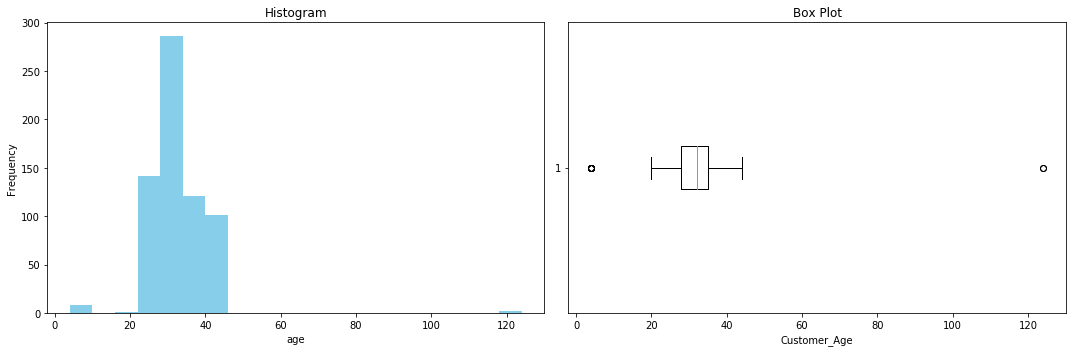

In [22]:
# Create subplots for the histograms
fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # Adjust figsize as needed

# Generate histograms and box plots
# Histogram
axes[0].hist(x='age', data=customers, bins=20, color='skyblue')
axes[0].set_xlabel('age')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram')

# Box plot
axes[1].boxplot(x=customers['age'], vert=False)
axes[1].set_xlabel('Customer_Age')
axes[1].set_title('Box Plot')

# Show the plots
plt.tight_layout()
plt.show()

#### Age Distribution:

The distribution of customer age is heavily skewed to the right, implying that there are relatively few older customers compared to younger ones.
Most customers might fall within a certain age range, with a few outliers on the older side.

#### Extreme Values:

The high kurtosis indicates the presence of extreme values or outliers in the customer age data.
These outliers might represent customers significantly older or younger than the majority.

## zip_code

In [23]:
print("The skewness of zipcode is:\n",customers['zip_code'].skew())
print("The kurtosis of zipcode is:\n",customers['zip_code'].kurt())

The skewness of zipcode is:
 0.0550921325183074
The kurtosis of zipcode is:
 -0.6672508551710532


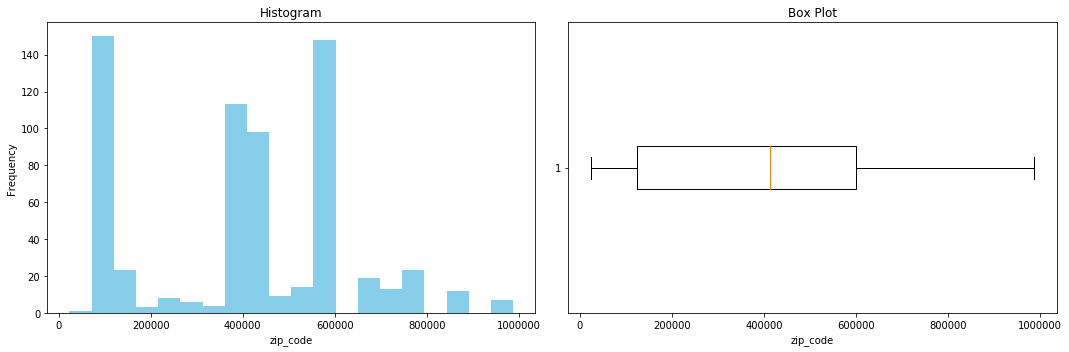

In [24]:
# Create subplots for the histograms
fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # Adjust figsize as needed

# Generate histograms and box plots
# Histogram
axes[0].hist(x='zip_code', data=customers, bins=20, color='skyblue')
axes[0].set_xlabel('zip_code')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram')

# Box plot
axes[1].boxplot(x=customers['zip_code'].dropna(), vert=False)
axes[1].set_xlabel('zip_code')
axes[1].set_title('Box Plot')

# Show the plots
plt.tight_layout()
plt.show()

#### Zip Code Distribution:

The distribution of zip codes appears to be approximately symmetric, with no significant skewness in either direction.
This suggests that there isn't a strong bias towards certain zip codes being more prevalent than others.

#### Distribution Shape:

The negative kurtosis indicates that the distribution is less peaked and has lighter tails compared to a normal distribution.

It implies that the data points are relatively spread out, without many extreme values or outliers.

# UNI-VARIATE ANALYSIS FOR CATEGORICAL COLUMNS:

In [25]:
cat=[]

for column in customers.columns:
    if customers[column].dtype =='object':
        cat.append(column)
print('The categorical columns are:\n')
for i in cat:
    print(i)

The categorical columns are:

first_name
last_name
gender
email
pan
street
city
state


In [26]:
customers.describe(include='object').T

,count,unique,top,freq
first_name,661,338,Aashi,27
last_name,661,125,Sharma,33
gender,661,3,Male,345
email,661,34,Xyz@maveric-systems.com,556
pan,661,661,Gbyhn1290e,1
street,651,88,Mountain boulevard,50
city,651,51,Delhi,131
state,651,30,Maharashtra,154


## Gender

In [27]:
customers['gender'].value_counts()

Male      345
Female    314
Other       2
Name: gender, dtype: int64

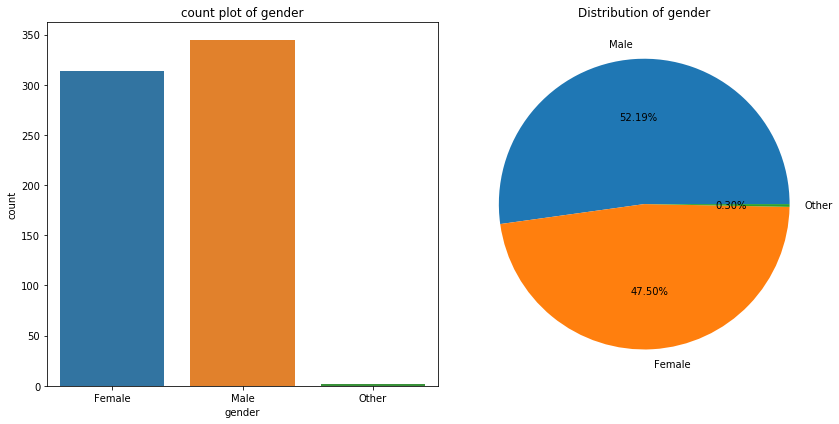

In [28]:
# Create subplots
fig,axes=plt.subplots(1,2,figsize=(12,6))

# Countplot using seaborn
sns.countplot(x='gender',data=customers,ax=axes[0])
axes[0].set_xlabel('gender')
axes[0].set_ylabel('count')
axes[0].set_title('count plot of gender')

# Pie chart using pandas plot
customers['gender'].value_counts().plot(kind='pie', autopct='%.2f%%', ax=axes[1])
axes[1].set_title('Distribution of gender')
axes[1].set_ylabel('')

# Adjust layout
plt.tight_layout()

# Display the subplots
plt.show()

The majority of individuals are categorized as Male, with 345 counts.
Female follows with 314 counts.

Other gender category has only 2 counts, indicating it's a minority category in this bank.

## Street

In [29]:
customers['street'].value_counts()

Mountain boulevard    50
Sky lane              42
River boulevard       41
Sun road              38
Mountain street       26
Mountain lane         25
River lane            23
Cloud lane            22
Sun street            22
Star boulevard        20
Sun lane              20
Sky street            20
Cloud road            20
Star road             19
Beach road            16
Harbor street         15
Beach boulevard       11
Main boulevard        11
Forest lane           11
Valley lane           11
Valley street          9
123 main st            9
Fgcdgf                 8
Main road              8
Abc                    7
Abcdefg                7
Harbor avenue          7
68 virar street        6
Main street            6
Ghyu                   6
Mountain road          6
Market lane            5
Kharadi                5
Forest avenue          5
Cloud street           4
Forest drive           4
153 not st             3
Star street            3
45, lemon street       3
Harbor lane            3


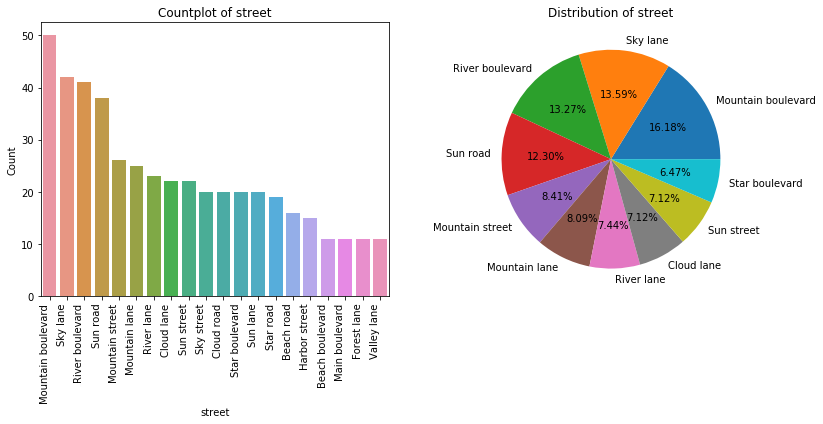

In [30]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Countplot using seaborn
top_20_street = customers['street'].value_counts().sort_values(ascending=False).index[:20]
sns.countplot(x='street', data=customers, order=top_20_street, ax=axes[0])
axes[0].set_xlabel('street')
axes[0].set_ylabel('Count')
axes[0].set_title('Countplot of street')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90, ha='right')

# Pie chart using pandas plot
customers['street'].value_counts().iloc[:10].plot(kind='pie', autopct='%.2f%%', ax=axes[1])
axes[1].set_title('Distribution of street')
axes[1].set_ylabel('')

# Adjust layout
plt.tight_layout()

# Display the subplots
plt.show()

"Mountain Boulevard" has the highest occurrence with 50 counts, followed closely by "Sky Lane" with 42 counts, and "River Boulevard" with 41 counts.

## City

In [31]:
customers['city'].value_counts()

Delhi            131
Mumbai           115
Chennai           90
Lisbon            56
Bangalore         55
Pune              34
Madrid            19
London            18
New delhi         17
Kolkata           13
Cityville         12
Xyz               10
Hyderabad          8
Berlin             6
Jaipur             5
Surat              4
Rome               4
Chandigarh         3
Gghj               3
Ghyu               3
Lucknow            3
Milan              2
Indore             2
Bhjui              2
Ahmedabad          2
Ludhiana           2
Kanpur             2
Wagholi            2
Iop                2
Nagpur             2
Visakhapatnam      2
Newyork            2
Kull               2
Hyui               1
Hju                1
Bnjk               1
Kliu               1
Bhopal             1
Ghy                1
Hjn                1
Townsville         1
Sdf                1
Iojk               1
Goa                1
Pun                1
Kikjhgfvc          1
Bhh                1
Hadapsar     

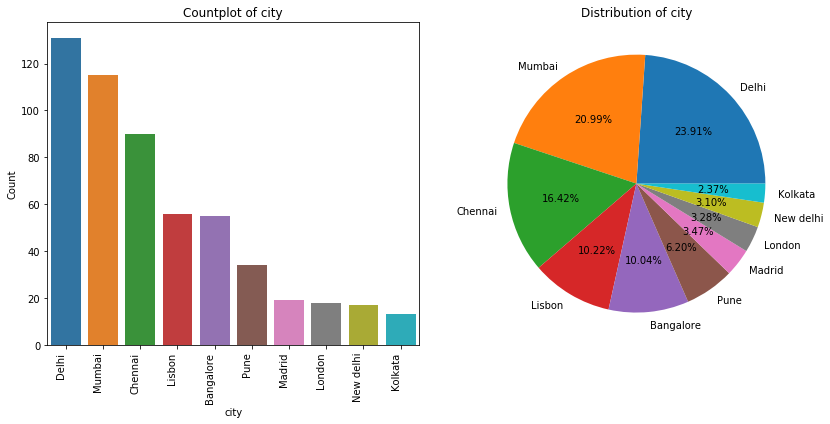

In [32]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Countplot using seaborn
top_10_city = customers['city'].value_counts().sort_values(ascending=False).index[:10]
sns.countplot(x='city', data=customers, order=top_10_city, ax=axes[0])
axes[0].set_xlabel('city')
axes[0].set_ylabel('Count')
axes[0].set_title('Countplot of city')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90, ha='right')

# Pie chart using pandas plot
customers['city'].value_counts().iloc[:10].plot(kind='pie', autopct='%.2f%%', ax=axes[1])
axes[1].set_title('Distribution of city')
axes[1].set_ylabel('')

# Adjust layout
plt.tight_layout()

# Display the subplots
plt.show()

Among the listed cities, "Delhi" has the highest occurrence with 131 counts, followed by "Mumbai" with 115 counts and "Chennai" with 90 counts.

These cities appear to be major urban centers with high population densities.

## State

In [33]:
customers['state'].value_counts()

Maharashtra          154
Delhi                148
Tamil nadu            90
Karnataka             60
Portugal              56
Spain                 19
United kingdom        18
West bengal           13
Madhya pradesh        13
State                  9
Bihar                  8
Telangana              8
Italy                  6
Germany                6
Uttar pradesh          5
Rajasthan              5
Punjab                 4
Gujarat                4
Meghalaya              4
Chhattisgarh           3
Chandigarh             3
Assam                  3
Manipur                2
Goa                    2
Andhra pradesh         2
Gujrat                 2
Odisha                 1
Province               1
Arunachal pradesh      1
Mizoram                1
Name: state, dtype: int64

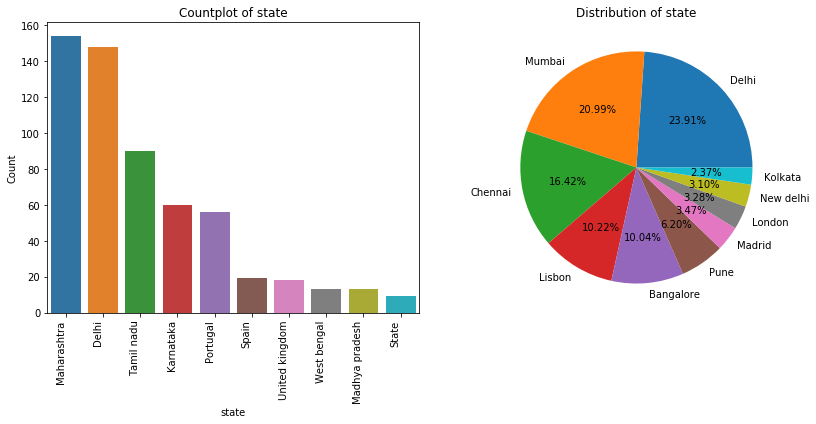

In [34]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Countplot using seaborn
top_10_state = customers['state'].value_counts().sort_values(ascending=False).index[:10]
sns.countplot(x='state', data=customers, order=top_10_state, ax=axes[0])
axes[0].set_xlabel('state')
axes[0].set_ylabel('Count')
axes[0].set_title('Countplot of state')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90, ha='right')

# Pie chart using pandas plot
customers['city'].value_counts().iloc[:10].plot(kind='pie', autopct='%.2f%%', ax=axes[1])
axes[1].set_title('Distribution of state')
axes[1].set_ylabel('')

# Adjust layout
plt.tight_layout()

# Display the subplots
plt.show()

##### Most Common States:

"Maharashtra" has the highest occurrence with 154 counts, followed closely by "Delhi" with 148 counts and "Tamil Nadu" with 90 counts.

These states are among the most populous and economically significant regions in India.

#### Geographical Diversity:

The dataset includes states from various regions, including India ("Maharashtra", "Delhi", "Tamil Nadu", "Karnataka", "Madhya Pradesh", "West Bengal", "Bihar", "Telangana", "Uttar Pradesh", "Rajasthan", "Gujarat", "Punjab", "Meghalaya", "Assam", "Chandigarh", "Chhattisgarh", "Manipur", "Goa", "Andhra Pradesh", "Odisha", "Mizoram", "Arunachal Pradesh"), as well as international locations ("Portugal", "Spain", "United Kingdom", "Germany", "Italy").

# BI-VARIATR ANALYSIS

In [35]:
customers.corr()

,customer_id,phone_number,aadhar,zip_code,age
customer_id,1.000000,-0.065324,-0.039416,0.037859,-0.035926
phone_number,-0.065324,1.000000,0.201909,0.012259,-0.120190
aadhar,-0.039416,0.201909,1.000000,0.214375,0.029462
zip_code,0.037859,0.012259,0.214375,1.000000,0.017743
age,-0.035926,-0.120190,0.029462,0.017743,1.000000


## Age and Zip Code

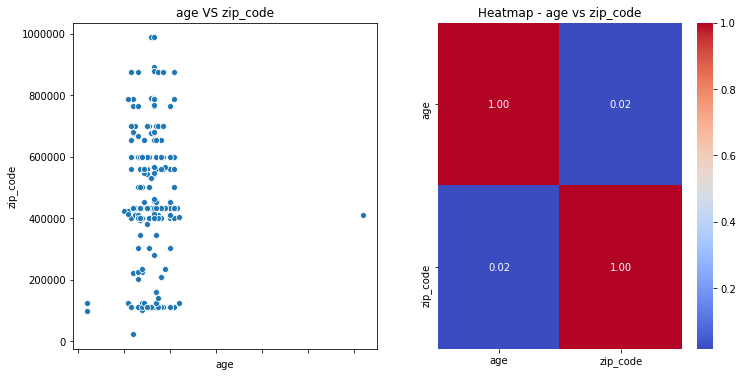

In [36]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

zip_code_without_nan=customers.dropna()

# Countplot using seaborn
sns.scatterplot(x=zip_code_without_nan['age'],y=zip_code_without_nan['zip_code'],ax=axes[0])
axes[0].set_xlabel('age')
axes[0].set_ylabel('zip_code')
axes[0].set_title('age VS zip_code')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90, ha='right')

# Assuming customers is your DataFrame containing "age" and "zip_code" columns
sns.heatmap(zip_code_without_nan[['age', 'zip_code']].corr(), annot=True, fmt=".2f", cmap='coolwarm',ax=axes[1])

# Set plot title
plt.title("Heatmap - age vs zip_code")


# Display the plot
plt.show()

In [37]:
from scipy.stats import pearsonr

# Drop NaN values from the 'zip_code' column
zip_code_without_nan = customers.dropna()

# Calculate Pearson's correlation coefficient and p-value
correlation, p_value = pearsonr(zip_code_without_nan['age'], zip_code_without_nan['zip_code'])

# Print the results
print("Pearson's correlation coefficient:", correlation)
print("p-value:", p_value)


Pearson's correlation coefficient: 0.017742688360058066
p-value: 0.6513662670401971


Based on this analysis, there is insufficient evidence to conclude that there is a significant linear relationship between age and zip code in the dataset.

# Gender and State

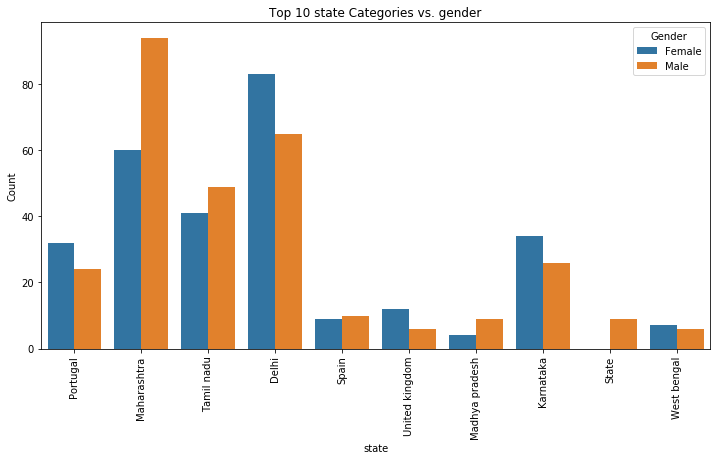

In [38]:
# Grouped Bar Plot
# Get the top 10 most frequent 'state' categories
a = customers['state'].value_counts().iloc[0:10].index

# Filter the DataFrame to include only the top 10 'state' categories
df_top_10 = customers[customers['state'].isin(a)]

# Create the countplot
plt.figure(figsize=(12, 6))
sns.countplot(data=df_top_10, x='state', hue='gender')
plt.title("Top 10 state Categories vs. gender")
plt.xlabel("state")
plt.ylabel("Count")
plt.xticks(rotation=90
          )
plt.legend(title='Gender', loc='upper right')
plt.show()

In [39]:
import scipy.stats as stats

# Drop null values from the 'gender' and 'state' columns
customers1 = customers.dropna(subset=['gender', 'state'])

# Create a contingency table of 'Gender' and 'State'
contingency_table = pd.crosstab(customers1['gender'], customers1['state'])

# Perform chi-square test of independence
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-Square Test of Independence Results:")
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p_value}")


Chi-Square Test of Independence Results:
Chi-Square Statistic: 201.44913042642082
P-Value: 9.971727477092057e-18


#### Statistical Significance: 
The p-value obtained from the test is extremely low (approximately 9.97e-18), indicating strong evidence against the null hypothesis.

#### Chi-Square Statistic: T
he Chi-Square statistic is relatively large (approximately 201.45), further supporting the evidence against the null hypothesis.

#### Conclusion: 
Therefore, we reject the null hypothesis and conclude that there is a statistically significant association between gender and state in the dataset.

## Gender and City

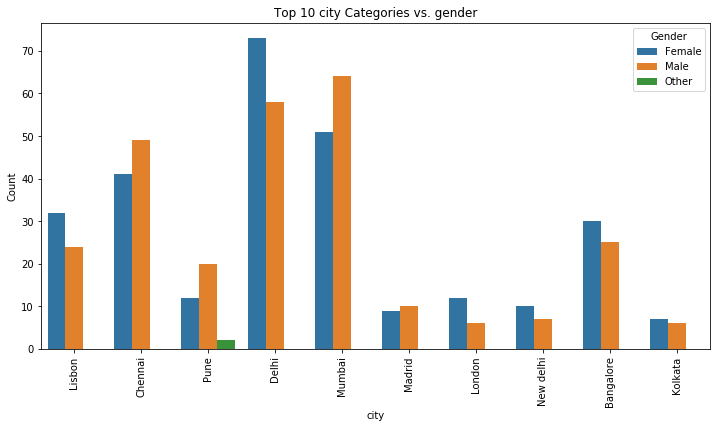

In [40]:
# Grouped Bar Plot
# Get the top 10 most frequent 'city' categories
a = customers['city'].value_counts().iloc[0:10].index

# Filter the DataFrame to include only the top 10 'city' categories
df_top_10 = customers[customers['city'].isin(a)]

# Create the countplot
plt.figure(figsize=(12, 6))
sns.countplot(data=df_top_10, x='city', hue='gender')
plt.title("Top 10 city Categories vs. gender")
plt.xlabel("city")
plt.ylabel("Count")
plt.xticks(rotation=90
          )
plt.legend(title='Gender', loc='upper right')
plt.show()

In [41]:
# Drop null values from the 'gender' and 'state' columns
customers1 = customers.dropna(subset=['gender', 'city'])

# Create a contingency table of 'Gender' and 'State'
contingency_table = pd.crosstab(customers1['gender'], customers1['city'])

# Perform chi-square test of independence
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-Square Test of Independence Results:")
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p_value}")


Chi-Square Test of Independence Results:
Chi-Square Statistic: 117.5294167093038
P-Value: 0.11119271701253565


#### Statistical Significance: 
The p-value obtained from the test is 0.111, which is greater than the conventional significance level of 0.05. This suggests that the evidence against the null hypothesis is not strong enough to reject it.

#### Chi-Square Statistic: 
The Chi-Square statistic is 117.53.

#### Conclusion: 
Therefore, we fail to reject the null hypothesis. We do not have sufficient evidence to conclude that there is a statistically significant association between gender and city in the dataset at the 0.05 significance level.

## Gender and Street

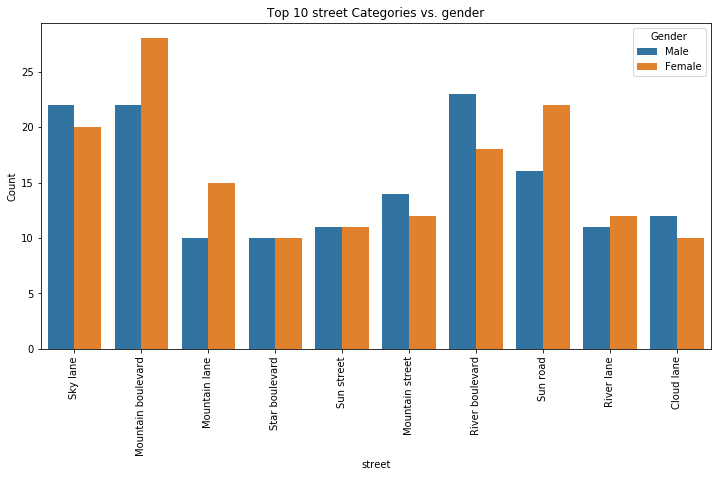

In [42]:
# Grouped Bar Plot
# Get the top 10 most frequent 'street' categories
a = customers['street'].value_counts().iloc[0:10].index

# Filter the DataFrame to include only the top 10 'street' categories
df_top_10 = customers[customers['street'].isin(a)]

# Create the countplot
plt.figure(figsize=(12, 6))
sns.countplot(data=df_top_10, x='street', hue='gender')
plt.title("Top 10 street Categories vs. gender")
plt.xlabel("street")
plt.ylabel("Count")
plt.xticks(rotation=90
          )
plt.legend(title='Gender', loc='upper right')
plt.show()

In [43]:
# Create a contingency table of 'Gender' and 'street'

# Drop null values from the 'gender' and 'state' columns
customers1 = customers.dropna(subset=['gender', 'street'])

contingency_table = pd.crosstab(customers1['gender'], customers1['street'])

# Perform chi-square test of independence
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-Square Test of Independence Results:")
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p_value}")


Chi-Square Test of Independence Results:
Chi-Square Statistic: 332.0087178197015
P-Value: 5.790004737144313e-12


#### Statistical Significance: 

The p-value obtained from the test is approximately 5.79e-12, which is significantly smaller than the conventional significance level of 0.05. This suggests strong evidence against the null hypothesis.

#### Chi-Square Statistic: 
The Chi-Square statistic is 332.01.

#### Conclusion: 
Therefore, we reject the null hypothesis and conclude that there is a statistically significant association between street and gender in the dataset.

## Age and State

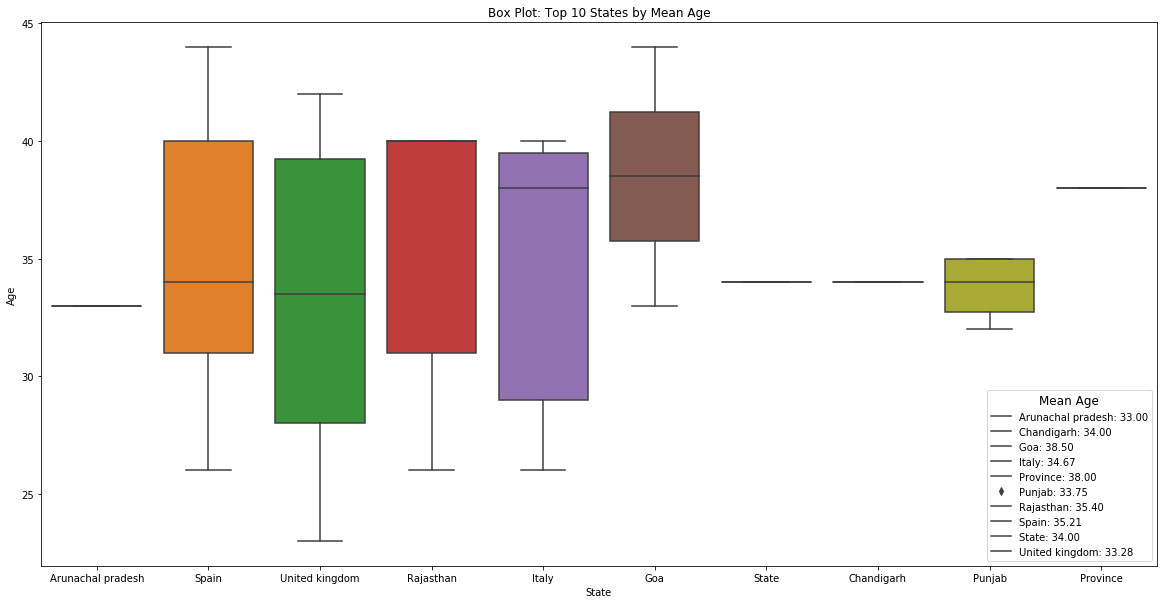

In [44]:
# Get top 10 states by mean age
top_10_states = customers.groupby('state')['age'].mean().nlargest(10).index

# Filter DataFrame to include only top 10 states
customers_top_10 = customers[customers['state'].isin(top_10_states)]

# Set the figure size
plt.figure(figsize=(20, 10))

# Box plot
sns.boxplot(data=customers_top_10, x='state', y='age')

# Set labels and title
plt.xlabel('State')
plt.ylabel('Age')
plt.title('Box Plot: Top 10 States by Mean Age')

# Add a legend for mean age by state
means = customers_top_10.groupby('state')['age'].mean()
legend_labels = [f'{state}: {mean:.2f}' for state, mean in means.items()]
plt.legend(legend_labels, title='Mean Age', title_fontsize='large')

# Display the plot
plt.show()

In [45]:
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Drop any rows with missing values
data = customers[['age', 'state']].copy()

data.dropna(inplace=True)

# Perform ANOVA
model = ols('age ~ C(state)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)

                sum_sq     df         F    PR(>F)
C(state)   1754.482001   29.0  1.027272  0.427779
Residual  36572.700795  621.0       NaN       NaN


The ANOVA results indicate a no association between customer age and state.

# Age and city

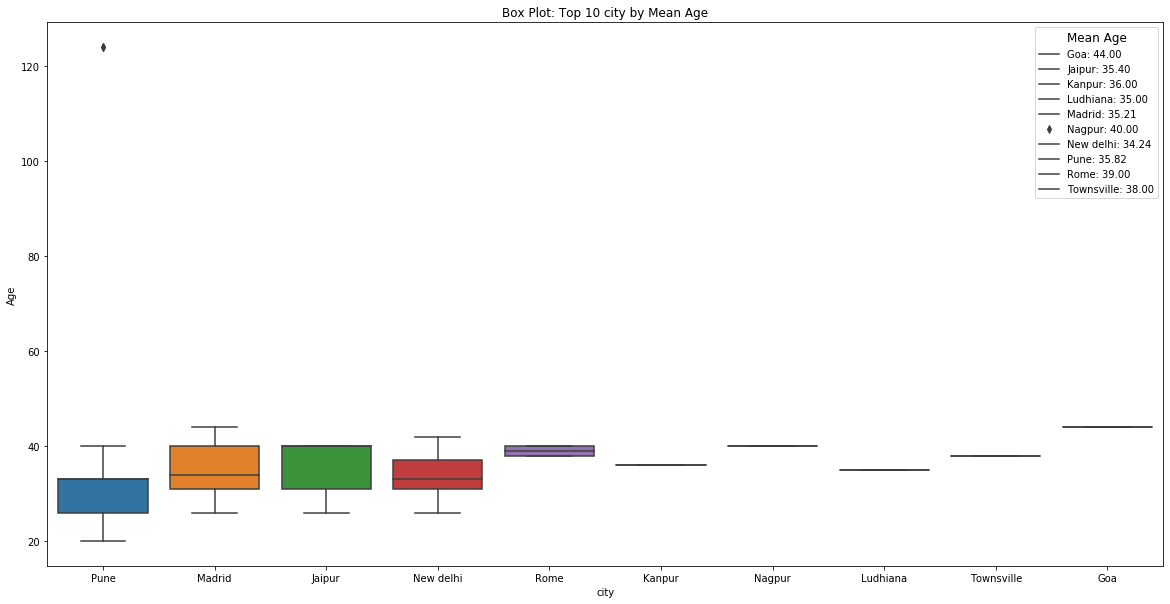

In [46]:
# Get top 10 city by mean age
top_10_states = customers.groupby('city')['age'].mean().nlargest(10).index

# Filter DataFrame to include only top 10 city
customers_top_10 = customers[customers['city'].isin(top_10_states)]

# Set the figure size
plt.figure(figsize=(20, 10))

# Box plot
sns.boxplot(data=customers_top_10, x='city', y='age')

# Set labels and title
plt.xlabel('city')
plt.ylabel('Age')
plt.title('Box Plot: Top 10 city by Mean Age')

# Add a legend for mean age by city
means = customers_top_10.groupby('city')['age'].mean()
legend_labels = [f'{state}: {mean:.2f}' for state, mean in means.items()]
plt.legend(legend_labels, title='Mean Age', title_fontsize='large')

# Display the plot
plt.show()

In [47]:
# Drop any rows with missing values
data = customers[['age', 'city']].copy()

data.dropna(inplace=True)

# Perform ANOVA
model = ols('age ~ C(city)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)

                sum_sq     df         F    PR(>F)
C(city)    4643.520081   50.0  1.654281  0.003996
Residual  33683.662715  600.0       NaN       NaN


Since the p-value (0.004) is less than the conventional significance level of 0.05, we reject the null hypothesis.

Therefore, we conclude that there is a statistically significant association between city and age in the dataset.

## Age and Street

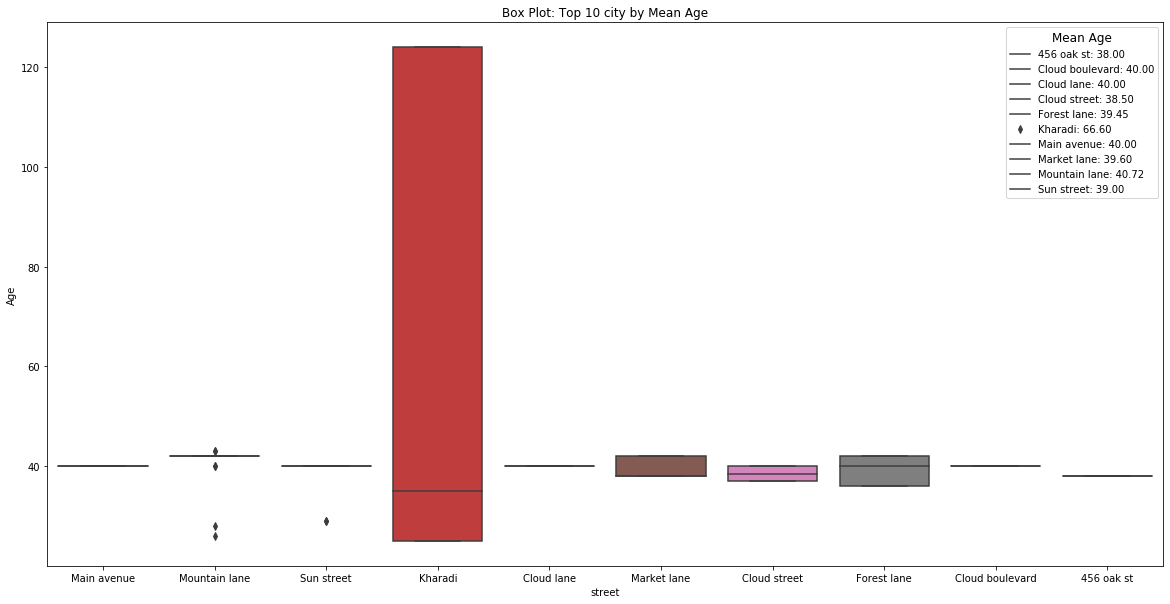

In [48]:
# Get top 10 street by mean age
top_10_states = customers.groupby('street')['age'].mean().nlargest(10).index

# Filter DataFrame to include only top 10 street
customers_top_10 = customers[customers['street'].isin(top_10_states)]

# Set the figure size
plt.figure(figsize=(20, 10))

# Box plot
sns.boxplot(data=customers_top_10, x='street', y='age')

# Set labels and title
plt.xlabel('street')
plt.ylabel('Age')
plt.title('Box Plot: Top 10 city by Mean Age')

# Add a legend for mean age by city
means = customers_top_10.groupby('street')['age'].mean()
legend_labels = [f'{state}: {mean:.2f}' for state, mean in means.items()]
plt.legend(legend_labels, title='Mean Age', title_fontsize='large')

# Display the plot
plt.show()

In [49]:
# Drop any rows with missing values
data = customers[['age', 'street']].copy()

data.dropna(inplace=True)

# Perform ANOVA
model = ols('age ~ C(street)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)

                 sum_sq     df         F        PR(>F)
C(street)  21503.857706   87.0  8.271679  1.668530e-58
Residual   16823.325089  563.0       NaN           NaN


Since the p-value (1.67e-58) is significantly less than the conventional significance level of 0.05, we reject the null hypothesis.

Therefore, we conclude that there is a statistically significant association between street and age in the dataset.

# Customer Base Analysis Summary

#### Account Distribution:
    Total customers: 651
    Male customers: 345
    Female customers: 314
    Others: 2

#### Age Distribution:

The age group is heavily skewed, with some customers much older and some much younger than the average.

    Minimum age: 4
    Maximum age: 124
    Mean age: 32

#### Location Distribution:

Customers are spread across zip codes without any outliers.

"Mountain Boulevard" has the highest customer occurrence with 50 counts, followed by "Sky Lane" with 42 counts, and "River Boulevard" with 41 counts.

Among listed cities, "Delhi" has the highest customer occurrence with 131 counts, followed by "Mumbai" with 115 counts and "Chennai" with 90 counts.

"Maharashtra" has the highest customer occurrence with 154 counts, followed closely by "Delhi" with 148 counts and "Tamil Nadu" with 90 counts.

#### Relationships:

Gender and state are related, helping to target specific genders in states.

Gender and street are related, aiding in targeting specific genders on streets.

Age and city are related, assisting in targeting specific age groups in cities.

Age and street are related, facilitating targeting of specific age groups on streets.

# Loading Dataset-Accounts

In [50]:
df3=pd.read_csv("Accounts 2.csv")

In [51]:
df3.head()

,customer_id,account_number,account_type,account_status,currency,overdraft,creation_date,total_balance,block_reason
0,10068162,10068162001,current,ACTIVE,INR,NO,2024-03-19 11:35:09,18691.60,NaN
1,10203042,10203042001,SAVINGS,ACTIVE,INR,NO,2024-01-30 00:00:00,118390.23,Problem Solved
2,10203042,10203042002,CURRENT,ACTIVE,INR,NO,2024-01-30 00:00:00,116510.23,jhgf
3,10203042,10203042003,SAVINGS,ACTIVE,INR,NO,2024-01-30 00:00:00,123248.39,Problem Solved
4,10203042,10203042004,CURRENT,ACTIVE,INR,NO,2024-01-31 00:00:00,122706.16,Problem Solved


In [52]:
accounts=pd.merge(df3,customers[['gender','age','state','city','street','customer_id']],on='customer_id',how='left')

In [53]:
# converting all values in the account type to upper case
accounts['account_type'] = accounts['account_type'].str.upper()

In [54]:
accounts.head()

,customer_id,account_number,account_type,account_status,currency,overdraft,creation_date,total_balance,block_reason,gender,age,state,city,street
0,10068162,10068162001,CURRENT,ACTIVE,INR,NO,2024-03-19 11:35:09,18691.60,NaN,Female,32.0,Portugal,Lisbon,Main boulevard
1,10203042,10203042001,SAVINGS,ACTIVE,INR,NO,2024-01-30 00:00:00,118390.23,Problem Solved,Male,25.0,Maharashtra,Wagholi,College rode
2,10203042,10203042002,CURRENT,ACTIVE,INR,NO,2024-01-30 00:00:00,116510.23,jhgf,Male,25.0,Maharashtra,Wagholi,College rode
3,10203042,10203042003,SAVINGS,ACTIVE,INR,NO,2024-01-30 00:00:00,123248.39,Problem Solved,Male,25.0,Maharashtra,Wagholi,College rode
4,10203042,10203042004,CURRENT,ACTIVE,INR,NO,2024-01-31 00:00:00,122706.16,Problem Solved,Male,25.0,Maharashtra,Wagholi,College rode


# Checking for Duplicates and Null Values

In [55]:
duplicates=accounts.duplicated()
if any(duplicates):
    print("There are duplicates present")
else:
    print("There are no duplicates")

There are no duplicates


In [56]:
result_data = []

for column in accounts.columns:
    null_count = accounts[column].isnull().sum()
    if null_count > 0:
        result_data.append({'Column Name': column, 'Null Count': null_count})
        

if any(result_data):
    result_df = pd.DataFrame(result_data)
    print(result_df)
else:
    print("There are no null values in the dataset")


     Column Name  Null Count
0  creation_date           3
1   block_reason        1395
2         gender           1
3            age           1
4          state          22
5           city          22
6         street          22


# Checking Datatypes

In [57]:
Datatypes=[]
for column in accounts.columns:
    Datatypes.append({'Column Name':column,'Data tye':accounts[column].dtype})

Datatypes=pd.DataFrame(Datatypes)
Datatypes

,Column Name,Data tye
0,customer_id,int64
1,account_number,int64
2,account_type,object
3,account_status,object
4,currency,object
5,overdraft,object
6,creation_date,object
7,total_balance,float64
8,block_reason,object
9,gender,object


In [58]:
# Convert 'date_of_birth' to datetime
accounts['creation_date'] = pd.to_datetime(accounts['creation_date'])

In [59]:
Datatypes=[]
for column in accounts.columns:
    Datatypes.append({'Column Name':column,'Data tye':accounts[column].dtype})

Datatypes=pd.DataFrame(Datatypes)
Datatypes

,Column Name,Data tye
0,customer_id,int64
1,account_number,int64
2,account_type,object
3,account_status,object
4,currency,object
5,overdraft,object
6,creation_date,datetime64[ns]
7,total_balance,float64
8,block_reason,object
9,gender,object


# Data Visualisation

## UNI-VARIATE ANALYSIS:

## Account Type

In [60]:
accounts['account_type'].value_counts()

SAVINGS    744
CURRENT    668
Name: account_type, dtype: int64

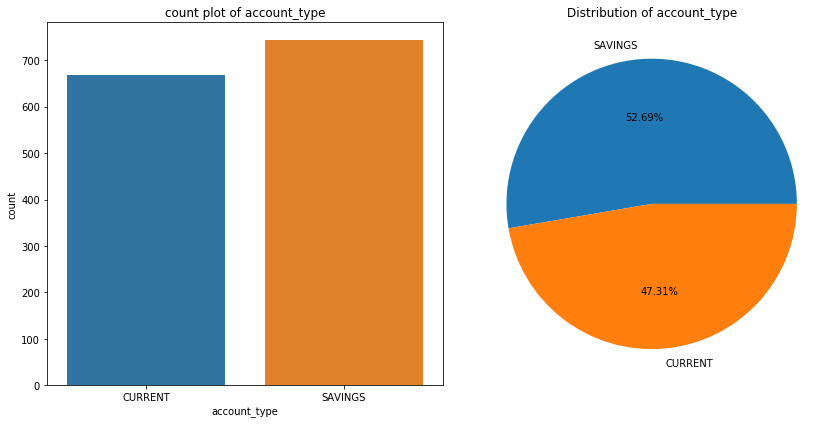

In [61]:
# Create subplots
fig,axes=plt.subplots(1,2,figsize=(12,6))

# Countplot using seaborn
sns.countplot(x='account_type',data=accounts,ax=axes[0])
axes[0].set_xlabel('account_type')
axes[0].set_ylabel('count')
axes[0].set_title('count plot of account_type')

# Pie chart using pandas plot
accounts['account_type'].value_counts().plot(kind='pie', autopct='%.2f%%', ax=axes[1])
axes[1].set_title('Distribution of account_type')
axes[1].set_ylabel('')

# Adjust layout
plt.tight_layout()

# Display the subplots
plt.show()

SAVINGS accounts slightly outnumber CURRENT accounts in the dataset, with 744 SAVINGS accounts compared to 668 CURRENT accounts.

# Gender

In [62]:
gender=accounts.drop_duplicates(subset=['customer_id'])

In [63]:
gender['gender'].value_counts()

Male      336
Female    312
Other       2
Name: gender, dtype: int64

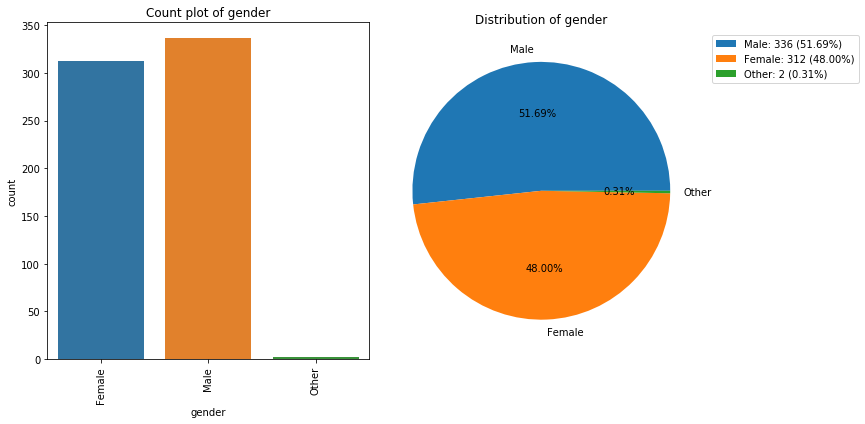

In [64]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Countplot using seaborn
sns.countplot(x='gender', data=gender, ax=axes[0])
axes[0].set_xlabel('gender')
axes[0].set_ylabel('count')
axes[0].set_title('Count plot of gender')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)  # Rotate x-labels

# Pie chart using pandas plot
statuses = gender['gender'].value_counts()
statuses.plot(kind='pie', autopct='%.2f%%', ax=axes[1])
axes[1].set_title('Distribution of gender')
axes[1].set_ylabel('')
axes[1].yaxis.set_visible(False)  # Hide y-axis

# Manually create legend with percentages
percentages = [f'{status}: {count} ({percentage:.2f}%)' for status, count, percentage in zip(statuses.index, statuses.values, statuses.values / statuses.sum() * 100)]
axes[1].legend(labels=percentages, loc="upper right", bbox_to_anchor=(1, 0, 0.5, 1))

# Adjust layout
plt.tight_layout()

# Display the subplots
plt.show()


Total number of male customers are more than female customers
Male      336
Female    312
Other       2

## Account Status

In [65]:
accounts['account_status'].value_counts()

ACTIVE           1405
CLOSED              3
CREDITBLOCKED       2
BLOCKED             1
DEBITBLOCKED        1
Name: account_status, dtype: int64

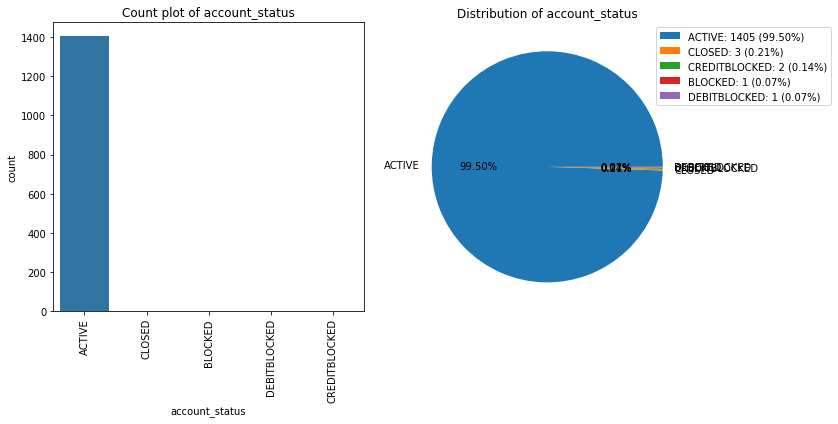

In [66]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Countplot using seaborn
sns.countplot(x='account_status', data=accounts, ax=axes[0])
axes[0].set_xlabel('account_status')
axes[0].set_ylabel('count')
axes[0].set_title('Count plot of account_status')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)  # Rotate x-labels

# Pie chart using pandas plot
statuses = accounts['account_status'].value_counts()
statuses.plot(kind='pie', autopct='%.2f%%', ax=axes[1])
axes[1].set_title('Distribution of account_status')
axes[1].set_ylabel('')
axes[1].yaxis.set_visible(False)  # Hide y-axis

# Manually create legend with percentages
percentages = [f'{status}: {count} ({percentage:.2f}%)' for status, count, percentage in zip(statuses.index, statuses.values, statuses.values / statuses.sum() * 100)]
axes[1].legend(labels=percentages, loc="upper right", bbox_to_anchor=(1, 0, 0.5, 1))

# Adjust layout
plt.tight_layout()

# Display the subplots
plt.show()


Most of the accounts in the dataset are active except few accounts.

## Creation_date

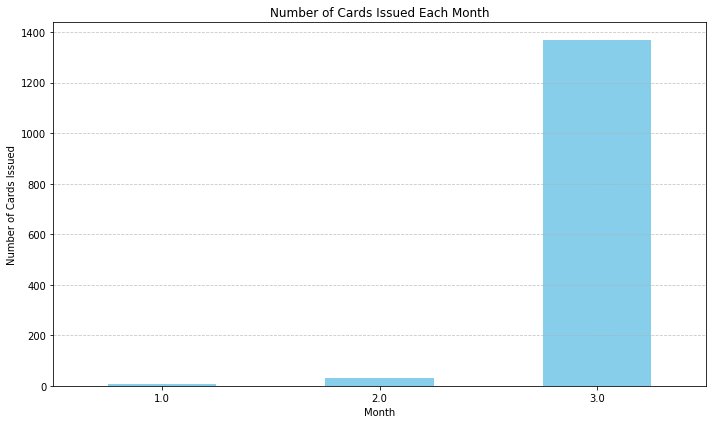

In [67]:
# Extract year from issue_date
accounts['issue_month'] = accounts['creation_date'].dt.month

# Group by issue_year and count the number of cards issued in each year
cards_issued_per_month = accounts.groupby('issue_month').size()

# Plotting
plt.figure(figsize=(10, 6))
cards_issued_per_month.plot(kind='bar', color='skyblue')
plt.title('Number of Cards Issued Each Month')
plt.xlabel('Month')
plt.ylabel('Number of Cards Issued')
plt.xticks(rotation=360)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Most of the accounts are opened in the month of March followed by February.

## Accounts Per Customer

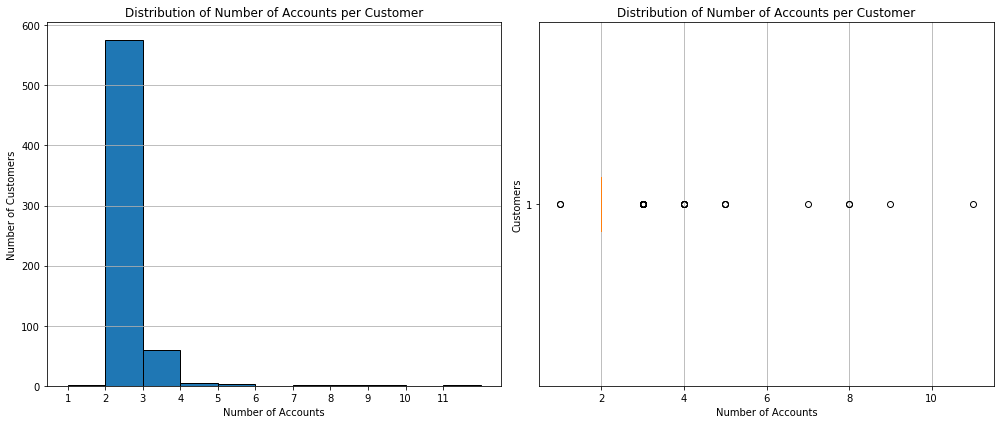

In [68]:
# Group by 'customer_id' and count the number of unique account numbers
accounts_per_customer = accounts.groupby('customer_id')['account_number'].nunique()

# Creating subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Histogram
axs[0].hist(accounts_per_customer, bins=range(1, accounts_per_customer.max() + 2), edgecolor='black')
axs[0].set_title('Distribution of Number of Accounts per Customer')
axs[0].set_xlabel('Number of Accounts')
axs[0].set_ylabel('Number of Customers')
axs[0].grid(axis='y')
axs[0].set_xticks(range(1, accounts_per_customer.max() + 1))

# Box plot
axs[1].boxplot(accounts_per_customer, vert=False)
axs[1].set_title('Distribution of Number of Accounts per Customer')
axs[1].set_xlabel('Number of Accounts')
axs[1].set_ylabel('Customers')
axs[1].grid(axis='x')

plt.tight_layout()
plt.show()

In [69]:
# Step 1: Drop duplicate customer IDs to ensure each customer is counted only once
unique_customers = accounts.drop_duplicates(subset=['customer_id'])

# Step 2: Get the count of unique customers
total_customers = len(unique_customers)

# Step 3: Get the distribution of genders among customers
gender_distribution = unique_customers['gender'].value_counts()

# Step 4: Print the results
print("Total number of customers:", total_customers)
print("Gender distribution among customers:")
print(gender_distribution)

Total number of customers: 651
Gender distribution among customers:
Male      336
Female    312
Other       2
Name: gender, dtype: int64


In [70]:
import pandas as pd

# Assuming the data is stored in a pandas DataFrame called 'df'
# Group by customer_id and count unique account types
customer_account_types = accounts.groupby('customer_id')['account_type'].nunique()

# Filter customers with both current and savings account types
customers_with_both = customer_account_types[customer_account_types == 2]

# Get the gender of customers with both account types
gender_counts = accounts[accounts['customer_id'].isin(customers_with_both.index)]['gender'].value_counts()

print("Number of customers with both current and savings account types:", len(customers_with_both))
print("Gender distribution among customers with both account types:")
print(gender_counts)


Number of customers with both current and savings account types: 649
Gender distribution among customers with both account types:
Male      750
Female    656
Other       4
Name: gender, dtype: int64


In [71]:
# Step 1: Group the dataframe by customer_id and count the number of unique account numbers for each customer
customer_account_count = accounts.groupby('customer_id')['account_number'].nunique()

# Step 2: Filter customers with more than one account number
customers_with_multiple_accounts = customer_account_count[customer_account_count > 2]

# Step 3: Get the count of customers with multiple accounts
num_customers_with_multiple_accounts = len(customers_with_multiple_accounts)

# Step 4: Print the result
print("Number of customers with more than two account:", num_customers_with_multiple_accounts)

Number of customers with more than two account: 73


#### Distribution of Number of Accounts per Customer:

The majority of customers seem to have two accounts.

There are some customers with only one account.

There are also customers with multiple accounts, with a maximum of 11 accounts.

Number of customers with more than two account: 73

Number of customers with both current and savings account types: 649

Gender distribution among customers with both account types:
Male      750
Female    656
Other       4

#### Common Number of Accounts:

It appears that having two accounts is quite common among customers.

There are fewer customers with more than two accounts.

# BI-VARIATR ANALYSIS

## Account type and Creation Date

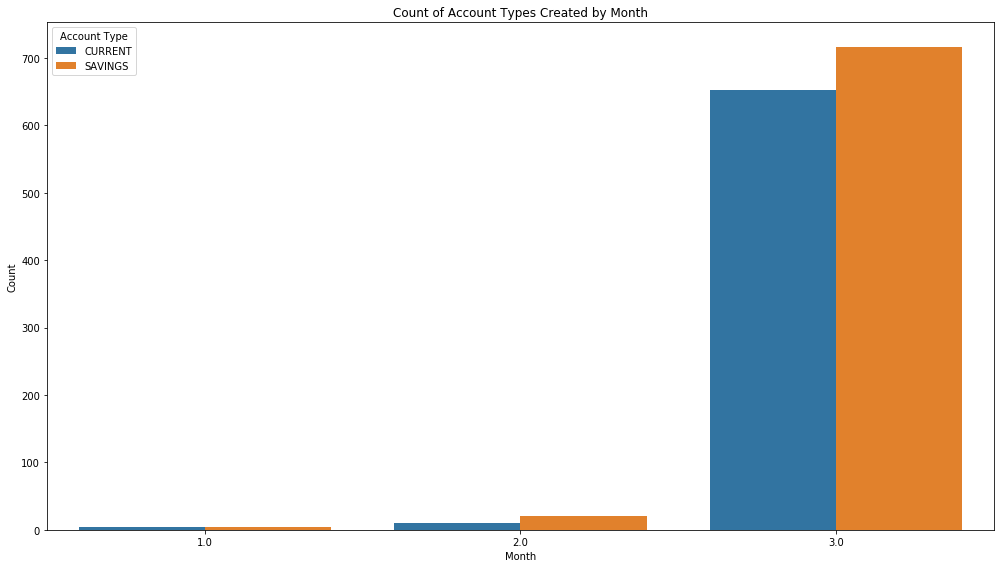

In [72]:
# Extract year and month from 'creation_date'
accounts['issue_month'] = accounts['creation_date'].dt.month

# Plotting
plt.figure(figsize=(14, 8))
sns.countplot(data=accounts, x='issue_month', hue='account_type')
plt.title('Count of Account Types Created by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Account Type')
plt.tight_layout()
plt.show()

Across the months, there's a consistent trend where the number of savings account openings surpasses that of current accounts. This suggests a strong preference among customers for savings accounts over current accounts.

## Gender and Account Type

the crosstab is:
 gender        Female  Male  Other
account_type                     
CURRENT          313   353      2
SAVINGS          344   397      2


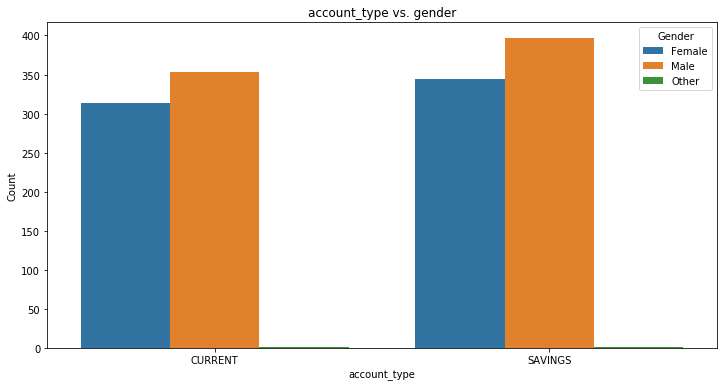

In [73]:
# Tabulation

tab = pd.crosstab(accounts['account_type'], accounts['gender'])
print('the crosstab is:\n',tab)

# Create the countplot
plt.figure(figsize=(12, 6))
sns.countplot(data=accounts, x='account_type', hue='gender')
plt.title("account_type vs. gender")
plt.xlabel("account_type")
plt.ylabel("Count")
plt.legend(title='Gender', loc='upper right')
plt.show()

In [74]:
# Create a contingency table of 'Gender' and 'Account Type'
accounts1 = accounts.dropna(subset=['gender', 'account_type'])

contingency_table = pd.crosstab(accounts1['gender'], accounts1['account_type'])

# Perform chi-square test of independence
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-Square Test of Independence Results:")
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p_value}")

Chi-Square Test of Independence Results:
Chi-Square Statistic: 0.057671185048671955
P-Value: 0.9715761857246709


The p-value obtained from the test is 0.971, which is greater than the conventional significance level of 0.05. This suggests that the evidence against the null hypothesis is strong enough to reject it.

There is no association between gender and account type

## Account Type and Account Status

the crosstab is:
 account_status  ACTIVE  BLOCKED  CLOSED  CREDITBLOCKED  DEBITBLOCKED
account_type                                                        
CURRENT            668        0       0              0             0
SAVINGS            737        1       3              2             1


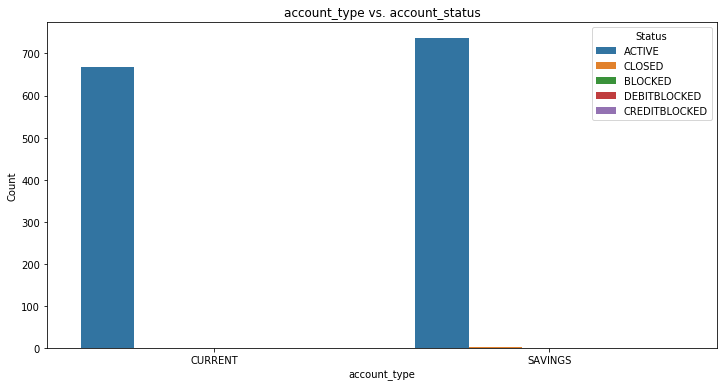

In [75]:
# Tabulation
tab = pd.crosstab(accounts['account_type'], accounts['account_status'])
print('the crosstab is:\n',tab)

# Create the countplot
plt.figure(figsize=(12, 6))
sns.countplot(data=accounts, x='account_type', hue='account_status')
plt.title("account_type vs. account_status")
plt.xlabel("account_type")
plt.ylabel("Count")
plt.legend(title='Status', loc='upper right')
plt.show()

In [76]:
# Create a contingency table of 'Account_status' and 'Account Type'
contingency_table = pd.crosstab(accounts['account_status'], accounts['account_type'])

# Perform chi-square test of independence
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-Square Test of Independence Results:")
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p_value}")

Chi-Square Test of Independence Results:
Chi-Square Statistic: 6.316259135958369
P-Value: 0.17674200335811804


The p-value obtained from the test is 0.176, which is greater than the conventional significance level of 0.05. This suggests that the evidence against the null hypothesis is strong enough to reject it.

There is no association between status and account type

## Account Type and State

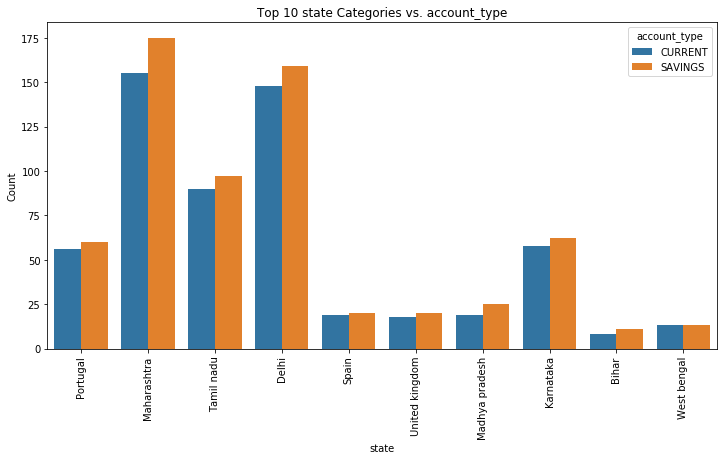

In [77]:
# Grouped Bar Plot
# Get the top 10 most frequent 'state' categories
a = accounts['state'].value_counts().iloc[0:10].index

# Filter the DataFrame to include only the top 10 'state' categories
df_top_10 = accounts[accounts['state'].isin(a)]

# Create the countplot
plt.figure(figsize=(12, 6))
sns.countplot(data=df_top_10, x='state', hue='account_type')
plt.title("Top 10 state Categories vs. account_type")
plt.xlabel("state")
plt.ylabel("Count")
plt.xticks(rotation=90
          )
plt.legend(title='account_type', loc='upper right')
plt.show()

In [78]:
# Create a contingency table of 'account_type' and 'state'
accounts1 = accounts.dropna(subset=['account_type', 'state'])

contingency_table = pd.crosstab(accounts1['account_type'], accounts1['state'])

# Perform chi-square test of independence
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-Square Test of Independence Results:")
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p_value}")


Chi-Square Test of Independence Results:
Chi-Square Statistic: 4.097822712870091
P-Value: 0.999999985431829


The p-value obtained from the test is 0.999, which is greater than the conventional significance level of 0.05. This suggests that the evidence against the null hypothesis is strong enough to reject it.

There is no association between state and account type

## Account Type and City

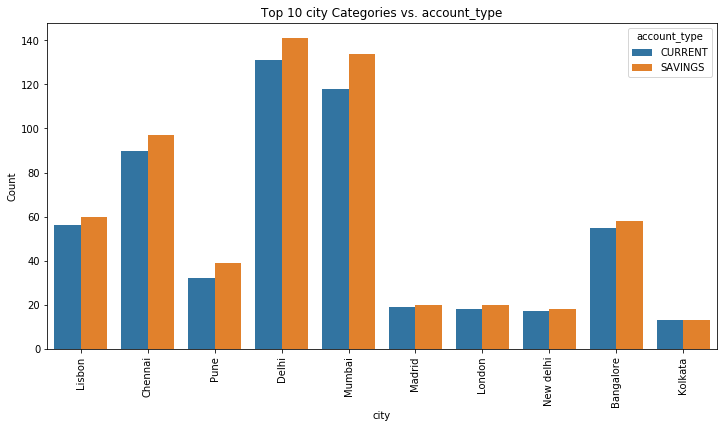

In [79]:
# Grouped Bar Plot
# Get the top 10 most frequent 'city' categories
a = accounts['city'].value_counts().iloc[0:10].index

# Filter the DataFrame to include only the top 10 'city' categories
df_top_10 = accounts[accounts['city'].isin(a)]

# Create the countplot
plt.figure(figsize=(12, 6))
sns.countplot(data=df_top_10, x='city', hue='account_type')
plt.title("Top 10 city Categories vs. account_type")
plt.xlabel("city")
plt.ylabel("Count")
plt.xticks(rotation=90
          )
plt.legend(title='account_type', loc='upper right')
plt.show()

In [80]:
# Create a contingency table of 'Gender' and 'state'
accounts1 = accounts.dropna(subset=['account_type', 'city'])

contingency_table = pd.crosstab(accounts1['account_type'], accounts1['city'])

# Perform chi-square test of independence
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-Square Test of Independence Results:")
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p_value}")

Chi-Square Test of Independence Results:
Chi-Square Statistic: 7.310179842465153
P-Value: 0.9999999999997711


The p-value obtained from the test is 0.999, which is greater than the conventional significance level of 0.05. This suggests that the evidence against the null hypothesis is strong enough to reject it.

There is no association between city and account type

## Account Type and Street

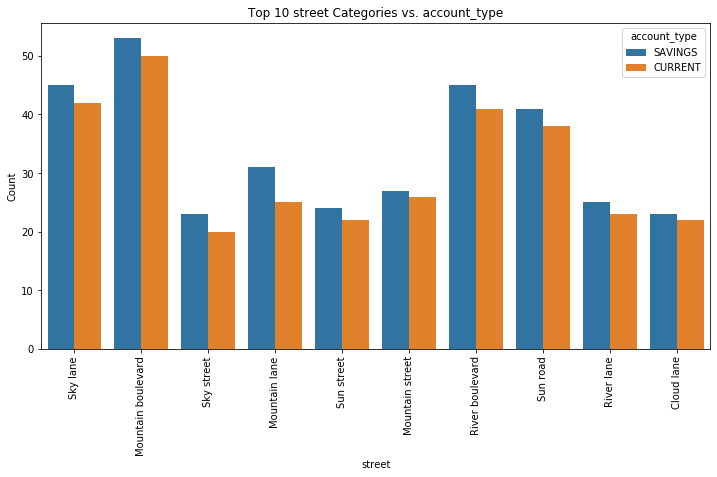

In [81]:
# Grouped Bar Plot
# Get the top 10 most frequent 'street' categories
a = accounts['street'].value_counts().iloc[0:10].index

# Filter the DataFrame to include only the top 10 'street' categories
df_top_10 = accounts[accounts['street'].isin(a)]

# Create the countplot
plt.figure(figsize=(12, 6))
sns.countplot(data=df_top_10, x='street', hue='account_type')
plt.title("Top 10 street Categories vs. account_type")
plt.xlabel("street")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.legend(title='account_type', loc='upper right')
plt.show()

In [82]:
# Create a contingency table of 'Gender' and 'state'
accounts1 = accounts.dropna(subset=['account_type', 'street'])

contingency_table = pd.crosstab(accounts1['account_type'], accounts1['street'])

# Perform chi-square test of independence
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-Square Test of Independence Results:")
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p_value}")

Chi-Square Test of Independence Results:
Chi-Square Statistic: 9.052456132357372
P-Value: 1.0


The p-value obtained from the test is 1, which is greater than the conventional significance level of 0.05. This suggests that the evidence against the null hypothesis is strong enough to reject it.

There is no association between street and account type

## Account Type and Age

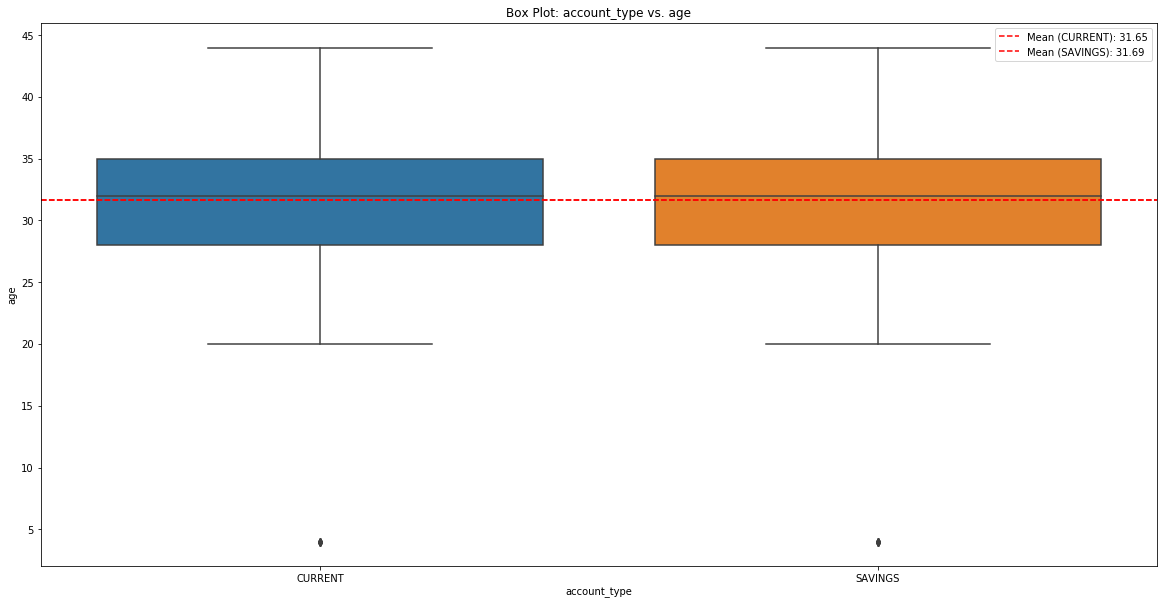

In [83]:
# Set the figure size
plt.figure(figsize=(20, 10))

# Box plot
sns.boxplot(data=accounts, x='account_type', y='age')

# Add mean lines
means = accounts.groupby('account_type')['age'].mean()
for account_type, mean in means.items():
    plt.axhline(y=mean, color='red', linestyle='--', label=f'Mean ({account_type}): {mean:.2f}')

# Set labels and title
plt.xlabel('account_type')
plt.ylabel('age')
plt.title('Box Plot: account_type vs. age')

# Show legend
plt.legend()

# Display the plot
plt.show()


In [84]:
# Drop any rows with missing values
data = accounts[['age', 'account_type']].copy()

data.dropna(inplace=True)

# Perform ANOVA
model = ols('age ~ C(account_type)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)

                       sum_sq      df         F    PR(>F)
C(account_type)      0.368481     1.0  0.010259  0.919337
Residual         50607.729322  1409.0       NaN       NaN


The p-value obtained from the test is 0.9, which is greater than the conventional significance level of 0.05. This suggests that the evidence against the null hypothesis is strong enough to reject it.

There is no association between age and account type

# Account Analysis Summary Report

#### Customer Overview:

Total number of customers: 651

Male: 336

Female: 312

Others: 2

Unknown: 1

#### Account Types:

Saving Accounts: 774

Current Accounts: 668

#### Customers with Both Account Types:

Number of customers with both current and savings account types: 649

Gender distribution among customers with both account types:

     Male: 750
     Female: 656
     Other: 4

#### Account Status:

Most accounts are active, with some being blocked or closed.

    Active accounts: 1405
    Closed accounts: 3
    Credit blocked: 2
    Debit blocked: 1
    Blocked: 1

#### Account Creation:

Account creation gradually increased from January to March.

More accounts are created in March followed by February and January.

Savings accounts are created more than current accounts every month.

Male customers have more accounts in both current and savings accounts than female customers.


#### Account Distribution:

Majority of customers have 2 accounts, while some have only one account.

Many customers have more than 2 accounts, with the maximum number of accounts held by a customer being 11.

Number of customers with more than two accounts: 73

#### Account Distribution by Location:

Across every state, city, and street, saving accounts outnumber current accounts.

#### Age Distribution:

Current and saving accounts are created across all age groups.

# Loading Dataset-Saving Account

In [85]:
savings = accounts[accounts['account_type'] == 'SAVINGS']

In [86]:
df4=pd.read_csv('Savings_Transaction 2.csv')

In [87]:
# Merge df4 with savings DataFrame
savings_accounts = pd.merge(df4, savings[['gender', 'age', 'state', 'city', 'street', 'account_number', 'account_status', 'creation_date', 'block_reason']], on='account_number', how='left')


In [88]:
savings_accounts.head()

,id,customer_id,account_number,transaction_id,transaction_amount,transaction_type,remaining_balance,transaction_time,recipient,narratives,transaction_category,gender,age,state,city,street,account_status,creation_date,block_reason
0,1,13692070,13692070001,03369af75207445f,1000.0,Credit,1000.0,2024-02-01 18:56:54,13692070001,food,NaN,Female,33.0,Assam,Xyz,Abcdefg,ACTIVE,2024-02-01,NaN
1,2,13692070,13692070001,58eae63e3f1f4119,2000.0,Debit,1000.0,2024-02-01 18:57:25,13692070001,food,NaN,Female,33.0,Assam,Xyz,Abcdefg,ACTIVE,2024-02-01,NaN
2,3,13692070,13692070001,ec09d624496e4f6c,2000.0,Debit,1000.0,2024-02-01 18:57:29,13692070001,food,NaN,Female,33.0,Assam,Xyz,Abcdefg,ACTIVE,2024-02-01,NaN
3,4,13692070,13692070001,2e9dd265e7e64e44,2000.0,Debit,1000.0,2024-02-01 18:59:58,13692070001,food,NaN,Female,33.0,Assam,Xyz,Abcdefg,ACTIVE,2024-02-01,NaN
4,5,13692070,13692070001,76d9f3daa9444fc2,2000.0,Debit,1000.0,2024-02-01 19:00:05,13692070001,food,NaN,Female,33.0,Assam,Xyz,Abcdefg,ACTIVE,2024-02-01,NaN


# Checking for Duplicates and Null Values

In [89]:
duplicates=savings_accounts.duplicated()
if any(duplicates):
    print("There are duplicates present")
else:
    print("There are no duplicates")

There are no duplicates


In [90]:
result_data = []

for column in savings_accounts.columns:
    null_count = savings_accounts[column].isnull().sum()
    if null_count > 0:
        result_data.append({'Column Name': column, 'Null Count': null_count})
        

if any(result_data):
    result_df = pd.DataFrame(result_data)
    print(result_df)
else:
    print("There are no null values in the dataset")


            Column Name  Null Count
0            narratives           1
1  transaction_category          78
2                gender          99
3                   age          99
4                 state         837
5                  city         837
6                street         837
7        account_status          16
8         creation_date         181
9          block_reason      101422


# Checking the datatypes

In [91]:
Datatypes=[]
for column in savings_accounts.columns:
    Datatypes.append({'Column Name':column,'Data tye':savings_accounts[column].dtype})

Datatypes=pd.DataFrame(Datatypes)
Datatypes

,Column Name,Data tye
0,id,int64
1,customer_id,int64
2,account_number,int64
3,transaction_id,object
4,transaction_amount,float64
5,transaction_type,object
6,remaining_balance,float64
7,transaction_time,object
8,recipient,int64
9,narratives,object


In [92]:
# Convert 'date_of_birth' to datetime
savings_accounts['transaction_time'] = pd.to_datetime(savings_accounts['transaction_time'])

# Data Visualisation

## Transaction_type

In [93]:
savings_accounts['transaction_type'].value_counts()

Debit     51236
Credit    51038
Name: transaction_type, dtype: int64

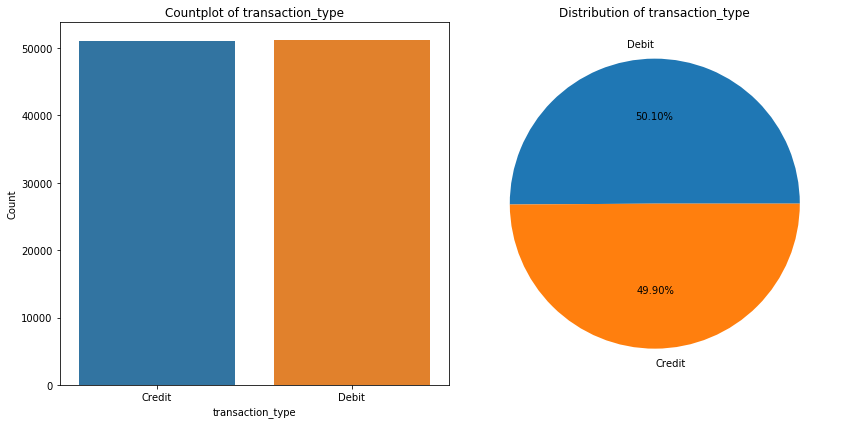

In [94]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Countplot using seaborn
sns.countplot(x='transaction_type', data=savings_accounts, ax=axes[0])
axes[0].set_xlabel('transaction_type')
axes[0].set_ylabel('Count')
axes[0].set_title('Countplot of transaction_type')

# Pie chart using pandas plot
savings_accounts['transaction_type'].value_counts().plot(kind='pie', autopct='%.2f%%', ax=axes[1])
axes[1].set_title('Distribution of transaction_type')
axes[1].set_ylabel('')

# Adjust layout
plt.tight_layout()

# Display the subplots
plt.show()

The majority of transactions in the dataset are debit transactions, with a count of 51,236, compared to 51,038 credit transactions.

In [95]:
savings_accounts['account_number'].nunique()

687

## Transaction_category

In [96]:
savings_accounts['transaction_category'].value_counts()

entertainment    11573
food             11534
loan             11403
miscellaneous    11373
fuel             11325
travel           11284
recharge         11249
bills            11245
shopping         11210
Name: transaction_category, dtype: int64

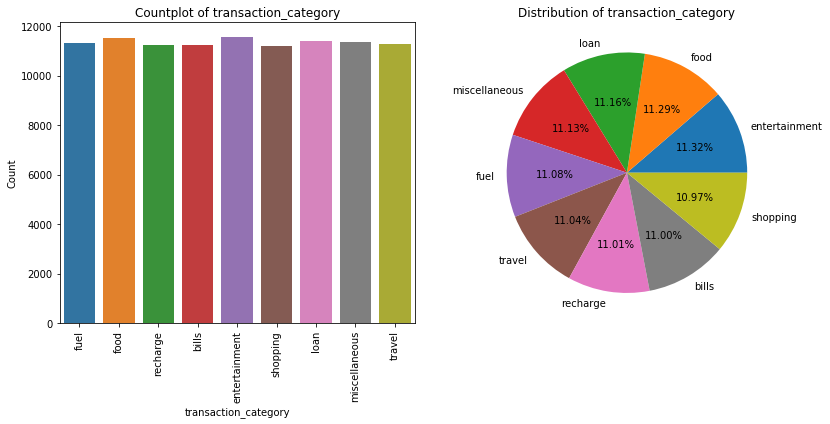

In [97]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Countplot using seaborn
sns.countplot(x='transaction_category', data=savings_accounts, ax=axes[0])
axes[0].set_xlabel('transaction_category')
axes[0].set_ylabel('Count')
axes[0].set_title('Countplot of transaction_category')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)  # Rotate x-labels

# Pie chart using pandas plot
savings_accounts['transaction_category'].value_counts().plot(kind='pie', autopct='%.2f%%', ax=axes[1])
axes[1].set_title('Distribution of transaction_category')
axes[1].set_ylabel('')

# Adjust layout
plt.tight_layout()

# Display the subplots
plt.show()

#### Spending Distribution: 

The transaction counts are relatively close across various categories, indicating a diverse range of spending behaviors among customers. However, there are some differences in transaction volumes, with entertainment, food, and loan transactions having slightly higher counts compared to other categories.

#### Essential vs. Non-Essential Spending: 

Essential categories such as food, fuel, bills, and recharge have high transaction counts, suggesting that customers frequently engage in these types of transactions for their daily needs. On the other hand, non-essential categories like entertainment, travel, shopping, and miscellaneous have slightly lower transaction counts, indicating discretionary spending.

## Gender

In [98]:
savings_accounts['gender'].value_counts()

Male      59740
Female    42288
Other       147
Name: gender, dtype: int64

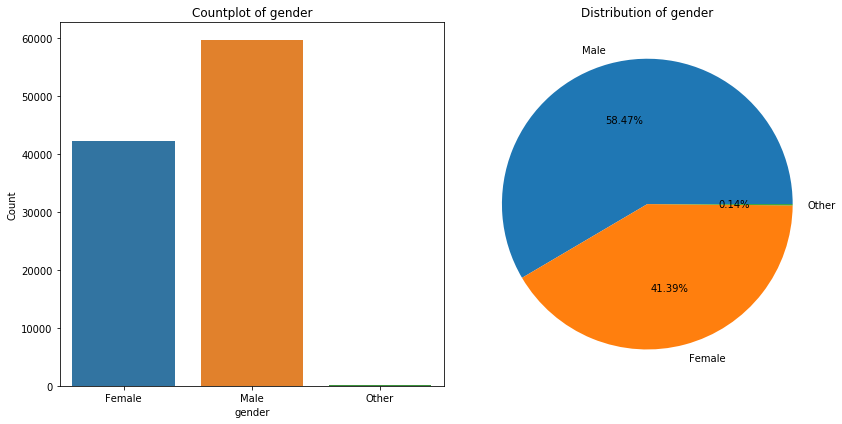

In [99]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Countplot using seaborn
sns.countplot(x='gender', data=savings_accounts, ax=axes[0])
axes[0].set_xlabel('gender')
axes[0].set_ylabel('Count')
axes[0].set_title('Countplot of gender')

# Pie chart using pandas plot
savings_accounts['gender'].value_counts().plot(kind='pie', autopct='%.2f%%', ax=axes[1])
axes[1].set_title('Distribution of gender')
axes[1].set_ylabel('')

# Adjust layout
plt.tight_layout()

# Display the subplots
plt.show()

#### Gender Distribution in Transactions: 

The transaction data indicates that the majority of transactions are associated with male customers, with 59,740 transactions, followed by female customers with 42,288 transactions. This suggests that male customers are more active in conducting transactions compared to females.

## State

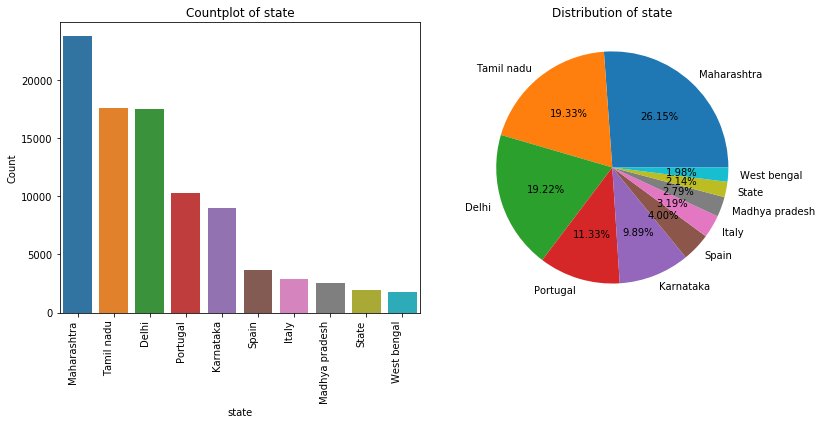

In [100]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Countplot using seaborn
top_10_state = savings_accounts['state'].value_counts().sort_values(ascending=False).index[:10]
sns.countplot(x='state', data=savings_accounts, order=top_10_state, ax=axes[0])
axes[0].set_xlabel('state')
axes[0].set_ylabel('Count')
axes[0].set_title('Countplot of state')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90, ha='right')

# Pie chart using pandas plot
savings_accounts['state'].value_counts().iloc[:10].plot(kind='pie', autopct='%.2f%%', ax=axes[1])
axes[1].set_title('Distribution of state')
axes[1].set_ylabel('')

# Adjust layout
plt.tight_layout()

# Display the subplots
plt.show()

#### Top States: 

Among Indian states, Maharashtra, Tamil Nadu, and Delhi have the highest transaction counts, suggesting significant financial activity in these regions. This may be due to factors such as population density, economic development, or urbanization.

#### International Transactions: 

Transactions from countries like Portugal, Spain, Italy, and the United Kingdom indicate cross-border financial activities 

## City

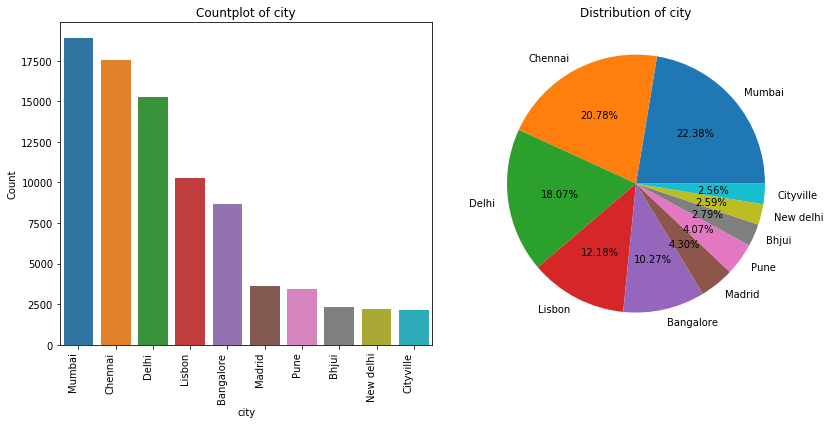

In [101]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Countplot using seaborn
top_10_state = savings_accounts['city'].value_counts().sort_values(ascending=False).index[:10]
sns.countplot(x='city', data=savings_accounts, order=top_10_state, ax=axes[0])
axes[0].set_xlabel('city')
axes[0].set_ylabel('Count')
axes[0].set_title('Countplot of city')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90, ha='right')

# Pie chart using pandas plot
savings_accounts['city'].value_counts().iloc[:10].plot(kind='pie', autopct='%.2f%%', ax=axes[1])
axes[1].set_title('Distribution of city')
axes[1].set_ylabel('')

# Adjust layout
plt.tight_layout()

# Display the subplots
plt.show()

#### Transaction Volume by City: 

The transaction details indicate the volume of transactions conducted in different cities. Cities like Mumbai, Chennai, and Delhi have the highest transaction volumes, suggesting significant financial activity and consumer spending in these urban centers.

#### Urban Economic Centers: 

Mumbai, Chennai, Delhi, and Bangalore are known as major economic and commercial hubs in India. The high transaction volumes in these cities reflect their importance in terms of economic activity, business transactions, and consumer spending.

#### International Transactions: 

Cities like Lisbon, Madrid, Milan, and London also appear in the list, indicating transactions conducted in international cities outside India. This suggests cross-border financial activities

## Street

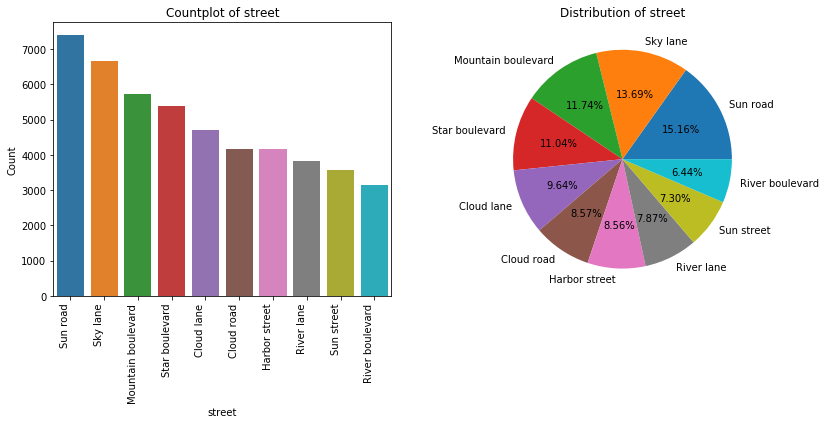

In [102]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Countplot using seaborn
top_10_state = savings_accounts['street'].value_counts().sort_values(ascending=False).index[:10]
sns.countplot(x='street', data=savings_accounts, order=top_10_state, ax=axes[0])
axes[0].set_xlabel('street')
axes[0].set_ylabel('Count')
axes[0].set_title('Countplot of street')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90, ha='right')

# Pie chart using pandas plot
savings_accounts['street'].value_counts().iloc[:10].plot(kind='pie', autopct='%.2f%%', ax=axes[1])
axes[1].set_title('Distribution of street')
axes[1].set_ylabel('')

# Adjust layout
plt.tight_layout()

# Display the subplots
plt.show()

#### Street Popularity: 

The data shows a variety of street names with different transaction counts. Streets like "Sun road," "Sky lane," "Mountain boulevard," and "Star boulevard" have relatively high transaction volumes, indicating significant financial activity in these areas.

#### Urban vs. Suburban Areas: 

Some streets, such as "Sun street," "River lane," and "Forest avenue," suggest transactions occurring in suburban or residential areas. In contrast, streets like "Sun road," "Sky lane," and "Mountain boulevard" may be located in urban or commercial districts.

## Transaction_time

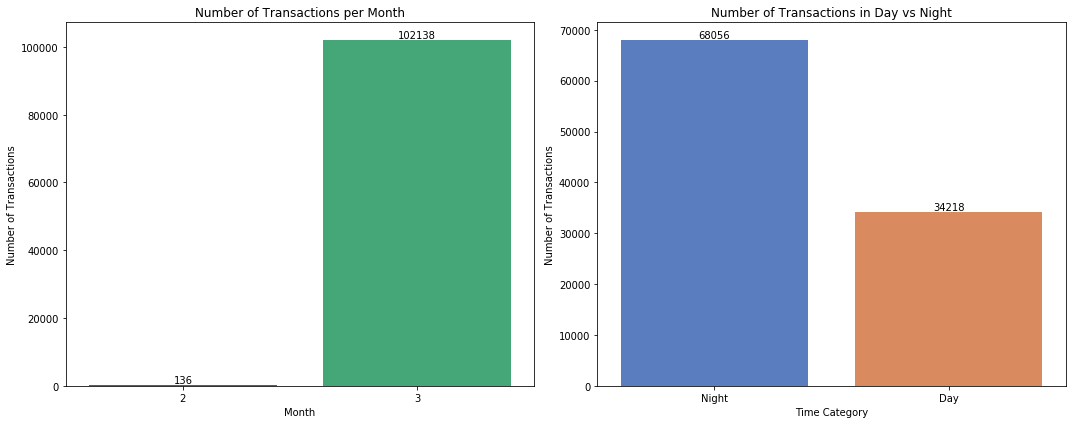

In [103]:
# Convert 'transaction_time' to datetime format
savings_accounts['transaction_time'] = pd.to_datetime(savings_accounts['transaction_time'])

# Extract month from 'transaction_time'
savings_accounts['month'] = savings_accounts['transaction_time'].dt.month

# Define a function to categorize transactions into day or night
def categorize_time(hour):
    if 6 <= hour < 18:
        return 'Day'
    else:
        return 'Night'

# Extract hour from 'transaction_time'
savings_accounts['hour'] = savings_accounts['transaction_time'].dt.hour

# Apply the function to categorize transactions into day or night
savings_accounts['time_category'] = savings_accounts['hour'].apply(categorize_time)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot the number of transactions in each month
sns.countplot(x='month', data=savings_accounts, palette='viridis', ax=axes[0])
axes[0].set_title('Number of Transactions per Month')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Number of Transactions')

# Annotate counts on top of bars for month plot
for p in axes[0].patches:
    axes[0].annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Plot the number of transactions in day and night time
sns.countplot(x='time_category', data=savings_accounts, palette='muted', ax=axes[1])
axes[1].set_title('Number of Transactions in Day vs Night')
axes[1].set_xlabel('Time Category')
axes[1].set_ylabel('Number of Transactions')

# Annotate counts on top of bars for day vs night plot
for p in axes[1].patches:
    axes[1].annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

Most of the Transactions are made in March month and also mostly the transactions are made in night than day

## Number of Accounts per customer

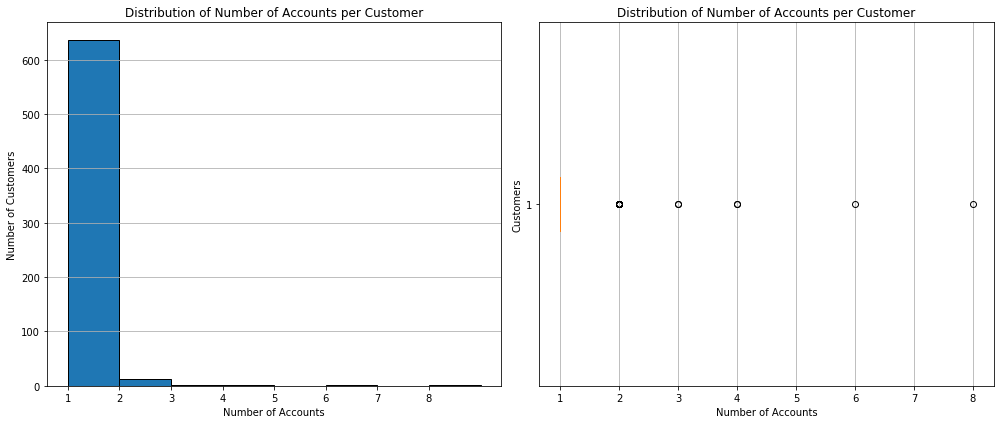

In [104]:
# Group by 'customer_id' and count the number of unique account numbers
accounts_per_customer = savings_accounts.groupby('customer_id')['account_number'].nunique()

# Creating subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Histogram
axs[0].hist(accounts_per_customer, bins=range(1, accounts_per_customer.max() + 2), edgecolor='black')
axs[0].set_title('Distribution of Number of Accounts per Customer')
axs[0].set_xlabel('Number of Accounts')
axs[0].set_ylabel('Number of Customers')
axs[0].grid(axis='y')
axs[0].set_xticks(range(1, accounts_per_customer.max() + 1))

# Box plot
axs[1].boxplot(accounts_per_customer, vert=False)
axs[1].set_title('Distribution of Number of Accounts per Customer')
axs[1].set_xlabel('Number of Accounts')
axs[1].set_ylabel('Customers')
axs[1].grid(axis='x')

plt.tight_layout()
plt.show()

In [105]:

# Step 1: Drop duplicate customer IDs to ensure each customer is counted only once
unique_customers = savings_accounts.drop_duplicates(subset=['customer_id'])

# Step 2: Get the count of unique customers
total_customers = len(unique_customers)

# Step 3: Get the distribution of genders among customers
gender_distribution = unique_customers['gender'].value_counts()

# Step 4: Print the results
print("Total number of customers:", total_customers)
print("Gender distribution among customers:")
print(gender_distribution)

Total number of customers: 656
Gender distribution among customers:
Male      338
Female    311
Other       2
Name: gender, dtype: int64


In [106]:
# Step 1: Group the dataframe by customer_id and count the number of unique account numbers for each customer
customer_account_count = savings_accounts.groupby('customer_id')['account_number'].nunique()

# Step 2: Filter customers with more than one account number
customers_with_multiple_accounts = customer_account_count[customer_account_count > 1]

# Step 3: Get the count of customers with multiple accounts
num_customers_with_multiple_accounts = len(customers_with_multiple_accounts)

# Step 4: Print the result
print("Number of customers with more than one account:", num_customers_with_multiple_accounts)

Number of customers with more than one account: 19


In [107]:
# Step 1: Group the dataframe by customer_id and count the number of unique account numbers for each customer
customer_account_count = savings_accounts.groupby(['customer_id', 'gender'])['account_number'].nunique().reset_index()

# Step 2: Filter customers with more than one account number
customers_with_multiple_accounts = customer_account_count[customer_account_count['account_number'] > 1]

# Step 3: Get the count of customers with multiple accounts across genders
num_customers_with_multiple_accounts = customers_with_multiple_accounts.groupby('gender').size()

# Step 4: Print the result
print("Number of customers with more than one account across genders:")
print(num_customers_with_multiple_accounts)


Number of customers with more than one account across genders:
gender
Female     3
Male      16
dtype: int64


#### Distribution of Number of Accounts per Customer:

Total number of customers: 656

Gender distribution among customers:

Male      338

Female    311

Other       2

The majority of customers seem to have 1 saving account.

There are also customers with multiple savings accounts, with a maximum of 8 savings accounts.

Number of customers with more than one account: 19

Number of customers with more than one account across genders:

Female     3

Male      16

## Average Number of Transactions made

In [254]:
# Group transactions by account number and count the transactions in each group
transaction_counts_per_account = savings_accounts.groupby('account_number')['transaction_id'].count()

# Calculate the average transaction count per account
average_transaction_count_per_account = transaction_counts_per_account.mean()

print("Average transaction count per account:", average_transaction_count_per_account)

Average transaction count per account: 148.87045123726347


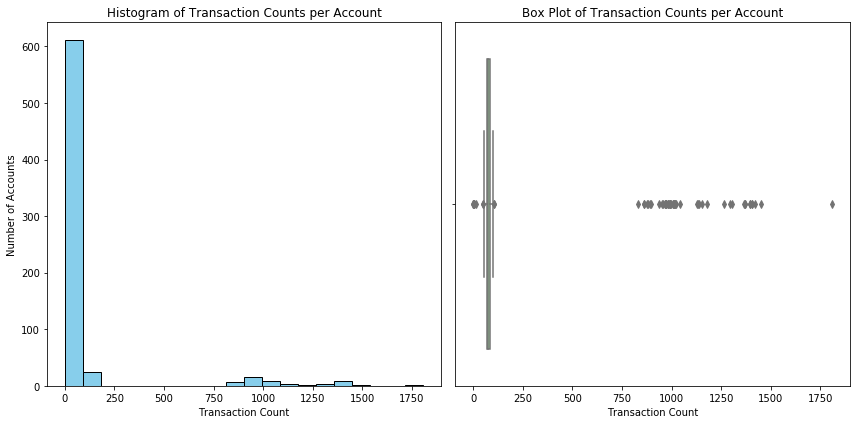

In [255]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histogram
axes[0].hist(transaction_counts_per_account, bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('Histogram of Transaction Counts per Account')
axes[0].set_xlabel('Transaction Count')
axes[0].set_ylabel('Number of Accounts')

# Box plot
sns.boxplot(transaction_counts_per_account, ax=axes[1], color='lightgreen')
axes[1].set_title('Box Plot of Transaction Counts per Account')
axes[1].set_xlabel('Transaction Count')

# Show plots
plt.tight_layout()
plt.show()

On an average most of the accounts are making 148 transaction and some accounts are making more than 800 transaction counts.

## Age and Transaction_type

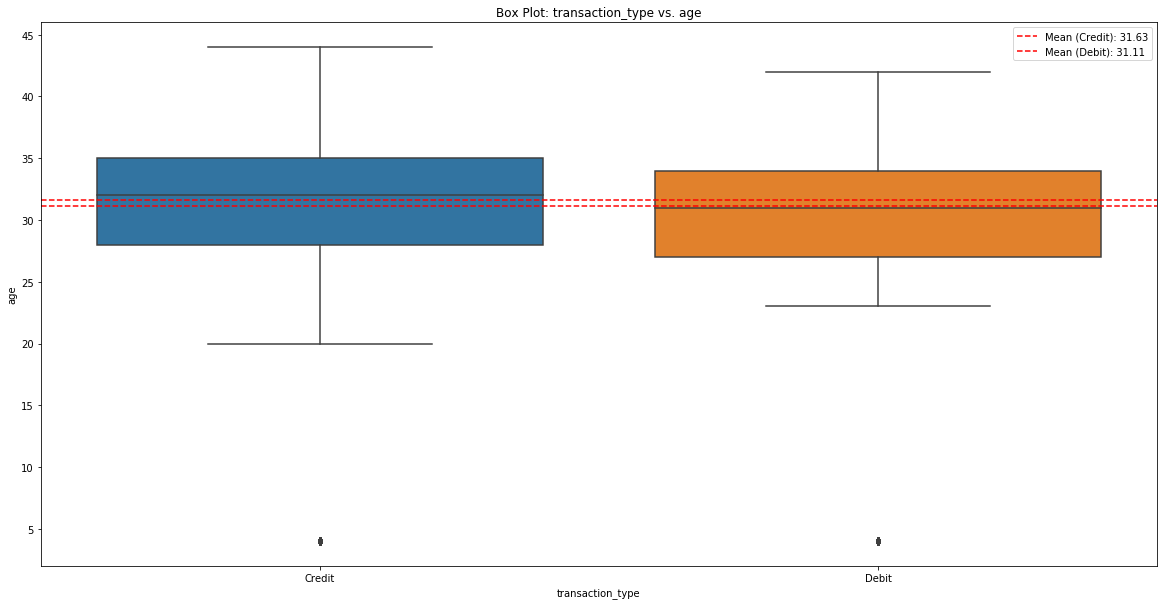

In [108]:
# Set the figure size
plt.figure(figsize=(20, 10))

# Box plot
sns.boxplot(data=savings_accounts, x='transaction_type', y='age')

# Add mean lines
means = savings_accounts.groupby('transaction_type')['age'].mean()
for transaction_type, mean in means.items():
    plt.axhline(y=mean, color='red', linestyle='--', label=f'Mean ({transaction_type}): {mean:.2f}')

# Set labels and title
plt.xlabel('transaction_type')
plt.ylabel('age')
plt.title('Box Plot: transaction_type vs. age')

# Show legend
plt.legend()

# Display the plot
plt.show()


In [109]:
# Drop any rows with missing values
data = savings_accounts[['age', 'transaction_type']].copy()

data.dropna(inplace=True)

# Perform ANOVA
model = ols('age ~ C(transaction_type)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)

                           sum_sq        df          F        PR(>F)
C(transaction_type)  6.911163e+03       1.0  186.65768  1.859065e-42
Residual             3.783044e+06  102173.0        NaN           NaN


The ANOVA test indicates that there is a significant relationship between age and transaction type.

# Transaction_amount and Transaction_type

In [110]:
savings_accounts.groupby('transaction_type')['transaction_amount'].skew()

transaction_type
Credit     4.051196
Debit     17.616911
Name: transaction_amount, dtype: float64

In [111]:
kurtosis = savings_accounts.groupby('transaction_type')['transaction_amount'].apply(lambda x: x.kurt())
print(kurtosis)


transaction_type
Credit     141.539137
Debit     1466.512470
Name: transaction_amount, dtype: float64


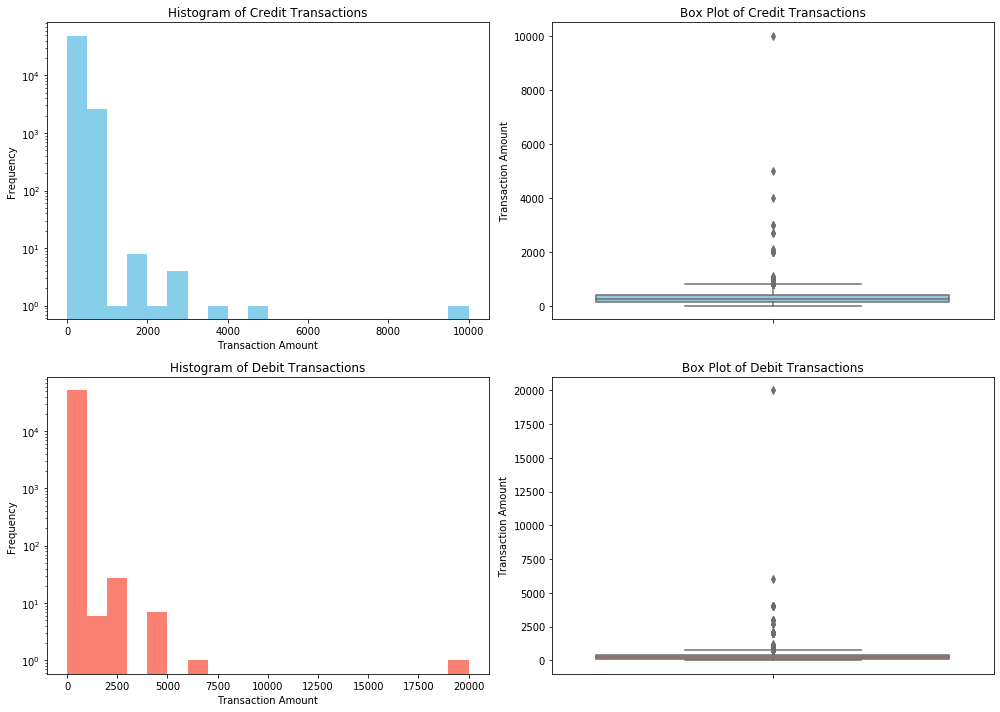

In [112]:
# Filter data for 'credit' and 'debit' transactions
credit_transactions = savings_accounts[savings_accounts['transaction_type'] == 'Credit']['transaction_amount']
debit_transactions = savings_accounts[savings_accounts['transaction_type'] == 'Debit']['transaction_amount']

# Set up the figure and axes for subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Histogram for credit transactions
axes[0, 0].hist(credit_transactions,bins=20, color='skyblue')
axes[0, 0].set_title('Histogram of Credit Transactions')
axes[0, 0].set_xlabel('Transaction Amount')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_yscale('log')

# Box plot for credit transactions
sns.boxplot(y=credit_transactions, ax=axes[0, 1], color='skyblue')
axes[0, 1].set_title('Box Plot of Credit Transactions')
axes[0, 1].set_ylabel('Transaction Amount')


# Histogram for debit transactions
axes[1, 0].hist(debit_transactions,bins=20,color='salmon')
axes[1, 0].set_title('Histogram of Debit Transactions')
axes[1, 0].set_xlabel('Transaction Amount')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_yscale('log')

# Box plot for debit transactions
sns.boxplot(y=debit_transactions, ax=axes[1, 1], color='salmon')
axes[1, 1].set_title('Box Plot of Debit Transactions')
axes[1, 1].set_ylabel('Transaction Amount')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()


In [113]:
# Drop any rows with missing values
data = savings_accounts[['transaction_amount', 'transaction_type']].copy()

data.dropna(inplace=True)

# Perform ANOVA
model = ols('transaction_amount ~ C(transaction_type)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)

                           sum_sq        df         F    PR(>F)
C(transaction_type)  6.979073e+03       1.0  0.169335  0.680705
Residual             4.215110e+09  102272.0       NaN       NaN


#### Skewness: 

Both credit and debit transactions exhibit positive skewness, indicating that the distributions are skewed towards higher transaction amounts. This suggests that there might be some transactions with unusually high amounts.

#### Kurtosis: 

The high kurtosis values for both types of transactions indicate the presence of outliers or extreme values in the data. This implies that there are significant variations in transaction amounts, with some transactions being substantially larger than the majority.

#### Relationship:

The p-value obtained from the test is 0.68, which is greater than the conventional significance level of 0.05. This suggests that the evidence against the null hypothesis is not strong enough to reject it.

There is no association between transaction amount and transaction type 



In [114]:
savings_accounts.groupby('transaction_type')['transaction_amount'].sum().sort_values(ascending=False)

transaction_type
Debit     14064614.08
Credit    13983596.85
Name: transaction_amount, dtype: float64

## Transaction_amount and Transaction_category

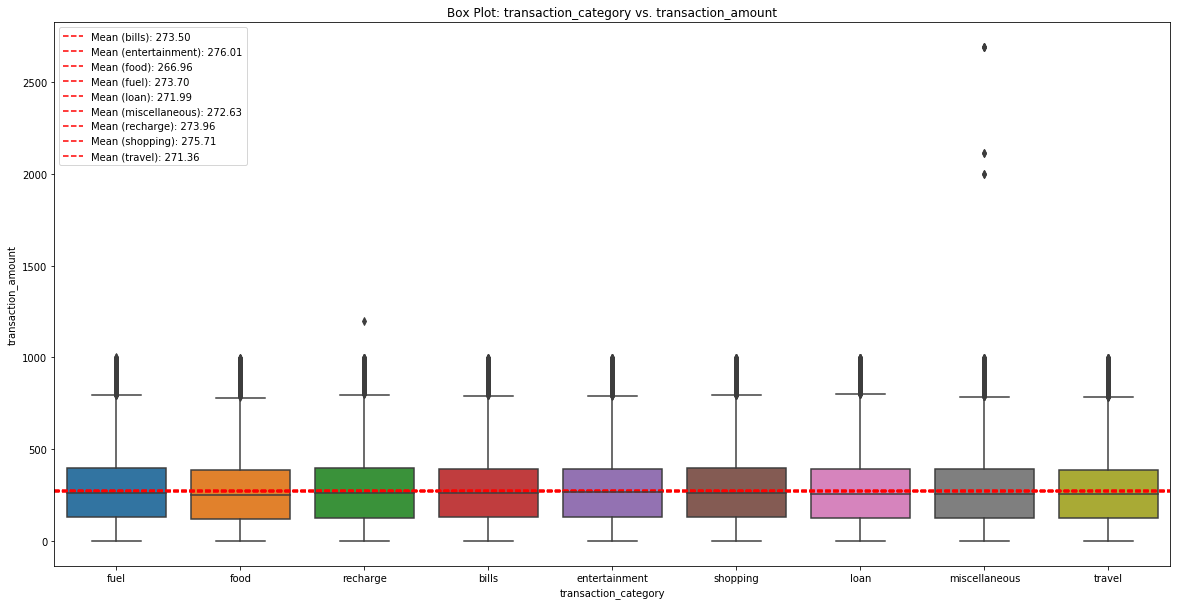

In [115]:
# Set the figure size
plt.figure(figsize=(20, 10))

# Box plot
sns.boxplot(data=savings_accounts, x='transaction_category', y='transaction_amount')

# Add mean lines
means = savings_accounts.groupby('transaction_category')['transaction_amount'].mean()
for transaction_category, mean in means.items():
    plt.axhline(y=mean, color='red', linestyle='--', label=f'Mean ({transaction_category}): {mean:.2f}')

# Set labels and title
plt.xlabel('transaction_category')
plt.ylabel('transaction_amount')
plt.title('Box Plot: transaction_category vs. transaction_amount')

# Show legend
plt.legend()

# Display the plot
plt.show()


In [116]:
# Drop any rows with missing values
data = savings_accounts[['transaction_amount', 'transaction_category']].copy()

data.dropna(inplace=True)

# Perform ANOVA
model = ols('transaction_amount ~ C(transaction_category)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)

                               sum_sq        df         F    PR(>F)
C(transaction_category)  6.672764e+05       8.0  2.480709  0.010941
Residual                 3.435861e+09  102187.0       NaN       NaN


The ANOVA test indicates that there is a significant relationship between transaction category and transaction amount.

In [117]:
savings_accounts.groupby('transaction_category')['transaction_amount'].sum().sort_values(ascending=False)

transaction_category
entertainment    3194228.10
loan             3101522.79
miscellaneous    3100603.06
fuel             3099599.11
shopping         3090715.59
recharge         3081744.15
food             3079161.82
bills            3075499.28
travel           3062032.85
Name: transaction_amount, dtype: float64

## Transaction_amount and Gender

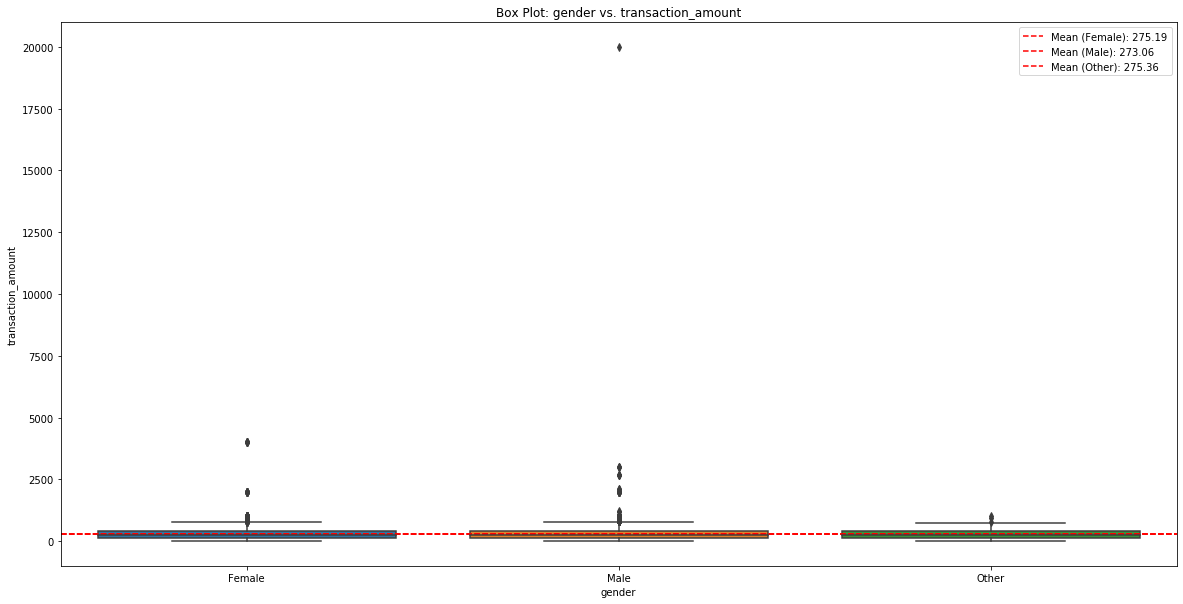

In [118]:
# Set the figure size
plt.figure(figsize=(20, 10))

# Box plot
sns.boxplot(data=savings_accounts, x='gender', y='transaction_amount')

# Add mean lines
means = savings_accounts.groupby('gender')['transaction_amount'].mean()
for gender, mean in means.items():
    plt.axhline(y=mean, color='red', linestyle='--', label=f'Mean ({gender}): {mean:.2f}')

# Set labels and title
plt.xlabel('gender')
plt.ylabel('transaction_amount')
plt.title('Box Plot: gender vs. transaction_amount')

# Show legend
plt.legend()

# Display the plot
plt.show()


In [119]:
# Drop any rows with missing values
data = savings_accounts[['transaction_amount', 'gender']].copy()

data.dropna(inplace=True)

# Perform ANOVA
model = ols('transaction_amount ~ C(gender)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)

                 sum_sq        df         F    PR(>F)
C(gender)  1.124107e+05       2.0  1.421218  0.241425
Residual   4.040629e+09  102172.0       NaN       NaN


The p value is greater than the optimal value of 0.05 indicates there is no relation between gender and transaction amount

In [120]:
savings_accounts.groupby('gender')['transaction_amount'].sum().sort_values(ascending=False)

gender
Male      16312550.27
Female    11637107.35
Other        40478.05
Name: transaction_amount, dtype: float64

## Transaction_amount and State

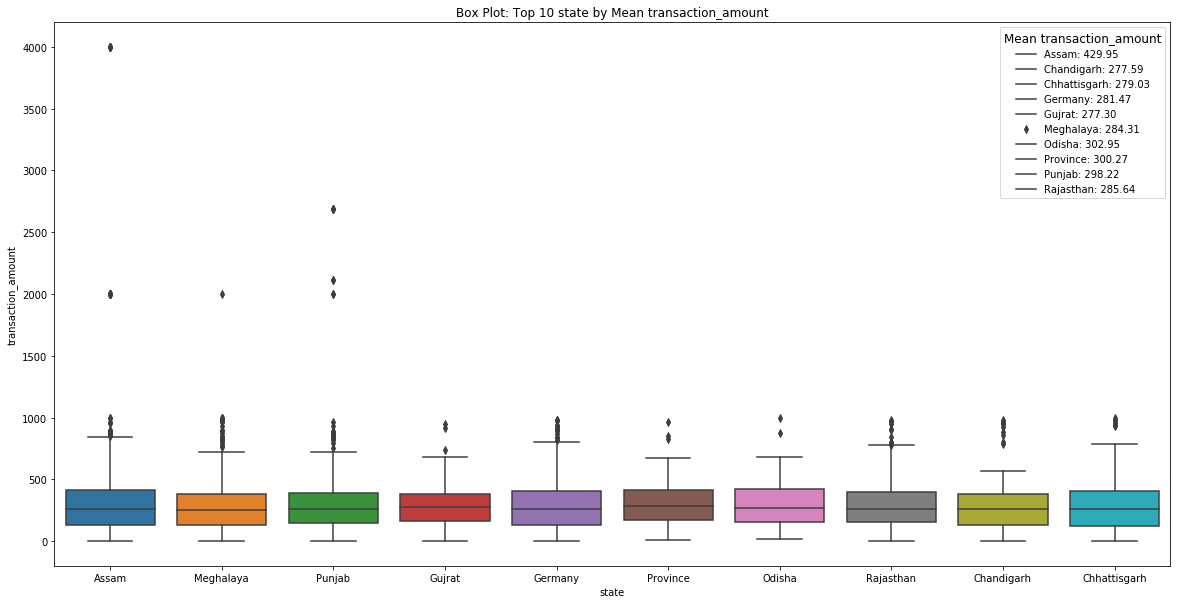

In [121]:
# Get top 10 states by mean transactions
top_10_states = savings_accounts.groupby('state')['transaction_amount'].mean().nlargest(10).index

# Filter DataFrame to include only top 10 street
transactions_top_10 = savings_accounts[savings_accounts['state'].isin(top_10_states)]

# Set the figure size
plt.figure(figsize=(20, 10))

# Box plot
sns.boxplot(data=transactions_top_10, x='state', y='transaction_amount')

# Set labels and title
plt.xlabel('state')
plt.ylabel('transaction_amount')
plt.title('Box Plot: Top 10 state by Mean transaction_amount')

# Add a legend for mean age by city
means = transactions_top_10.groupby('state')['transaction_amount'].mean()
legend_labels = [f'{state}: {mean:.2f}' for state, mean in means.items()]
plt.legend(legend_labels, title='Mean transaction_amount', title_fontsize='large')

# Display the plot
plt.show()

In [122]:
# Drop any rows with missing values
data = savings_accounts[['transaction_amount', 'state']].copy()

data.dropna(inplace=True)

# Perform ANOVA
model = ols('transaction_amount ~ C(state)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)

                sum_sq        df         F        PR(>F)
C(state)  9.958605e+06      29.0  8.694052  2.231897e-37
Residual  4.005403e+09  101407.0       NaN           NaN


Since the p-value is much smaller than the significance level (typically 0.05), we reject the null hypothesis. This suggests that there is a significant relationship between the state variable and transaction amount.

In [123]:
savings_accounts.groupby('state')['transaction_amount'].sum().sort_values(ascending=False)

state
Maharashtra          6545952.20
Delhi                4781843.84
Tamil nadu           4760690.43
Portugal             2824116.19
Karnataka            2444187.23
Spain                1006897.91
Italy                 762585.00
Madhya pradesh        698765.10
State                 533590.03
West bengal           487602.52
Mizoram               369273.27
United kingdom        364428.39
Arunachal pradesh     344715.72
Andhra pradesh        330346.84
Punjab                186687.59
Bihar                 175592.56
Telangana             161734.92
Assam                 147041.63
Meghalaya             132202.17
Germany               121876.26
Rajasthan             113969.20
Uttar pradesh         113475.27
Gujarat                86226.98
Chhattisgarh           61945.36
Chandigarh             54962.05
Manipur                45231.13
Gujrat                 44921.94
Goa                    41358.35
Province               27024.66
Odisha                 18782.69
Name: transaction_amount, dtype: f

## Transaction_amount and City

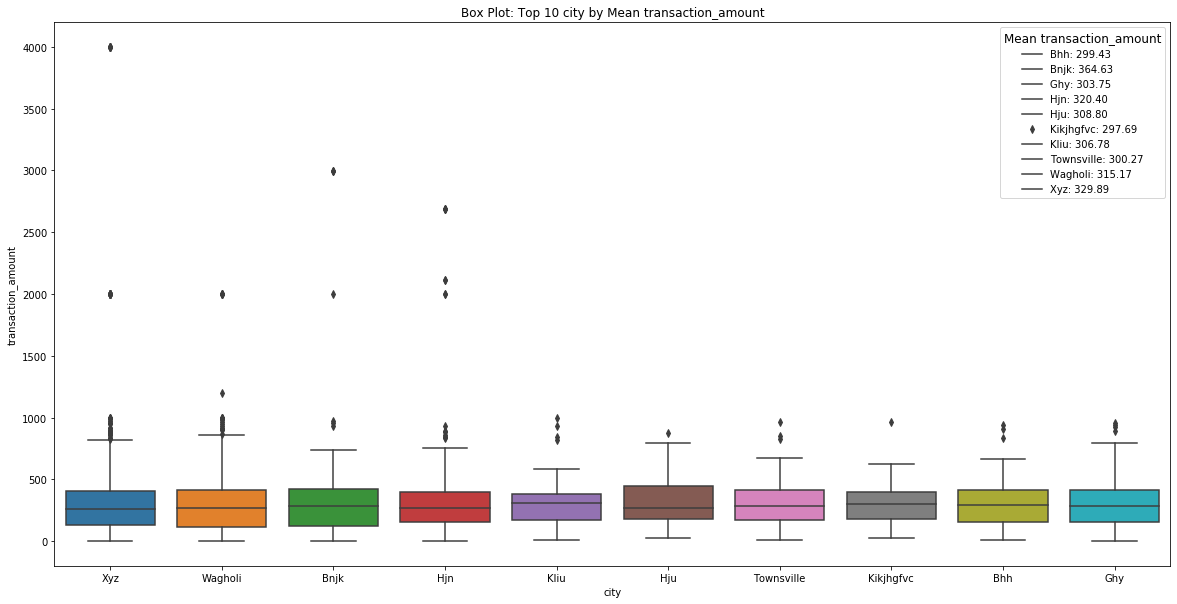

In [124]:
# Get top 10 city by mean transactions
top_10_city = savings_accounts.groupby('city')['transaction_amount'].mean().nlargest(10).index

# Filter DataFrame to include only top 10 street
transactions_top_10 = savings_accounts[savings_accounts['city'].isin(top_10_city)]

# Set the figure size
plt.figure(figsize=(20, 10))

# Box plot
sns.boxplot(data=transactions_top_10, x='city', y='transaction_amount')

# Set labels and title
plt.xlabel('city')
plt.ylabel('transaction_amount')
plt.title('Box Plot: Top 10 city by Mean transaction_amount')

# Add a legend for mean age by city
means = transactions_top_10.groupby('city')['transaction_amount'].mean()
legend_labels = [f'{city}: {mean:.2f}' for city, mean in means.items()]
plt.legend(legend_labels, title='Mean transaction_amount', title_fontsize='large')

# Display the plot
plt.show()

In [125]:
# Drop any rows with missing values
data = savings_accounts[['transaction_amount', 'city']].copy()

data.dropna(inplace=True)

# Perform ANOVA
model = ols('transaction_amount ~ C(city)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)

                sum_sq        df         F        PR(>F)
C(city)   7.772498e+06      50.0  3.932651  2.989049e-19
Residual  4.007589e+09  101386.0       NaN           NaN


Since the p-value is much smaller than the significance level (typically 0.05), we reject the null hypothesis. This suggests that there is a significant relationship between the city variable and transaction amount.

In [126]:
savings_accounts.groupby('city')['transaction_amount'].sum().sort_values(ascending=False)

city
Mumbai           5204508.34
Chennai          4760690.43
Delhi            4172618.19
Lisbon           2824116.19
Bangalore        2365550.35
Madrid           1006897.91
Pune              934598.32
Bhjui             636665.41
New delhi         609225.65
Cityville         592473.08
Kolkata           487602.52
Milan             398488.75
London            364428.39
Rome              364096.25
Juijyhgf          344715.72
Visakhapatnam     330346.84
Xyz               327579.84
Newyork           290798.76
Hyderabad         161734.92
Wagholi           127645.54
Hjn               122712.37
Berlin            121876.26
Jaipur            113969.20
Iop                83783.62
Surat              83296.36
Gghj               83124.33
Lucknow            67816.88
Chandigarh         54962.05
Ahmedabad          47852.56
Sdf                47751.41
Kharadi            47073.67
Bnjk               46672.69
Kanpur             45658.39
Ghy                44043.44
Kull               43758.89
Nagpur         

## Transaction_amount and Street

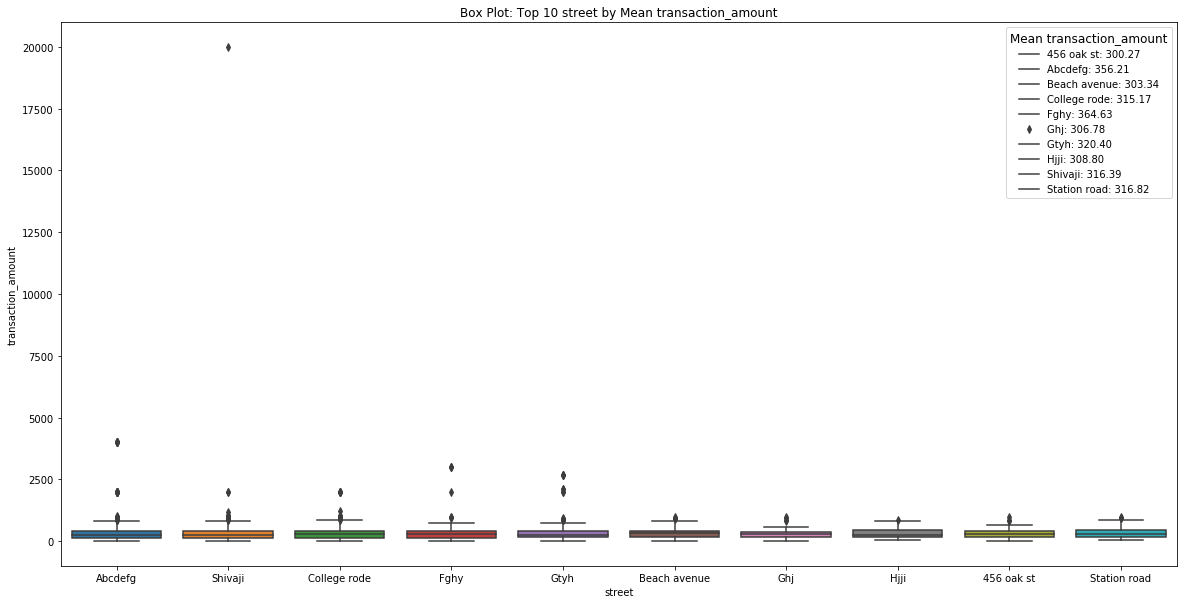

In [127]:
# Get top 10 street by mean transactions
top_10_street = savings_accounts.groupby('street')['transaction_amount'].mean().nlargest(10).index

# Filter DataFrame to include only top 10 street
transactions_top_10 = savings_accounts[savings_accounts['street'].isin(top_10_street)]

# Set the figure size
plt.figure(figsize=(20, 10))

# Box plot
sns.boxplot(data=transactions_top_10, x='street', y='transaction_amount')

# Set labels and title
plt.xlabel('street')
plt.ylabel('transaction_amount')
plt.title('Box Plot: Top 10 street by Mean transaction_amount')

# Add a legend for mean age by city
means = transactions_top_10.groupby('street')['transaction_amount'].mean()
legend_labels = [f'{street}: {mean:.2f}' for street, mean in means.items()]
plt.legend(legend_labels, title='Mean transaction_amount', title_fontsize='large')

# Display the plot
plt.show()

In [128]:
# Drop any rows with missing values
data = savings_accounts[['transaction_amount', 'street']].copy()

data.dropna(inplace=True)

# Perform ANOVA
model = ols('transaction_amount ~ C(street)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)

                 sum_sq        df         F        PR(>F)
C(street)  1.121569e+07      84.0  3.379631  1.806338e-23
Residual   4.004146e+09  101352.0       NaN           NaN


Since the p-value is much smaller than the significance level (typically 0.05), we reject the null hypothesis. This suggests that there is a significant relationship between the street variable and transaction amount.

In [129]:
savings_accounts.groupby('street')['transaction_amount'].sum().sort_values(ascending=False)

street
Sun road              2020617.89
Sky lane              1823830.75
Mountain boulevard    1554926.95
Star boulevard        1473607.78
Cloud lane            1271649.63
Cloud road            1149064.60
Harbor street         1127900.87
River lane            1036941.41
Sun street             962965.33
River boulevard        844041.51
Mountain street        793366.61
Mountain lane          774948.35
Sky street             734923.85
Beach road             685871.15
Sun lane               667469.22
Dfty                   636665.41
Forest avenue          592449.24
123 main st            533590.03
Forest lane            508650.63
Main road              442861.95
Valley road            398488.75
Harbor avenue          395252.42
Sun boulevard          393051.97
Harbor lane            383960.28
Star road              382089.97
68 virar street        378382.61
Cloud street           346659.77
Iouytr                 344715.72
Xyz                    342191.36
Market lane            327198.13
23,

## Transaction_amount and time_category

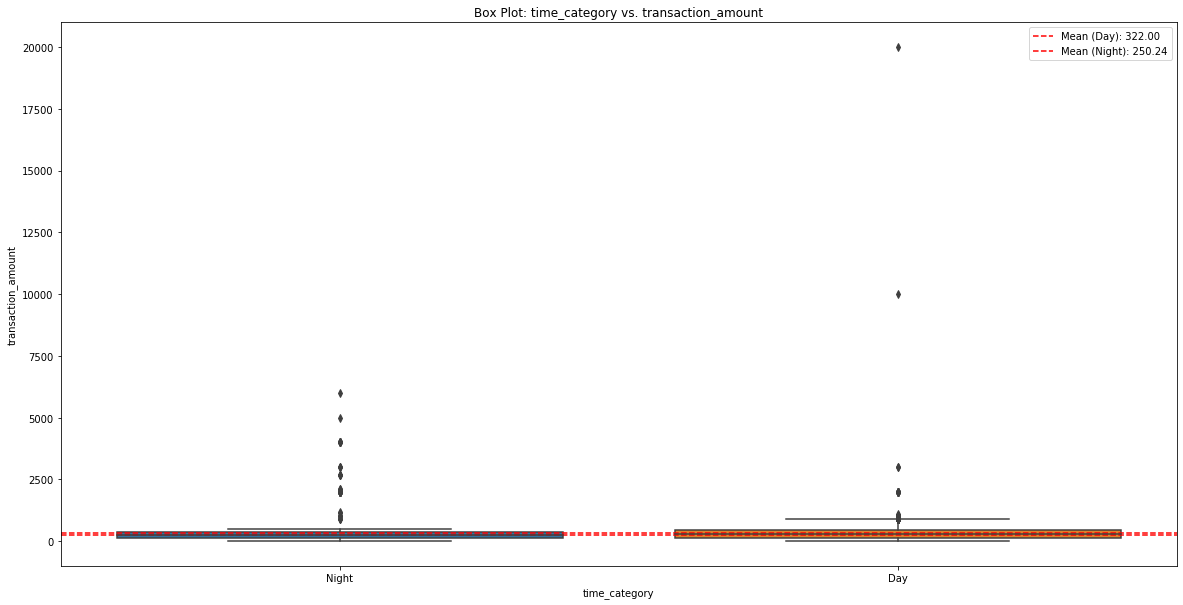

In [130]:
# Set the figure size
plt.figure(figsize=(20, 10))

# Box plot
sns.boxplot(data=savings_accounts, x='time_category', y='transaction_amount')

# Add mean lines
means = savings_accounts.groupby('time_category')['transaction_amount'].mean()
for time_category, mean in means.items():
    plt.axhline(y=mean, color='red', linestyle='--', label=f'Mean ({time_category}): {mean:.2f}')

# Set labels and title
plt.xlabel('time_category')
plt.ylabel('transaction_amount')
plt.title('Box Plot: time_category vs. transaction_amount')

# Show legend
plt.legend()

# Display the plot
plt.show()


In [131]:
# Drop any rows with missing values
data = savings_accounts[['transaction_amount', 'time_category']].copy()

data.dropna(inplace=True)

# Perform ANOVA
model = ols('transaction_amount ~ C(time_category)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)

                        sum_sq        df            F  PR(>F)
C(time_category)  1.172644e+08       1.0  2926.620905     0.0
Residual          4.097852e+09  102272.0          NaN     NaN


Since the p-value is much smaller than the significance level (typically 0.05), we reject the null hypothesis. This suggests that there is a significant relationship between the time_category(day or night) and transaction amount.

In [132]:
savings_accounts.groupby('time_category')['transaction_amount'].sum()

time_category
Day      11018174.75
Night    17030036.18
Name: transaction_amount, dtype: float64

## Transaction_type and Transaction_category

the crosstab is:
 transaction_category  bills  entertainment  food  fuel  loan  miscellaneous  \
transaction_type                                                              
Credit                 5622           5695  5759  5649  5717           5709   
Debit                  5623           5878  5775  5676  5686           5664   

transaction_category  recharge  shopping  travel  
transaction_type                                  
Credit                    5593      5596    5663  
Debit                     5656      5614    5621  


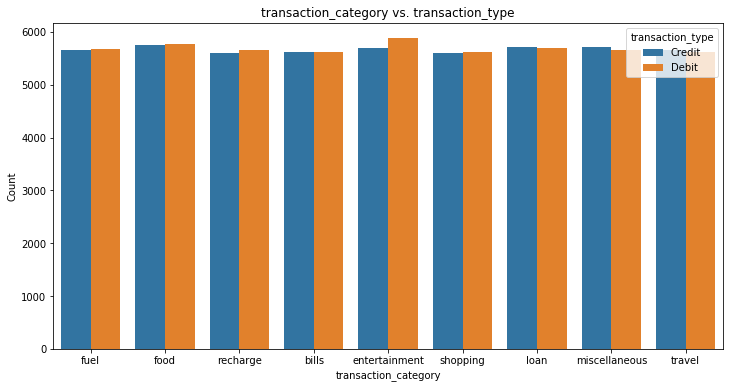

In [133]:
# Tabulation
tab = pd.crosstab(savings_accounts['transaction_type'], savings_accounts['transaction_category'])
print('the crosstab is:\n',tab)


# Create the countplot
plt.figure(figsize=(12, 6))
sns.countplot(data=savings_accounts, x='transaction_category', hue='transaction_type')
plt.title("transaction_category vs. transaction_type")
plt.xlabel("transaction_category")
plt.ylabel("Count")
plt.legend(title='transaction_type', loc='upper right')
plt.show()

In [134]:
# Create a contingency table of 'transaction_type' and 'transaction_category'
savings_accounts1 = savings_accounts.dropna(subset=['transaction_category', 'transaction_type'])

contingency_table = pd.crosstab(savings_accounts1['transaction_category'], savings_accounts1['transaction_type'])

# Perform chi-square test of independence
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-Square Test of Independence Results:")
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p_value}")

Chi-Square Test of Independence Results:
Chi-Square Statistic: 3.4275332575868798
P-Value: 0.9047404425126887


The p value is greater than the optimal value of 0.05 which indicates there is no relationship between transaction category and transaction type

## Transaction_type and Gender

the crosstab is:
 gender            Female   Male  Other
transaction_type                      
Credit             23460  27342    147
Debit              18828  32398      0


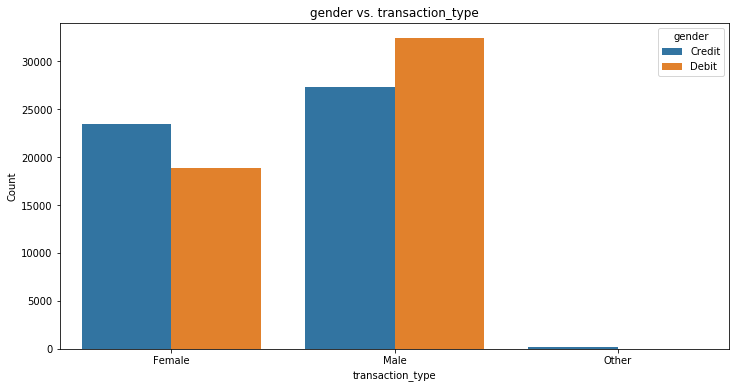

In [135]:
# Tabulation
tab = pd.crosstab(savings_accounts['transaction_type'], savings_accounts['gender'])
print('the crosstab is:\n',tab)


# Create the countplot
plt.figure(figsize=(12, 6))
sns.countplot(data=savings_accounts, x='gender', hue='transaction_type')
plt.title("gender vs. transaction_type")
plt.xlabel("transaction_type")
plt.ylabel("Count")
plt.legend(title='gender', loc='upper right')
plt.show()

In [136]:
# Create a contingency table of 'transaction_type' and 'gender'
savings_accounts1=savings_accounts.dropna(subset=['transaction_type', 'gender'])

contingency_table = pd.crosstab(savings_accounts1['transaction_type'], savings_accounts1['gender'])

# Perform chi-square test of independence
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-Square Test of Independence Results:")
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p_value}")

Chi-Square Test of Independence Results:
Chi-Square Statistic: 1081.527879197656
P-Value: 1.4099542467819571e-235


Based on the Chi-Square Test of Independence results, we can conclude that there is a statistically significant relationship between transaction type and gender.

Female tends to do more credit transactions and male does more debit transactions.

## Transaction_type and State

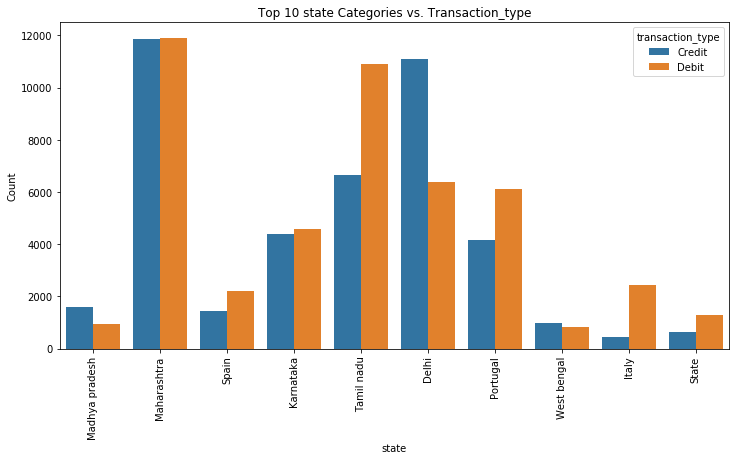

In [137]:
# Grouped Bar Plot
# Get the top 10 most frequent 'state' categories
a = savings_accounts['state'].value_counts().iloc[0:10].index

# Filter the DataFrame to include only the top 10 'state' categories
df_top_10 = savings_accounts[savings_accounts['state'].isin(a)]

# Create the countplot
plt.figure(figsize=(12, 6))
sns.countplot(data=df_top_10, x='state', hue='transaction_type')
plt.title("Top 10 state Categories vs. Transaction_type")
plt.xlabel("state")
plt.ylabel("Count")
plt.xticks(rotation=90
          )
plt.legend(title='transaction_type', loc='upper right')
plt.show()

In [138]:
# Create a contingency table of 'transaction_type' and 'state'
savings_accounts1=savings_accounts.dropna(subset=['transaction_type', 'state'])

contingency_table = pd.crosstab(savings_accounts1['transaction_type'], savings_accounts1['state'])

# Perform chi-square test of independence
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-Square Test of Independence Results:")
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p_value}")

Chi-Square Test of Independence Results:
Chi-Square Statistic: 14056.842390613394
P-Value: 0.0


Based on the Chi-Square Test of Independence results, we can conclude that there is a statistically significant relationship between transaction type and state.

## Transaction_type and City

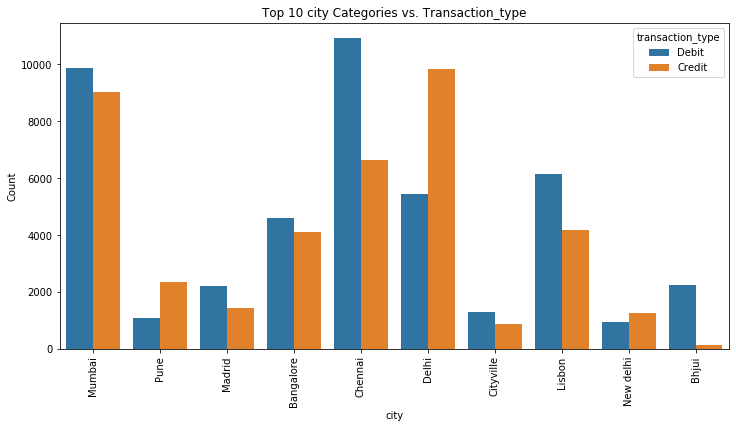

In [139]:
# Grouped Bar Plot
# Get the top 10 most frequent 'city' categories
a = savings_accounts['city'].value_counts().iloc[0:10].index

# Filter the DataFrame to include only the top 10 'state' categories
df_top_10 = savings_accounts[savings_accounts['city'].isin(a)]

# Create the countplot
plt.figure(figsize=(12, 6))
sns.countplot(data=df_top_10, x='city', hue='transaction_type')
plt.title("Top 10 city Categories vs. Transaction_type")
plt.xlabel("city")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.legend(title='transaction_type', loc='upper right')
plt.show()

In [140]:
# Create a contingency table of 'transaction_type' and 'city'
savings_accounts1=savings_accounts.dropna(subset=['transaction_type', 'city'])

contingency_table = pd.crosstab(savings_accounts1['transaction_type'], savings_accounts1['city'])

# Perform chi-square test of independence
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-Square Test of Independence Results:")
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p_value}")

Chi-Square Test of Independence Results:
Chi-Square Statistic: 17531.238097007525
P-Value: 0.0


Based on the Chi-Square Test of Independence results, we can conclude that there is a statistically significant relationship between transaction type and city.

## Transaction_type and Street

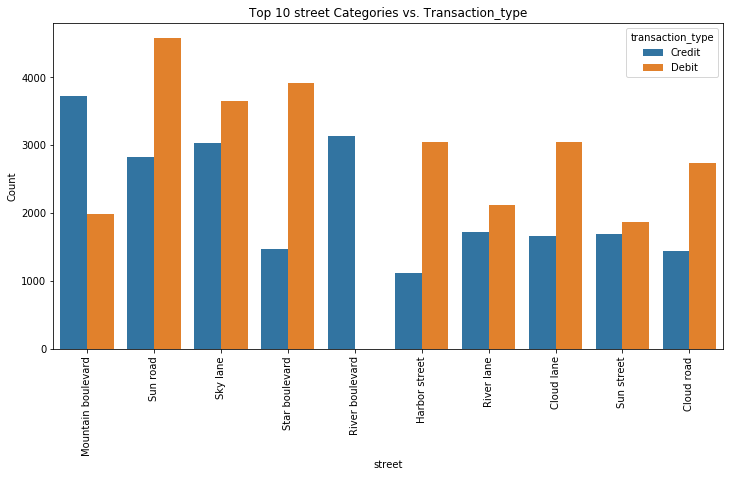

In [141]:
# Grouped Bar Plot
# Get the top 10 most frequent 'street' categories
a = savings_accounts['street'].value_counts().iloc[0:10].index

# Filter the DataFrame to include only the top 10 'state' categories
df_top_10 = savings_accounts[savings_accounts['street'].isin(a)]

# Create the countplot
plt.figure(figsize=(12, 6))
sns.countplot(data=df_top_10, x='street', hue='transaction_type')
plt.title("Top 10 street Categories vs. Transaction_type")
plt.xlabel("street")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.legend(title='transaction_type', loc='upper right')
plt.show()

In [142]:
# Create a contingency table of 'transaction_type' and 'street'
savings_accounts1=savings_accounts.dropna(subset=['transaction_type', 'street'])

contingency_table = pd.crosstab(savings_accounts1['transaction_type'], savings_accounts1['street'])

# Perform chi-square test of independence
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-Square Test of Independence Results:")
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p_value}")

Chi-Square Test of Independence Results:
Chi-Square Statistic: 31848.315508843032
P-Value: 0.0


Based on the Chi-Square Test of Independence results, we can conclude that there is a statistically significant relationship between transaction type and street.

## Transaction_type and time_category

the crosstab is:
 time_category       Day  Night
transaction_type              
Credit            17297  33741
Debit             16921  34315


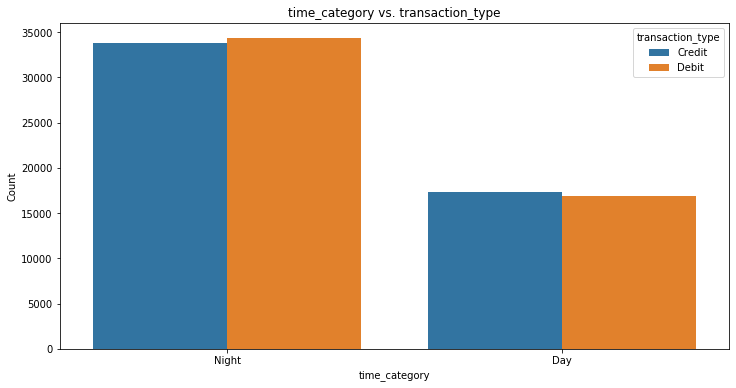

In [143]:
# Tabulation
tab = pd.crosstab(savings_accounts['transaction_type'], savings_accounts['time_category'])
print('the crosstab is:\n',tab)


# Create the countplot
plt.figure(figsize=(12, 6))
sns.countplot(data=savings_accounts, x='time_category', hue='transaction_type')
plt.title("time_category vs. transaction_type")
plt.xlabel("time_category")
plt.ylabel("Count")
plt.legend(title='transaction_type', loc='upper right')
plt.show()

In [144]:
# Create a contingency table of 'transaction_type' and 'street'
savings_accounts1=savings_accounts.dropna(subset=['transaction_type', 'time_category'])

contingency_table = pd.crosstab(savings_accounts1['transaction_type'], savings_accounts1['time_category'])

# Perform chi-square test of independence
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-Square Test of Independence Results:")
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p_value}")

Chi-Square Test of Independence Results:
Chi-Square Statistic: 8.55078255105402
P-Value: 0.0034537372352871987


Based on the Chi-Square Test of Independence results, we can conclude that there is a statistically significant relationship between transaction type and time.

Debit transactions are happening more in night and credit transactions are happening more in the day time

## Transaction_amount and Age


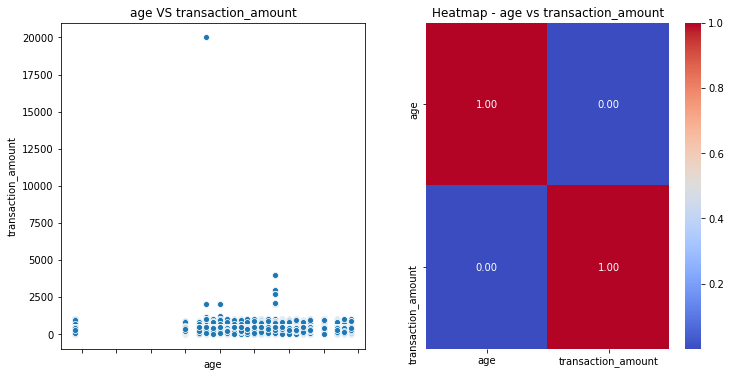

In [145]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Countplot using seaborn
sns.scatterplot(x=savings_accounts['age'],y=savings_accounts['transaction_amount'],ax=axes[0])
axes[0].set_xlabel('age')
axes[0].set_ylabel('transaction_amount')
axes[0].set_title('age VS transaction_amount')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90, ha='right')

# heatmap
sns.heatmap(savings_accounts[['age', 'transaction_amount']].corr(), annot=True, fmt=".2f", cmap='coolwarm',ax=axes[1])

# Set plot title
plt.title("Heatmap - age vs transaction_amount")


# Display the plot
plt.show()

In [146]:
relationship=savings_accounts.dropna()

correlation, p_value = pearsonr(relationship['age'], relationship['transaction_amount'])
print("Pearson's correlation coefficient:", correlation)
print("p-value:", p_value)

Pearson's correlation coefficient: 0.04189809175156103
p-value: 0.2537004887234755


The p value is more than the optimal value of 0.05 which indicates there is no relationship between age and transaction ammount

# Savings Account Analysis Summary Report

### Distribution of Accounts and Customers:
     
Total Customers: 656

Gender Distribution:

Male: 338

Female: 311

Other: 2

Majority of customers have 1 saving account, with 19 customers having more than one saving account.

Number of Accounts by Gender:

Female: 3

Male: 16

### Transactions:

On an average most of the accounts are making 148 transaction and some accounts are making more than 800 transaction counts.

Debit transactions (51,236) outnumber credit transactions (51,038).

Higher age individuals tend to do more credit transactions, while younger individuals tend to do more debit transactions.

Top Transaction Categories: Entertainment, Food, Loan

Top States: Maharashtra, Tamil Nadu, Delhi

Top Cities: Mumbai, Chennai, Delhi

Streets like "Sun road," "Sky lane," have high transaction volumes.

### Total Transaction Amount:

Credit: $13,983,596.85

Debit: $14,064,614.08

Transaction Amount by Category: Bills, entertainment, and food have highest amounts.

Transaction Amount by State, City, and Street: Varies across different locations.

Transaction Amount by Time of Day: Higher transaction amounts during night.

### Relationship Analysis:

Age and Transaction Type: Higher age correlates with more credit transactions. Younger individuals tend to do more debit transactions.

Gender and Transaction Type: Female customers tend to do more credit transactions, while male customers tend to do more debit transactions.

Transaction Type and Location: Transaction types vary across states, cities, and streets.

Time of Day and Transaction Type: Debit transactions are more during night, while credit transactions are more during day.

### Insights:

Transactional Patterns: Entertainment, food, and loan transactions are prominent.

Demographic Trends: Age and gender influence transaction behavior.

Location Impact: Transaction volumes vary across states, cities, and streets, indicating localized economic activity.

Temporal Trends: Transaction amounts fluctuate based on time of day, suggesting differing consumer behavior patterns.

In [147]:
savings_accounts.head()

,id,customer_id,account_number,transaction_id,transaction_amount,transaction_type,remaining_balance,transaction_time,recipient,narratives,transaction_category,gender,age,state,city,street,account_status,creation_date,block_reason,month,hour,time_category
0,1,13692070,13692070001,03369af75207445f,1000.0,Credit,1000.0,2024-02-01 18:56:54,13692070001,food,NaN,Female,33.0,Assam,Xyz,Abcdefg,ACTIVE,2024-02-01,NaN,2,18,Night
1,2,13692070,13692070001,58eae63e3f1f4119,2000.0,Debit,1000.0,2024-02-01 18:57:25,13692070001,food,NaN,Female,33.0,Assam,Xyz,Abcdefg,ACTIVE,2024-02-01,NaN,2,18,Night
2,3,13692070,13692070001,ec09d624496e4f6c,2000.0,Debit,1000.0,2024-02-01 18:57:29,13692070001,food,NaN,Female,33.0,Assam,Xyz,Abcdefg,ACTIVE,2024-02-01,NaN,2,18,Night
3,4,13692070,13692070001,2e9dd265e7e64e44,2000.0,Debit,1000.0,2024-02-01 18:59:58,13692070001,food,NaN,Female,33.0,Assam,Xyz,Abcdefg,ACTIVE,2024-02-01,NaN,2,18,Night
4,5,13692070,13692070001,76d9f3daa9444fc2,2000.0,Debit,1000.0,2024-02-01 19:00:05,13692070001,food,NaN,Female,33.0,Assam,Xyz,Abcdefg,ACTIVE,2024-02-01,NaN,2,19,Night


In [148]:
savings_accounts['account_status'].value_counts()

ACTIVE           102180
DEBITBLOCKED         65
CLOSED                7
CREDITBLOCKED         6
Name: account_status, dtype: int64

# DEBITBLOCKED

In [149]:
debitblocked=savings_accounts[savings_accounts['account_status']=='DEBITBLOCKED']

In [150]:
debitblocked=debitblocked.sort_values(by='transaction_time', ascending=True)

In [151]:
debitblocked

,id,customer_id,account_number,transaction_id,transaction_amount,transaction_type,remaining_balance,transaction_time,recipient,narratives,transaction_category,gender,age,state,city,street,account_status,creation_date,block_reason,month,hour,time_category
1201,1202,48999838,48999838007,dfd180bef0a542bf,72.85,Credit,100072.85,2024-03-19 16:10:08,16099568001,Dummy Transaction #97,recharge,Male,33.0,Punjab,Hjn,Gtyh,DEBITBLOCKED,2024-03-01 09:56:22,Problem Solved,3,16,Day
3405,3406,48999838,48999838007,13ebe72571924561,157.75,Credit,100230.60,2024-03-19 16:13:37,36842029001,Dummy Transaction #93,entertainment,Male,33.0,Punjab,Hjn,Gtyh,DEBITBLOCKED,2024-03-01 09:56:22,Problem Solved,3,16,Day
3842,3843,48999838,48999838007,b2513ff96cc443fa,751.57,Credit,100982.17,2024-03-19 16:14:24,68271155002,Dummy Transaction #63,entertainment,Male,33.0,Punjab,Hjn,Gtyh,DEBITBLOCKED,2024-03-01 09:56:22,Problem Solved,3,16,Day
4216,4217,48999838,48999838007,b82055047fa8413d,860.50,Credit,101842.67,2024-03-19 16:14:56,79312025002,Dummy Transaction #22,loan,Male,33.0,Punjab,Hjn,Gtyh,DEBITBLOCKED,2024-03-01 09:56:22,Problem Solved,3,16,Day
4381,4382,48999838,48999838007,bb2c7681143c4ec5,844.75,Credit,102687.42,2024-03-19 16:15:11,14744772001,Dummy Transaction #86,food,Male,33.0,Punjab,Hjn,Gtyh,DEBITBLOCKED,2024-03-01 09:56:22,Problem Solved,3,16,Day
4451,4452,48999838,48999838007,f77e2aef4b5f457f,248.03,Credit,102935.45,2024-03-19 16:15:21,42872488001,Dummy Transaction #2,travel,Male,33.0,Punjab,Hjn,Gtyh,DEBITBLOCKED,2024-03-01 09:56:22,Problem Solved,3,16,Day
7281,7282,48999838,48999838007,9f07f76865fa42c6,932.50,Credit,103867.95,2024-03-19 16:19:33,88168818001,Dummy Transaction #20,bills,Male,33.0,Punjab,Hjn,Gtyh,DEBITBLOCKED,2024-03-01 09:56:22,Problem Solved,3,16,Day
7511,7512,48999838,48999838007,245a9cb631c24923,882.70,Credit,104750.65,2024-03-19 16:19:52,30919137001,Dummy Transaction #29,travel,Male,33.0,Punjab,Hjn,Gtyh,DEBITBLOCKED,2024-03-01 09:56:22,Problem Solved,3,16,Day
9860,9861,48999838,48999838007,f9bb556b1f104d9f,515.21,Credit,105265.86,2024-03-19 16:23:30,34784859002,Dummy Transaction #93,bills,Male,33.0,Punjab,Hjn,Gtyh,DEBITBLOCKED,2024-03-01 09:56:22,Problem Solved,3,16,Day
12014,12015,48999838,48999838007,d9452f2dab144d36,419.79,Credit,105685.65,2024-03-19 16:33:39,40834667002,Dummy Transaction #54,loan,Male,33.0,Punjab,Hjn,Gtyh,DEBITBLOCKED,2024-03-01 09:56:22,Problem Solved,3,16,Day


The account number 48999838007 has been debit blocked, likely due to the customer reporting a lost debit card. This assumption is supported by the ongoing credit transactions while debit transactions have ceased. It's a common security measure for banks to block debit cards upon customer request in such cases to prevent unauthorized use.

# CLOSED                

In [152]:
closed=savings_accounts[savings_accounts['account_status']=='CLOSED']

In [153]:
closed=closed.sort_values(by='transaction_time', ascending=True)

In [154]:
closed

,id,customer_id,account_number,transaction_id,transaction_amount,transaction_type,remaining_balance,transaction_time,recipient,narratives,transaction_category,gender,age,state,city,street,account_status,creation_date,block_reason,month,hour,time_category
146,147,48999838,48999838003,567b8b2afca947be,2000.00,Credit,2114.59,2024-03-01 00:30:18,48999838004,Transfer remaing balance of account number 489...,miscellaneous,Male,33.0,Punjab,Hjn,Gtyh,CLOSED,2024-02-29 22:54:47,NaN,3,0,Night
147,148,48999838,48999838003,d0b6a5a271d4444f,2114.59,Debit,0.00,2024-03-01 00:35:28,48999838004,Transfer remaing balance of account number 489...,miscellaneous,Male,33.0,Punjab,Hjn,Gtyh,CLOSED,2024-02-29 22:54:47,NaN,3,0,Night
150,151,48999838,48999838003,2db4f675d6634586,2690.00,Credit,2690.00,2024-03-01 00:40:10,48999838001,Transfer remaing balance of account number 489...,miscellaneous,Male,33.0,Punjab,Hjn,Gtyh,CLOSED,2024-02-29 22:54:47,NaN,3,0,Night
151,152,48999838,48999838003,27cd54307af5469f,2690.00,Debit,0.00,2024-03-01 00:43:16,48999838001,Transfer remaing balance of account number 489...,miscellaneous,Male,33.0,Punjab,Hjn,Gtyh,CLOSED,2024-02-29 22:54:47,NaN,3,0,Night
164,165,86985544,86985544002,2044abef5fce4c0f,10.20,Credit,10.20,2024-03-01 15:24:08,86985544001,transfer for loan,loan,Male,34.0,Maharashtra,Pune,Test street,CLOSED,2024-03-01 15:10:41,NaN,3,15,Day
166,167,86985544,86985544002,d18e7dc0641a46ee,10.20,Credit,20.40,2024-03-01 15:25:43,86985544001,transfer for loan,loan,Male,34.0,Maharashtra,Pune,Test street,CLOSED,2024-03-01 15:10:41,NaN,3,15,Day
169,170,86985544,86985544002,128c671c27c145eb,20.40,Debit,0.00,2024-03-01 15:43:21,86985544001,Transfer remaing balance of account number 869...,miscellaneous,Male,34.0,Maharashtra,Pune,Test street,CLOSED,2024-03-01 15:10:41,NaN,3,15,Day


The accounts associated with numbers 48999838003 and 86985544002 have been closed, likely due to the customers' departure from the bank. This conclusion is supported by the observation that the account balances have been completely debited. When customers close their accounts, it's common practice for them to withdraw any remaining funds. Therefore, based on the absence of funds in these accounts and the closure, it can be inferred that the customers have indeed left the bank.

# CREDITBLOCKED         

In [155]:
creditblocked=savings_accounts[savings_accounts['account_status']=='CREDITBLOCKED']         

In [156]:
creditblocked=creditblocked.sort_values(by='transaction_time', ascending=True)

In [157]:
creditblocked

,id,customer_id,account_number,transaction_id,transaction_amount,transaction_type,remaining_balance,transaction_time,recipient,narratives,transaction_category,gender,age,state,city,street,account_status,creation_date,block_reason,month,hour,time_category
161,162,86985544,86985544001,53bd1b46c61f4f36,189.80,Credit,189.80,2024-03-01 15:18:11,86985544001,initial deposit,NaN,Male,34.0,Maharashtra,Pune,Test street,CREDITBLOCKED,2024-03-01 15:10:38,credit blocking,3,15,Day
162,163,86985544,86985544001,5cd8655438f64f34,19.80,Debit,170.00,2024-03-01 15:19:01,86985544001,deduct charges,NaN,Male,34.0,Maharashtra,Pune,Test street,CREDITBLOCKED,2024-03-01 15:10:38,credit blocking,3,15,Day
163,164,86985544,86985544001,2044abef5fce4c0f,10.20,Debit,159.80,2024-03-01 15:24:08,86985544002,transfer for loan,loan,Male,34.0,Maharashtra,Pune,Test street,CREDITBLOCKED,2024-03-01 15:10:38,credit blocking,3,15,Day
165,166,86985544,86985544001,d18e7dc0641a46ee,10.20,Debit,149.60,2024-03-01 15:25:43,86985544002,transfer for loan,loan,Male,34.0,Maharashtra,Pune,Test street,CREDITBLOCKED,2024-03-01 15:10:38,credit blocking,3,15,Day
167,168,86985544,86985544001,9da5ab57801c4824,10.98,Debit,138.62,2024-03-01 15:28:16,10203042001,test amount,entertainment,Male,34.0,Maharashtra,Pune,Test street,CREDITBLOCKED,2024-03-01 15:10:38,credit blocking,3,15,Day
170,171,86985544,86985544001,128c671c27c145eb,20.40,Credit,159.02,2024-03-01 15:43:21,86985544002,Transfer remaing balance of account number 869...,miscellaneous,Male,34.0,Maharashtra,Pune,Test street,CREDITBLOCKED,2024-03-01 15:10:38,credit blocking,3,15,Day


The account number 86985544001 being creditblocked, the frequent transactions, particularly those involving transfers for a loan and the test amount transaction, could have raised suspicion and led the bank to block credit on the account until further investigation can be conducted to ensure the account's security and integrity.

# CHECKING WHETHER ALL SAVINGS ACCOUNT MADE TRANSACTIONS

In [158]:
test=pd.read_csv("Accounts 2.csv")

In [159]:
saving= test[test['account_type'].str.upper() == 'SAVINGS']

In [160]:
saving['account_number'].nunique()

744

#### Total saving accounts in the bank are 744

In [161]:
test_trans=pd.read_csv('Savings_Transaction 2.csv')

In [162]:
test_trans['account_number'].nunique()

687

#### Total Saving accounts which made transactions are 687 and 57 accounts haven't made any transactions

In [163]:
test = pd.merge(saving,test_trans, on='account_number', how='left')

In [164]:
test['account_number'].nunique()

744

In [165]:
filtered_test = test[test['transaction_id'].isnull()]


In [166]:
filtered_test['account_number'].nunique()

61

In [167]:
filtered_test

,customer_id_x,account_number,account_type,account_status,currency,overdraft,creation_date,total_balance,block_reason,id,customer_id_y,transaction_id,transaction_amount,transaction_type,remaining_balance,transaction_time,recipient,narratives,transaction_category
337,10203042,10203042008,savings,ACTIVE,INR,NO,2024-03-19 15:20:46,100000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
407,10649812,10649812003,savings,ACTIVE,INR,NO,2024-03-19 15:20:46,100000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
472,10892188,10892188003,savings,ACTIVE,INR,NO,2024-03-19 15:20:46,100000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
556,10894585,10894585003,savings,ACTIVE,INR,NO,2024-03-19 15:20:46,100000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
629,10937950,10937950003,savings,ACTIVE,INR,NO,2024-03-19 15:20:46,100000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1935,11497628,11497628003,savings,ACTIVE,INR,NO,2024-03-19 15:20:46,100000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992,11807791,11807791003,savings,ACTIVE,INR,NO,2024-03-19 15:20:47,100000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2068,12078272,12078272003,savings,ACTIVE,INR,NO,2024-03-19 15:20:47,100000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2143,12223498,12223498003,savings,ACTIVE,INR,NO,2024-03-19 15:20:47,100000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2870,12827102,12827102003,savings,ACTIVE,INR,NO,2024-03-19 15:20:47,100000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


many accounts are created on the latest date of the dataset which are yet to do transactions. 

'76500869001' account was closed and '48999838006' account is blocked and '58694723001' account is Credit blocked.

### 4 extra account transactions are there in the dataset which has to be analysed further

In [168]:
test = pd.merge(test_trans,saving, on='account_number', how='left')

In [169]:
test['account_number'].nunique()

687

In [170]:
test.head(2)

,id,customer_id_x,account_number,transaction_id,transaction_amount,transaction_type,remaining_balance,transaction_time,recipient,narratives,transaction_category,customer_id_y,account_type,account_status,currency,overdraft,creation_date,total_balance,block_reason
0,1,13692070,13692070001,03369af75207445f,1000.0,Credit,1000.0,2024-02-01 18:56:54,13692070001,food,NaN,13692070.0,SAVINGS,ACTIVE,INR,NO,2024-02-01 00:00:00,124119.14,NaN
1,2,13692070,13692070001,58eae63e3f1f4119,2000.0,Debit,1000.0,2024-02-01 18:57:25,13692070001,food,NaN,13692070.0,SAVINGS,ACTIVE,INR,NO,2024-02-01 00:00:00,124119.14,NaN


In [171]:
filtered_test = test[test['customer_id_y'].isnull()]


In [172]:
filtered_test['account_number'].nunique()

4

In [173]:
filtered_test

,id,customer_id_x,account_number,transaction_id,transaction_amount,transaction_type,remaining_balance,transaction_time,recipient,narratives,transaction_category,customer_id_y,account_type,account_status,currency,overdraft,creation_date,total_balance,block_reason
108,109,38208481,38208481001,4c362ef6bbb1466c,5000.0,Credit,5000.0,2024-02-29 04:30:10,38208481001,Teller Payment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109,110,38208481,38208481001,247cf5466d194180,6000.0,Debit,5000.0,2024-02-29 04:30:29,38208481001,Teller Payment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112,113,72050229,72050229001,19102737f03148ed,1000.0,Credit,1000.0,2024-02-29 06:25:06,72050229001,Cash Deposit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113,114,24455838,24455838001,26bf9367fc0b4dce,10000.0,Credit,10000.0,2024-02-29 09:10:06,24455838001,Cash deposit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114,115,33212811,33212811002,61830dfb61954870,100.0,Debit,0.0,2024-02-29 09:27:45,33212811002,Cash Debit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115,116,33212811,33212811002,1c3ff2227d364689,1099.0,Credit,1099.0,2024-02-29 09:28:03,33212811002,Cash Debit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116,117,33212811,33212811002,1834d794417445a7,2000.0,Debit,1099.0,2024-02-29 09:29:36,33212811002,Cash Debit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118,119,33212811,33212811002,1e79c34b1ef945d7,2999.0,Debit,1099.0,2024-02-29 09:55:24,33212811002,Cash Debit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,120,33212811,33212811002,6e12d4d96bb8413c,2999.0,Credit,4098.0,2024-02-29 09:55:28,33212811002,Cash Debit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,121,33212811,33212811002,8f5d06b11ba3459d,200.0,Debit,3898.0,2024-02-29 10:21:56,12345678000,Testing transaction,loan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In banking systems, a temporary account number may indeed be generated for certain transactions, such as teller payments and test transaction. This have created 4 new accounts in the bank

# Loading Dataset-Current Account

In [174]:
current = accounts[accounts['account_type'] == 'CURRENT']

In [175]:
df5=pd.read_csv('Current_transactions 2.csv')

In [176]:
# Merge df5 with savings DataFrame
current_accounts = pd.merge(df5, current[['gender', 'age', 'state', 'city', 'street', 'account_number', 'account_status', 'creation_date', 'block_reason']], on='account_number', how='left')


In [177]:
current_accounts.head()

,id,customer_id,account_number,transaction_id,transaction_amount,transaction_type,remaining_balance,transaction_time,recipient,narratives,transaction_category,gender,age,state,city,street,account_status,creation_date,block_reason
0,16,75047394,12345678012,d3a71a23fddf4481,2845.0,Debit,122334.0,2024-02-19 15:51:28,75047394001,sdafdgrtfhj,food,Male,23.0,Maharashtra,Mumbai,Shivaji,ACTIVE,NaT,Problem Solved
1,17,75047394,12345678012,e434a0bb1e1844b6,300.0,Debit,122334.0,2024-02-19 15:51:40,75047394001,zxscdvf,fuel,Male,23.0,Maharashtra,Mumbai,Shivaji,ACTIVE,NaT,Problem Solved
2,18,48590643,12345678012,285edb14c3be4456,1000.0,Debit,0.0,2024-02-15 17:00:46,48590643001,Debit,food,Male,23.0,Maharashtra,Mumbai,Shivaji,ACTIVE,NaT,Problem Solved
3,19,48590643,12345678012,0e2b08227286414c,1000.0,Debit,1000.0,2024-02-19 17:01:00,48590643001,Credit,bills,Male,23.0,Maharashtra,Mumbai,Shivaji,ACTIVE,NaT,Problem Solved
4,20,95044155,12345678012,d6bb45829e4746f5,300.0,Debit,5030.0,2024-02-09 14:18:14,12345678001,Food,food,Male,23.0,Maharashtra,Mumbai,Shivaji,ACTIVE,NaT,Problem Solved


# Checking for Duplicates and Null Values

In [178]:
duplicates=current_accounts.duplicated()
if any(duplicates):
    print("There are duplicates present")
else:
    print("There are no duplicates")

There are no duplicates


In [179]:
result_data = []

for column in current_accounts.columns:
    null_count = current_accounts[column].isnull().sum()
    if null_count > 0:
        result_data.append({'Column Name': column, 'Null Count': null_count})
        

if any(result_data):
    result_df = pd.DataFrame(result_data)
    print(result_df)
else:
    print("There are no null values in the dataset")


            Column Name  Null Count
0  transaction_category           6
1                 state         799
2                  city         799
3                street         799
4         creation_date          83
5          block_reason      100100


# Checking the datatypes

In [180]:
Datatypes=[]
for column in current_accounts.columns:
    Datatypes.append({'Column Name':column,'Data tye':current_accounts[column].dtype})

Datatypes=pd.DataFrame(Datatypes)
Datatypes

,Column Name,Data tye
0,id,int64
1,customer_id,int64
2,account_number,int64
3,transaction_id,object
4,transaction_amount,float64
5,transaction_type,object
6,remaining_balance,float64
7,transaction_time,object
8,recipient,int64
9,narratives,object


In [181]:
# Convert 'date_of_birth' to datetime
current_accounts['transaction_time'] = pd.to_datetime(current_accounts['transaction_time'])

# Data Visualisation

## Transaction_type

In [182]:
current_accounts['transaction_type'].value_counts()

Credit    50264
Debit     50069
Name: transaction_type, dtype: int64

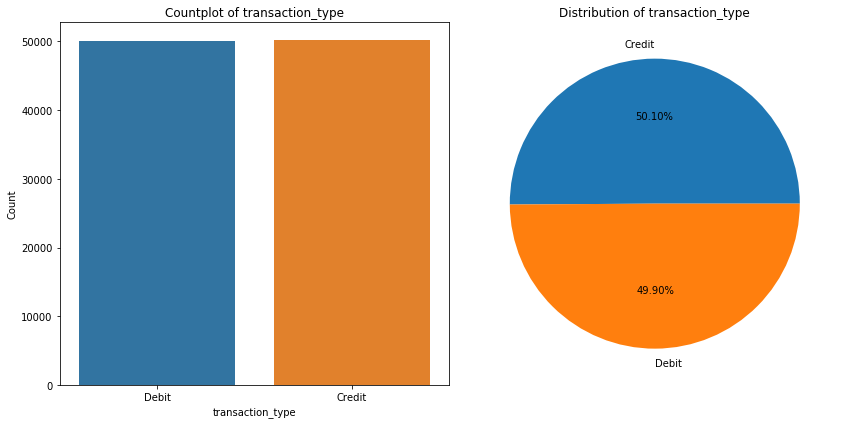

In [183]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Countplot using seaborn
sns.countplot(x='transaction_type', data=current_accounts, ax=axes[0])
axes[0].set_xlabel('transaction_type')
axes[0].set_ylabel('Count')
axes[0].set_title('Countplot of transaction_type')

# Pie chart using pandas plot
current_accounts['transaction_type'].value_counts().plot(kind='pie', autopct='%.2f%%', ax=axes[1])
axes[1].set_title('Distribution of transaction_type')
axes[1].set_ylabel('')

# Adjust layout
plt.tight_layout()

# Display the subplots
plt.show()

The majority of transactions in the dataset are credit transactions, with a count of 50,264, compared to 50069 debit transactions.

## Transaction_category

In [184]:
current_accounts['transaction_category'].value_counts()

food             11427
fuel             11272
entertainment    11205
travel           11203
miscellaneous    11142
shopping         11140
recharge         11070
loan             10980
bills            10888
Name: transaction_category, dtype: int64

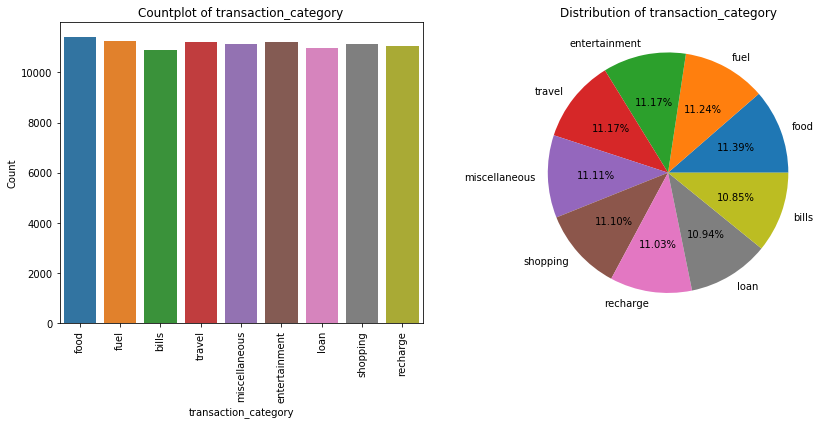

In [185]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Countplot using seaborn
sns.countplot(x='transaction_category', data=current_accounts, ax=axes[0])
axes[0].set_xlabel('transaction_category')
axes[0].set_ylabel('Count')
axes[0].set_title('Countplot of transaction_category')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)  # Rotate x-labels

# Pie chart using pandas plot
current_accounts['transaction_category'].value_counts().plot(kind='pie', autopct='%.2f%%', ax=axes[1])
axes[1].set_title('Distribution of transaction_category')
axes[1].set_ylabel('')

# Adjust layout
plt.tight_layout()

# Display the subplots
plt.show()

From the transaction counts, it appears that food transactions have the highest frequency, followed closely by fuel transactions. This could indicate that these are essential expenses for individuals. On the other hand, categories like loan and bills have lower transaction counts, suggesting they are less frequent or perhaps larger, periodic expenses.

## Gender

In [186]:
current_accounts['gender'].value_counts()

Male      57817
Female    42375
Other       141
Name: gender, dtype: int64

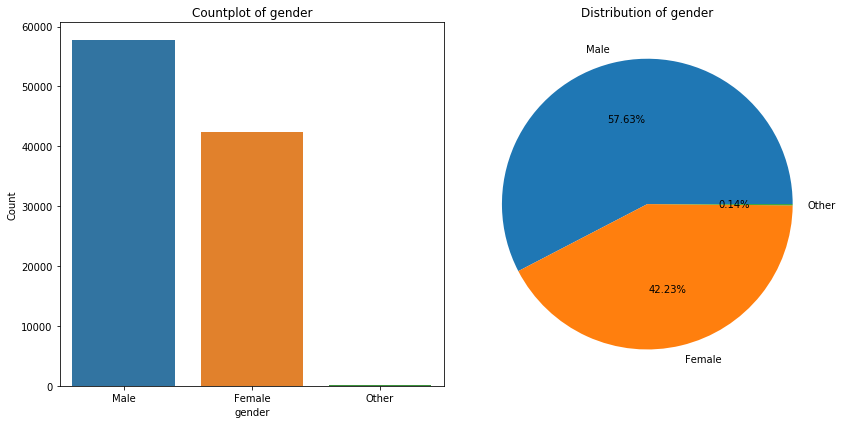

In [187]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Countplot using seaborn
sns.countplot(x='gender', data=current_accounts, ax=axes[0])
axes[0].set_xlabel('gender')
axes[0].set_ylabel('Count')
axes[0].set_title('Countplot of gender')

# Pie chart using pandas plot
current_accounts['gender'].value_counts().plot(kind='pie', autopct='%.2f%%', ax=axes[1])
axes[1].set_title('Distribution of gender')
axes[1].set_ylabel('')

# Adjust layout
plt.tight_layout()

# Display the subplots
plt.show()

The data suggests that males have a higher number of transactions compared to females, with a significant difference between the two. The "Other" category, which likely represents non-binary or unspecified gender identities, has a much lower transaction count compared to males and females.

## State

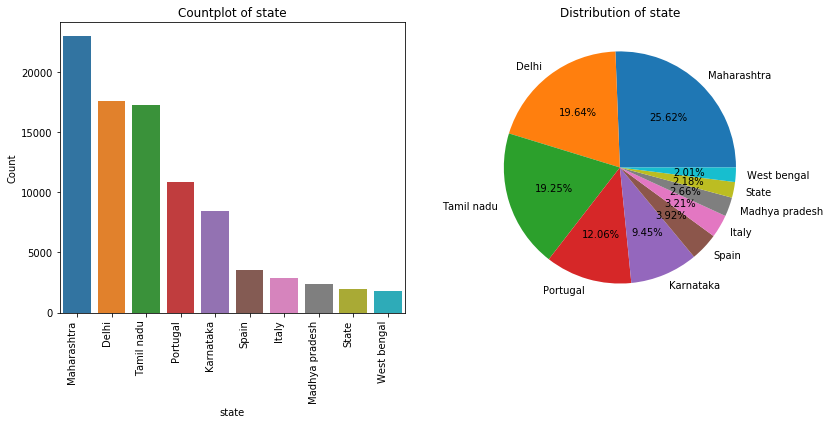

In [188]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Countplot using seaborn
top_10_state = current_accounts['state'].value_counts().sort_values(ascending=False).index[:10]
sns.countplot(x='state', data=current_accounts, order=top_10_state, ax=axes[0])
axes[0].set_xlabel('state')
axes[0].set_ylabel('Count')
axes[0].set_title('Countplot of state')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90, ha='right')

# Pie chart using pandas plot
current_accounts['state'].value_counts().iloc[:10].plot(kind='pie', autopct='%.2f%%', ax=axes[1])
axes[1].set_title('Distribution of state')
axes[1].set_ylabel('')

# Adjust layout
plt.tight_layout()

# Display the subplots
plt.show()

Maharashtra, Delhi, and Tamil Nadu have the highest transaction counts, suggesting higher economic activity or population density in these regions.

Some states outside of India such as Portugal, Spain, Italy, and the United Kingdom are also included, indicating international transactions or possibly data integration issues.

## City

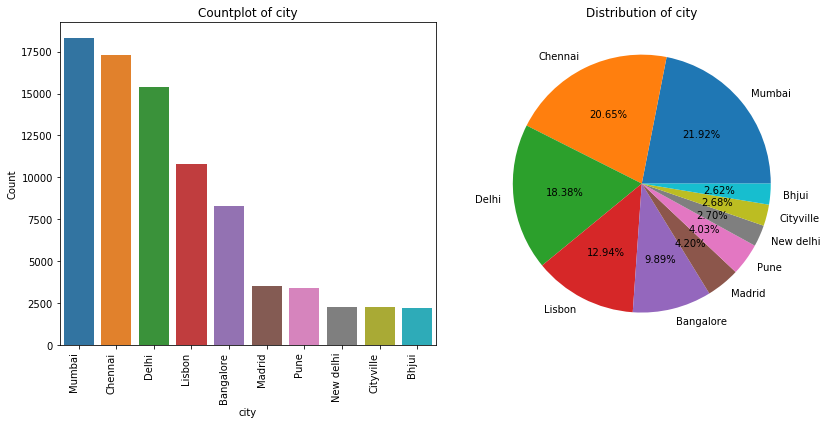

In [189]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Countplot using seaborn
top_10_state = current_accounts['city'].value_counts().sort_values(ascending=False).index[:10]
sns.countplot(x='city', data=current_accounts, order=top_10_state, ax=axes[0])
axes[0].set_xlabel('city')
axes[0].set_ylabel('Count')
axes[0].set_title('Countplot of city')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90, ha='right')

# Pie chart using pandas plot
current_accounts['city'].value_counts().iloc[:10].plot(kind='pie', autopct='%.2f%%', ax=axes[1])
axes[1].set_title('Distribution of city')
axes[1].set_ylabel('')

# Adjust layout
plt.tight_layout()

# Display the subplots
plt.show()

Major metropolitan cities like Mumbai, Chennai, Delhi, and Bangalore have the highest transaction counts, which aligns with their high population and economic activity.

Some cities like Lisbon, Madrid, Milan, London, and New York indicate international transactions or possibly data integration issues.

## Street

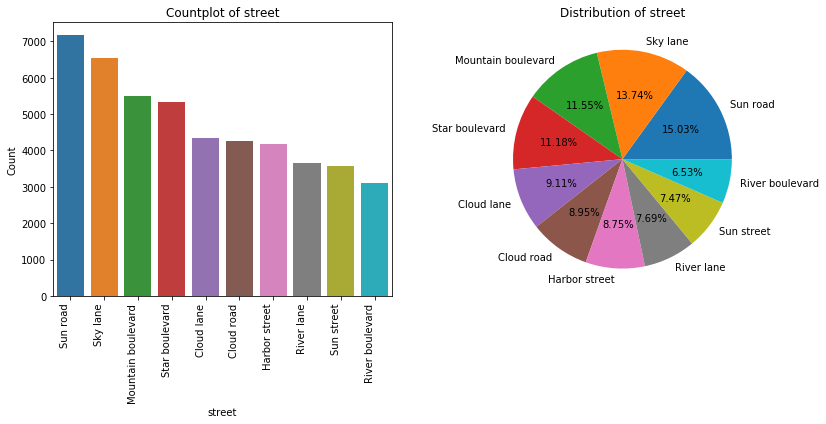

In [190]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Countplot using seaborn
top_10_state = current_accounts['street'].value_counts().sort_values(ascending=False).index[:10]
sns.countplot(x='street', data=current_accounts, order=top_10_state, ax=axes[0])
axes[0].set_xlabel('street')
axes[0].set_ylabel('Count')
axes[0].set_title('Countplot of street')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90, ha='right')

# Pie chart using pandas plot
current_accounts['street'].value_counts().iloc[:10].plot(kind='pie', autopct='%.2f%%', ax=axes[1])
axes[1].set_title('Distribution of street')
axes[1].set_ylabel('')

# Adjust layout
plt.tight_layout()

# Display the subplots
plt.show()

#### Street Popularity:
The data reveals varying transaction counts across different street names. Streets like "Sun Road," "Sky Lane," "Mountain Boulevard," and "Star Boulevard" exhibit higher transaction volumes, indicating significant financial activity in these areas. These streets might be situated in commercial or densely populated urban regions, attracting a large number of transactions.

#### Urban vs. Suburban Areas:
Analysis of street names suggests a distinction between urban and suburban areas. Streets like "Sun Street," "River Lane," and "Forest Avenue" may indicate transactions occurring in suburban or residential localities. Conversely, streets such as "Sun Road," "Sky Lane," and "Mountain Boulevard" likely represent urban or commercial districts, characterized by higher transaction volumes and potentially denser economic activity. This differentiation between urban and suburban streets provides insight into the spatial distribution of financial transactions within the dataset.

## Transaction_time

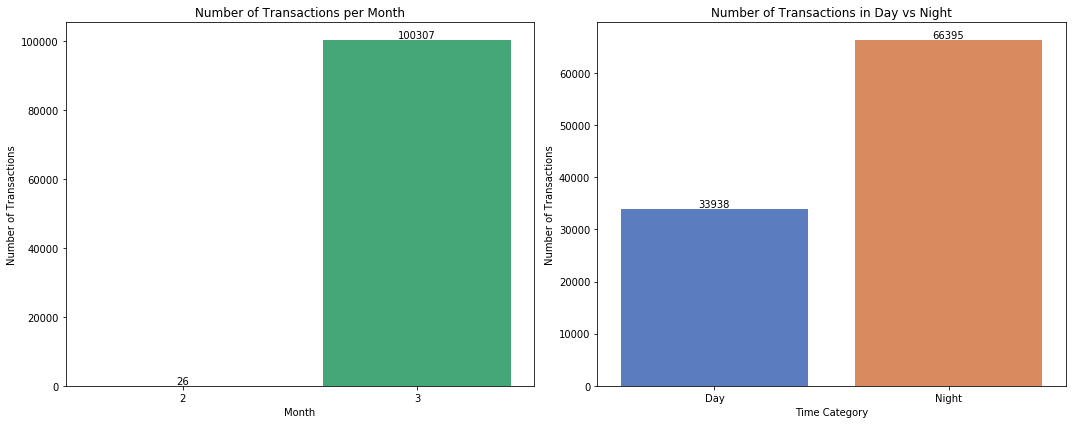

In [191]:
# Convert 'transaction_time' to datetime format
current_accounts['transaction_time'] = pd.to_datetime(current_accounts['transaction_time'])

# Extract month from 'transaction_time'
current_accounts['month'] = current_accounts['transaction_time'].dt.month

# Define a function to categorize transactions into day or night
def categorize_time(hour):
    if 6 <= hour < 18:
        return 'Day'
    else:
        return 'Night'

# Extract hour from 'transaction_time'
current_accounts['hour'] = current_accounts['transaction_time'].dt.hour

# Apply the function to categorize transactions into day or night
current_accounts['time_category'] = current_accounts['hour'].apply(categorize_time)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot the number of transactions in each month
sns.countplot(x='month', data=current_accounts, palette='viridis', ax=axes[0])
axes[0].set_title('Number of Transactions per Month')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Number of Transactions')

# Annotate counts on top of bars for month plot
for p in axes[0].patches:
    axes[0].annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Plot the number of transactions in day and night time
sns.countplot(x='time_category', data=current_accounts, palette='muted', ax=axes[1])
axes[1].set_title('Number of Transactions in Day vs Night')
axes[1].set_xlabel('Time Category')
axes[1].set_ylabel('Number of Transactions')

# Annotate counts on top of bars for day vs night plot
for p in axes[1].patches:
    axes[1].annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

Most of the Transactions are made in March month and also mostly the transactions are made in night than day

# Number of Accounts per customer

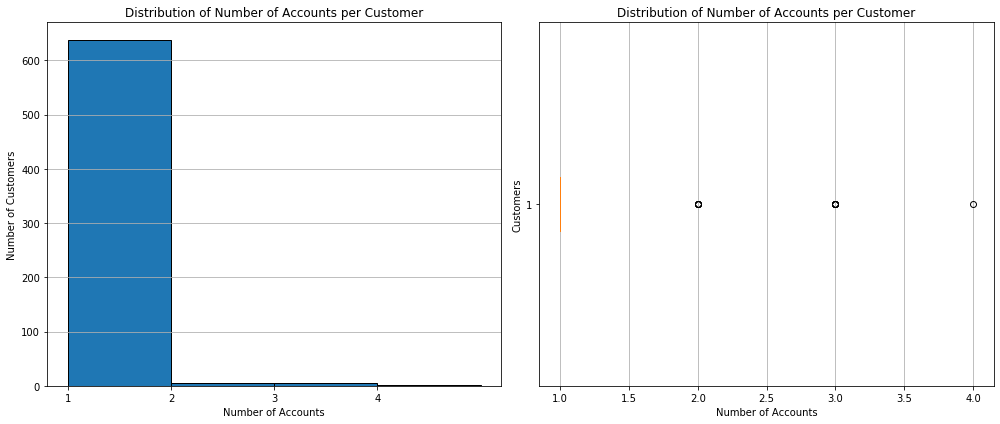

In [192]:
# Group by 'customer_id' and count the number of unique account numbers
accounts_per_customer = current_accounts.groupby('customer_id')['account_number'].nunique()

# Creating subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Histogram
axs[0].hist(accounts_per_customer, bins=range(1, accounts_per_customer.max() + 2), edgecolor='black')
axs[0].set_title('Distribution of Number of Accounts per Customer')
axs[0].set_xlabel('Number of Accounts')
axs[0].set_ylabel('Number of Customers')
axs[0].grid(axis='y')
axs[0].set_xticks(range(1, accounts_per_customer.max() + 1))

# Box plot
axs[1].boxplot(accounts_per_customer, vert=False)
axs[1].set_title('Distribution of Number of Accounts per Customer')
axs[1].set_xlabel('Number of Accounts')
axs[1].set_ylabel('Customers')
axs[1].grid(axis='x')

plt.tight_layout()
plt.show()

In [193]:
# Assuming your transaction dataframe is named 'df'

# Step 1: Drop duplicate customer IDs to ensure each customer is counted only once
unique_customers = current_accounts.drop_duplicates(subset=['customer_id'])

# Step 2: Get the count of unique customers
total_customers = len(unique_customers)

# Step 3: Get the distribution of genders among customers
gender_distribution = unique_customers['gender'].value_counts()

# Step 4: Print the results
print("Total number of customers:", total_customers)
print("Gender distribution among customers:")
print(gender_distribution)


Total number of customers: 650
Gender distribution among customers:
Male      337
Female    311
Other       2
Name: gender, dtype: int64


In [194]:
# Step 1: Group the dataframe by customer_id and count the number of unique account numbers for each customer
customer_account_count = current_accounts.groupby('customer_id')['account_number'].nunique()

# Step 2: Filter customers with more than one account number
customers_with_multiple_accounts = customer_account_count[customer_account_count > 1]

# Step 3: Get the count of customers with multiple accounts
num_customers_with_multiple_accounts = len(customers_with_multiple_accounts)

# Step 4: Print the result
print("Number of customers with more than one account:", num_customers_with_multiple_accounts)

Number of customers with more than one account: 12


In [195]:
# Assuming your transaction dataframe is named 'df'

# Step 1: Group the dataframe by customer_id and count the number of unique account numbers for each customer
customer_account_count = current_accounts.groupby(['customer_id', 'gender'])['account_number'].nunique().reset_index()

# Step 2: Filter customers with more than one account number
customers_with_multiple_accounts = customer_account_count[customer_account_count['account_number'] > 1]

# Step 3: Get the count of customers with multiple accounts across genders
num_customers_with_multiple_accounts = customers_with_multiple_accounts.groupby('gender').size()

# Step 4: Print the result
print("Number of customers with more than one account across genders:")
print(num_customers_with_multiple_accounts)


Number of customers with more than one account across genders:
gender
Female     1
Male      11
dtype: int64


#### Distribution of Number of Accounts per Customer:

Total number of customers: 650

Gender distribution among customers:

Male      337

Female    311

Other       2

The majority of customers seem to have 1 current account.

There are some customers with more than 1 current account.

There are also customers with multiple current accounts, with a maximum of 4 current accounts.

Number of customers with more than one account: 12

Number of customers with more than one account across genders:

Female     1

Male      11

## Average Number of Transactions made

In [246]:
# Group transactions by account number and count the transactions in each group
transaction_counts_per_account = current_accounts.groupby('account_number')['transaction_id'].count()

# Calculate the average transaction count per account
average_transaction_count_per_account = transaction_counts_per_account.mean()

print("Average transaction count per account:", average_transaction_count_per_account)


Average transaction count per account: 150.19910179640718


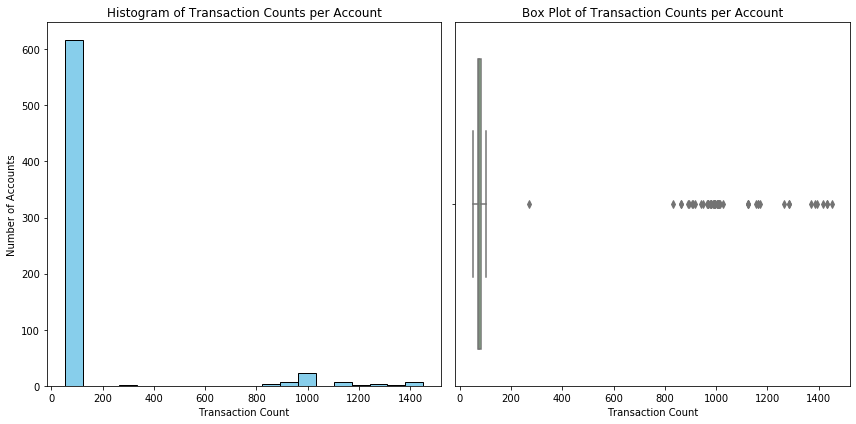

In [253]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histogram
axes[0].hist(transaction_counts_per_account, bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('Histogram of Transaction Counts per Account')
axes[0].set_xlabel('Transaction Count')
axes[0].set_ylabel('Number of Accounts')

# Box plot
sns.boxplot(transaction_counts_per_account, ax=axes[1], color='lightgreen')
axes[1].set_title('Box Plot of Transaction Counts per Account')
axes[1].set_xlabel('Transaction Count')

# Show plots
plt.tight_layout()
plt.show()


On an average each account is making 150 transactions and some accounts are making more than 800 transactions.

## Age and Transaction_type

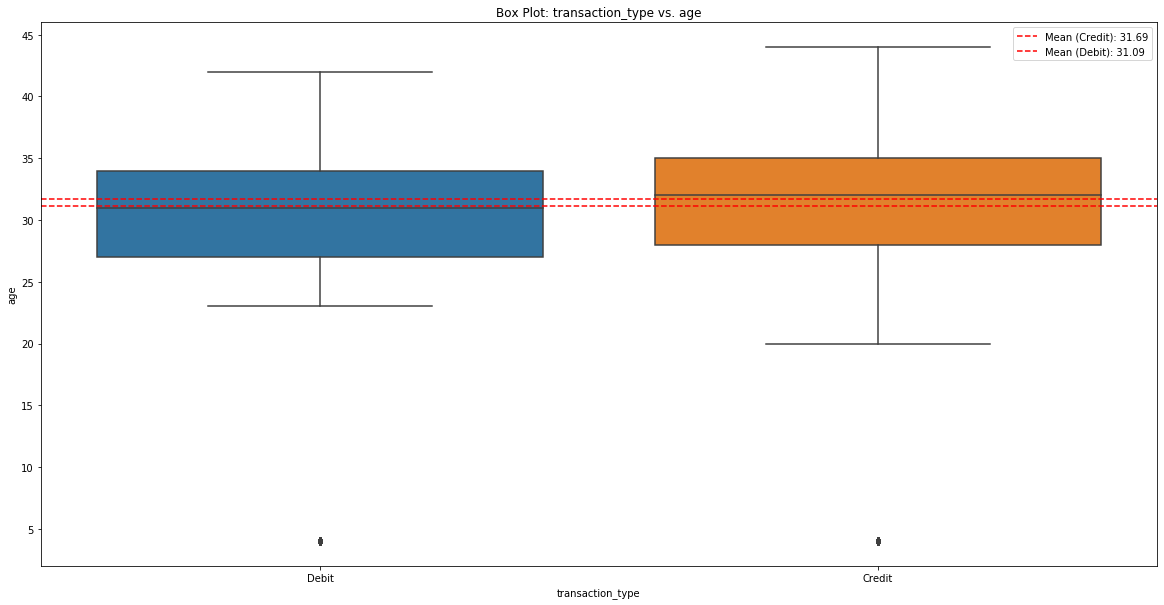

In [196]:
# Set the figure size
plt.figure(figsize=(20, 10))

# Box plot
sns.boxplot(data=current_accounts, x='transaction_type', y='age')

# Add mean lines
means = current_accounts.groupby('transaction_type')['age'].mean()
for transaction_type, mean in means.items():
    plt.axhline(y=mean, color='red', linestyle='--', label=f'Mean ({transaction_type}): {mean:.2f}')

# Set labels and title
plt.xlabel('transaction_type')
plt.ylabel('age')
plt.title('Box Plot: transaction_type vs. age')

# Show legend
plt.legend()

# Display the plot
plt.show()


In [197]:
# Drop any rows with missing values
data = current_accounts[['age', 'transaction_type']].copy()

data.dropna(inplace=True)

# Perform ANOVA
model = ols('age ~ C(transaction_type)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)

                           sum_sq        df           F        PR(>F)
C(transaction_type)  8.883228e+03       1.0  237.809745  1.361143e-53
Residual             3.747799e+06  100331.0         NaN           NaN


The ANOVA test indicates that there is a significant relationship between age and transaction type.

## Transaction_amount and Transaction_type

In [198]:
current_accounts.groupby('transaction_type')['transaction_amount'].skew()

transaction_type
Credit    0.918168
Debit     0.966151
Name: transaction_amount, dtype: float64

In [199]:
kurtosis = current_accounts.groupby('transaction_type')['transaction_amount'].apply(lambda x: x.kurt())
print(kurtosis)


transaction_type
Credit    1.522383
Debit     2.223681
Name: transaction_amount, dtype: float64


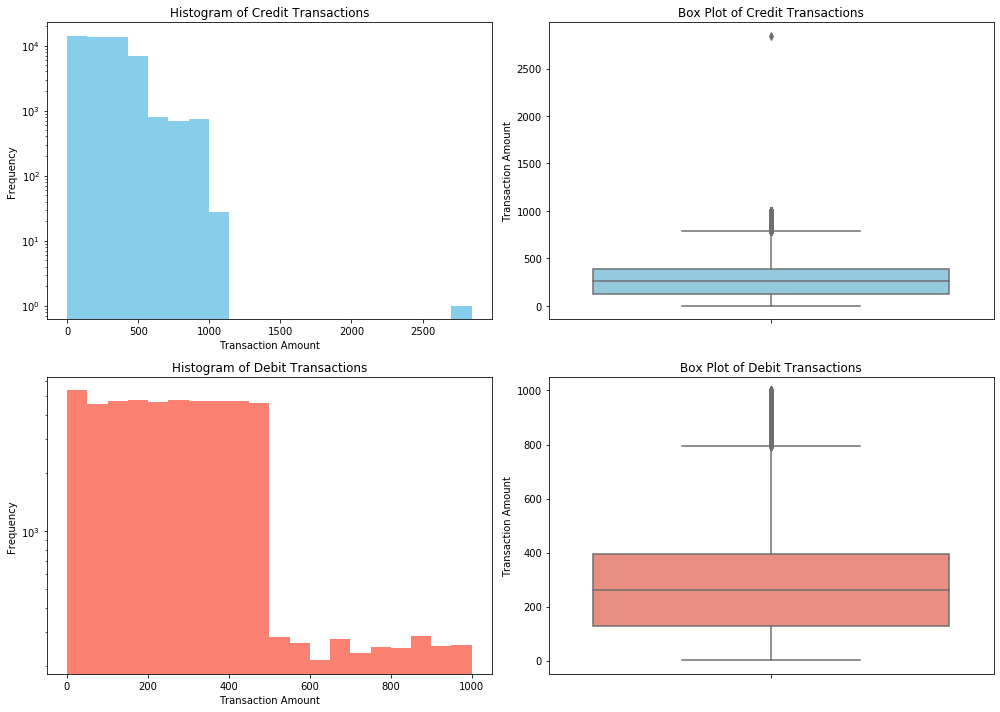

In [200]:
# Filter data for 'credit' and 'debit' transactions
credit_transactions = current_accounts[savings_accounts['transaction_type'] == 'Credit']['transaction_amount']
debit_transactions = current_accounts[savings_accounts['transaction_type'] == 'Debit']['transaction_amount']

# Set up the figure and axes for subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Histogram for credit transactions
axes[0, 0].hist(credit_transactions,bins=20, color='skyblue')
axes[0, 0].set_title('Histogram of Credit Transactions')
axes[0, 0].set_xlabel('Transaction Amount')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_yscale('log')

# Box plot for credit transactions
sns.boxplot(y=credit_transactions, ax=axes[0, 1], color='skyblue')
axes[0, 1].set_title('Box Plot of Credit Transactions')
axes[0, 1].set_ylabel('Transaction Amount')


# Histogram for debit transactions
axes[1, 0].hist(debit_transactions,bins=20,color='salmon')
axes[1, 0].set_title('Histogram of Debit Transactions')
axes[1, 0].set_xlabel('Transaction Amount')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_yscale('log')

# Box plot for debit transactions
sns.boxplot(y=debit_transactions, ax=axes[1, 1], color='salmon')
axes[1, 1].set_title('Box Plot of Debit Transactions')
axes[1, 1].set_ylabel('Transaction Amount')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()


Both credit and debit transaction amounts exhibit positive skewness, indicating a tendency towards smaller transaction values with occasional larger transactions. Additionally, both types of transactions demonstrate leptokurtic distributions, indicating heavier tails and more extreme values compared to a normal distribution.

In [201]:
# Drop any rows with missing values
data = current_accounts[['transaction_amount', 'transaction_type']].copy()

data.dropna(inplace=True)

# Perform ANOVA
model = ols('transaction_amount ~ C(transaction_type)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)

                           sum_sq        df         F    PR(>F)
C(transaction_type)  8.281575e+03       1.0  0.247061  0.619153
Residual             3.363125e+09  100331.0       NaN       NaN


#### Relationship:

The p-value obtained from the test is 0.61, which is greater than the conventional significance level of 0.05. This suggests that the evidence against the null hypothesis is not strong enough to reject it.

There is no association between transaction amount and transaction type

In [202]:
current_accounts.groupby('transaction_type')['transaction_amount'].sum().sort_values(ascending=False)

transaction_type
Credit    13693867.80
Debit     13669511.85
Name: transaction_amount, dtype: float64

## Transaction_amount and Transaction_category

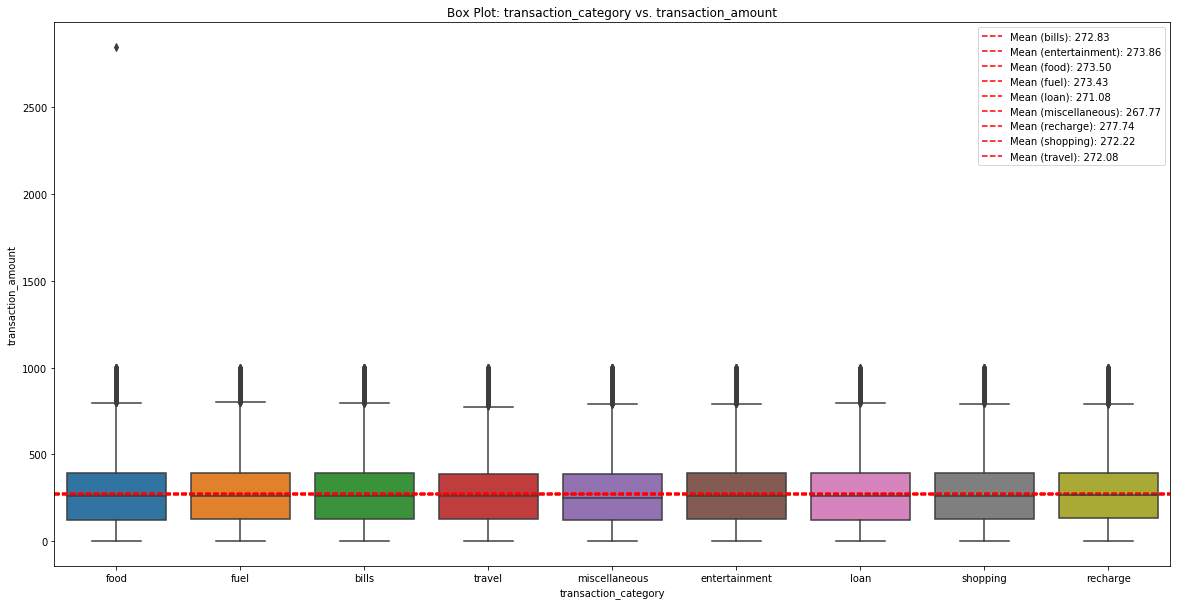

In [203]:
# Set the figure size
plt.figure(figsize=(20, 10))

# Box plot
sns.boxplot(data=current_accounts, x='transaction_category', y='transaction_amount')

# Add mean lines
means = current_accounts.groupby('transaction_category')['transaction_amount'].mean()
for transaction_category, mean in means.items():
    plt.axhline(y=mean, color='red', linestyle='--', label=f'Mean ({transaction_category}): {mean:.2f}')

# Set labels and title
plt.xlabel('transaction_category')
plt.ylabel('transaction_amount')
plt.title('Box Plot: transaction_category vs. transaction_amount')

# Show legend
plt.legend()

# Display the plot
plt.show()


In [204]:
# Drop any rows with missing values
data = current_accounts[['transaction_amount', 'transaction_category']].copy()

data.dropna(inplace=True)

# Perform ANOVA
model = ols('transaction_amount ~ C(transaction_category)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)

                               sum_sq        df         F    PR(>F)
C(transaction_category)  6.160729e+05       8.0  2.297952  0.018535
Residual                 3.361863e+09  100318.0       NaN       NaN


The ANOVA test indicates that there is a significant relationship between transaction category and transaction amount.

In [205]:
savings_accounts.groupby('transaction_category')['transaction_amount'].sum().sort_values(ascending=False)

transaction_category
entertainment    3194228.10
loan             3101522.79
miscellaneous    3100603.06
fuel             3099599.11
shopping         3090715.59
recharge         3081744.15
food             3079161.82
bills            3075499.28
travel           3062032.85
Name: transaction_amount, dtype: float64

## Transaction_amount and Gender

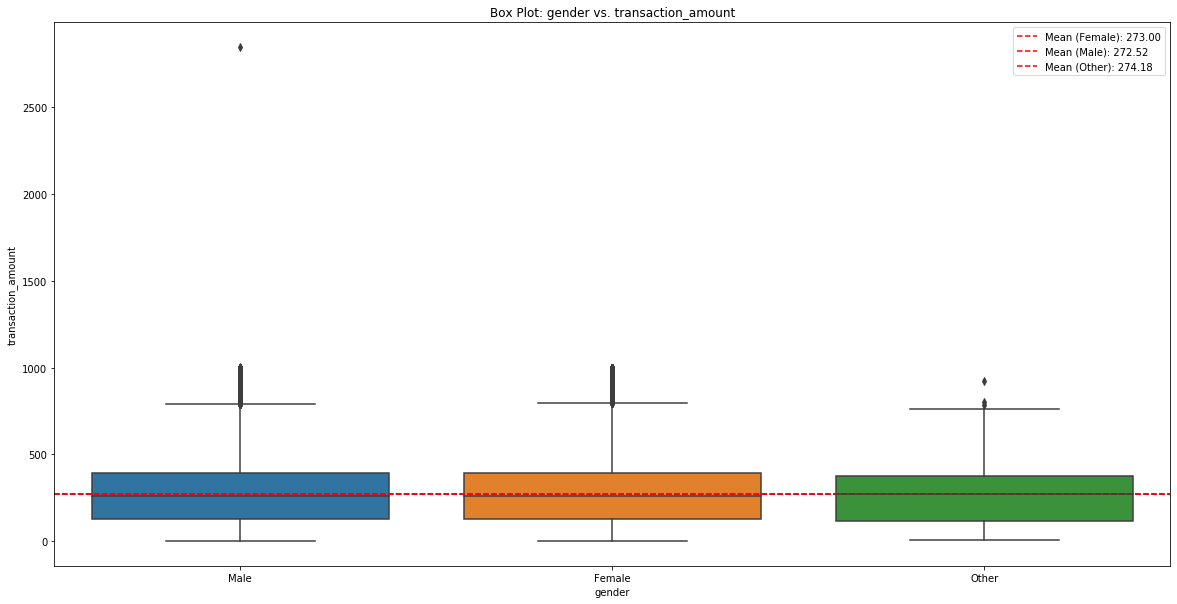

In [206]:
# Set the figure size
plt.figure(figsize=(20, 10))

# Box plot
sns.boxplot(data=current_accounts, x='gender', y='transaction_amount')

# Add mean lines
means = current_accounts.groupby('gender')['transaction_amount'].mean()
for gender, mean in means.items():
    plt.axhline(y=mean, color='red', linestyle='--', label=f'Mean ({gender}): {mean:.2f}')

# Set labels and title
plt.xlabel('gender')
plt.ylabel('transaction_amount')
plt.title('Box Plot: gender vs. transaction_amount')

# Show legend
plt.legend()

# Display the plot
plt.show()


In [207]:
# Drop any rows with missing values
data = current_accounts[['transaction_amount', 'gender']].copy()

data.dropna(inplace=True)

# Perform ANOVA
model = ols('transaction_amount ~ C(gender)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)

                 sum_sq        df         F    PR(>F)
C(gender)  5.871530e+03       2.0  0.087581  0.916145
Residual   3.363128e+09  100330.0       NaN       NaN


The p value is greater than the optimal value of 0.05 indicates there is no relation between gender and transaction amount

In [208]:
current_accounts.groupby('gender')['transaction_amount'].sum().sort_values(ascending=False)

gender
Male      15756383.75
Female    11568337.12
Other        38658.78
Name: transaction_amount, dtype: float64

## Transaction_amount and State

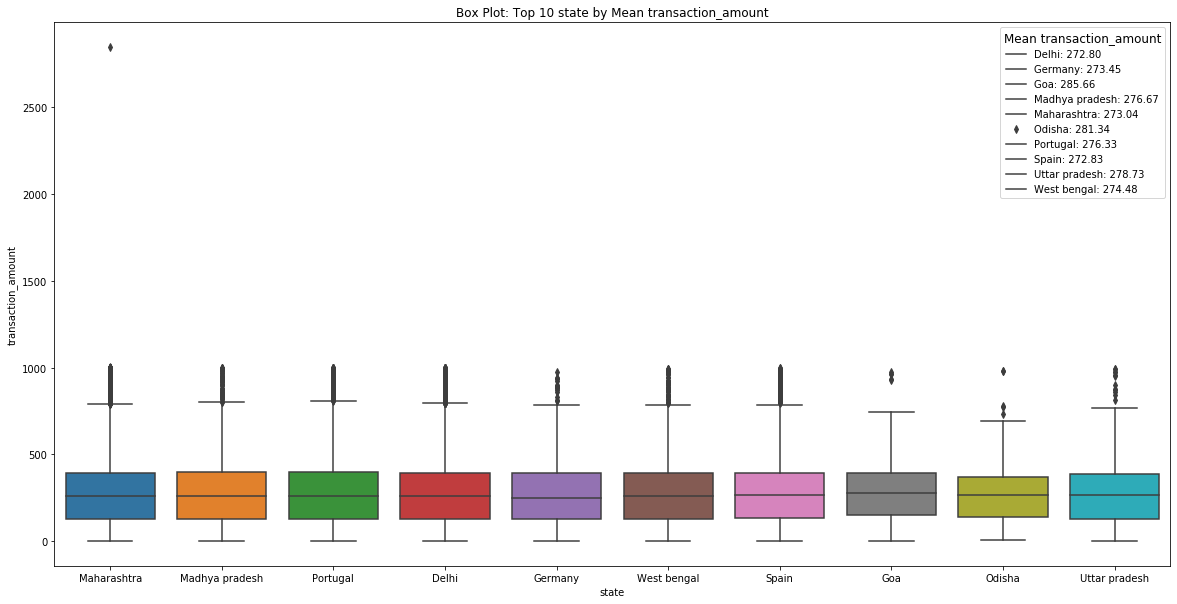

In [209]:
# Get top 10 states by mean transactions
top_10_states = current_accounts.groupby('state')['transaction_amount'].mean().nlargest(10).index

# Filter DataFrame to include only top 10 street
transactions_top_10 = current_accounts[current_accounts['state'].isin(top_10_states)]

# Set the figure size
plt.figure(figsize=(20, 10))

# Box plot
sns.boxplot(data=transactions_top_10, x='state', y='transaction_amount')

# Set labels and title
plt.xlabel('state')
plt.ylabel('transaction_amount')
plt.title('Box Plot: Top 10 state by Mean transaction_amount')

# Add a legend for mean age by city
means = transactions_top_10.groupby('state')['transaction_amount'].mean()
legend_labels = [f'{state}: {mean:.2f}' for state, mean in means.items()]
plt.legend(legend_labels, title='Mean transaction_amount', title_fontsize='large')

# Display the plot
plt.show()

In [210]:
# Drop any rows with missing values
data = current_accounts[['transaction_amount', 'state']].copy()

data.dropna(inplace=True)

# Perform ANOVA
model = ols('transaction_amount ~ C(state)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)

                sum_sq       df       F    PR(>F)
C(state)  6.612485e+05     29.0  0.6798  0.901567
Residual  3.337537e+09  99504.0     NaN       NaN


Since the p-value is larger than the significance level (typically 0.05), we reject the null hypothesis. This suggests that there is no significant relationship between the state variable and transaction amount.

## Transaction_amount and City

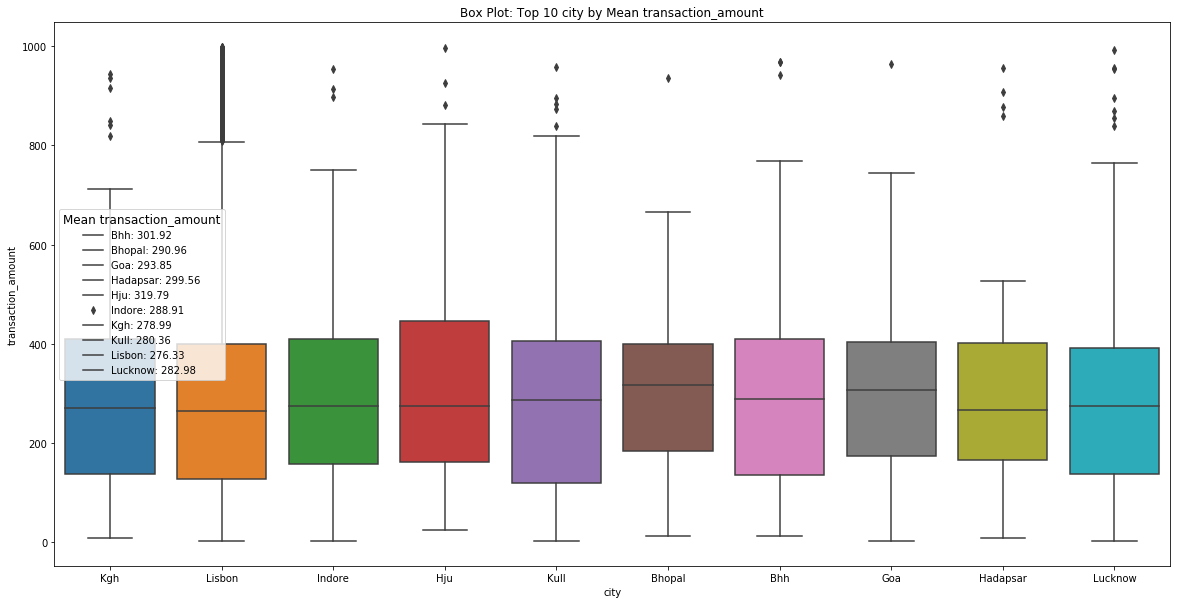

In [211]:
# Get top 10 city by mean transactions
top_10_city = current_accounts.groupby('city')['transaction_amount'].mean().nlargest(10).index

# Filter DataFrame to include only top 10 street
transactions_top_10 = current_accounts[current_accounts['city'].isin(top_10_city)]

# Set the figure size
plt.figure(figsize=(20, 10))

# Box plot
sns.boxplot(data=transactions_top_10, x='city', y='transaction_amount')

# Set labels and title
plt.xlabel('city')
plt.ylabel('transaction_amount')
plt.title('Box Plot: Top 10 city by Mean transaction_amount')

# Add a legend for mean age by city
means = transactions_top_10.groupby('city')['transaction_amount'].mean()
legend_labels = [f'{city}: {mean:.2f}' for city, mean in means.items()]
plt.legend(legend_labels, title='Mean transaction_amount', title_fontsize='large')

# Display the plot
plt.show()

In [212]:
# Drop any rows with missing values
data = current_accounts[['transaction_amount', 'city']].copy()

data.dropna(inplace=True)

# Perform ANOVA
model = ols('transaction_amount ~ C(city)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)

                sum_sq       df         F    PR(>F)
C(city)   1.227349e+06     50.0  0.731804  0.921526
Residual  3.336971e+09  99483.0       NaN       NaN


Since the p-value is larger than the significance level (typically 0.05), we reject the null hypothesis. This suggests that there is no significant relationship between the city variable and transaction amount.

## Transaction_amount and Street

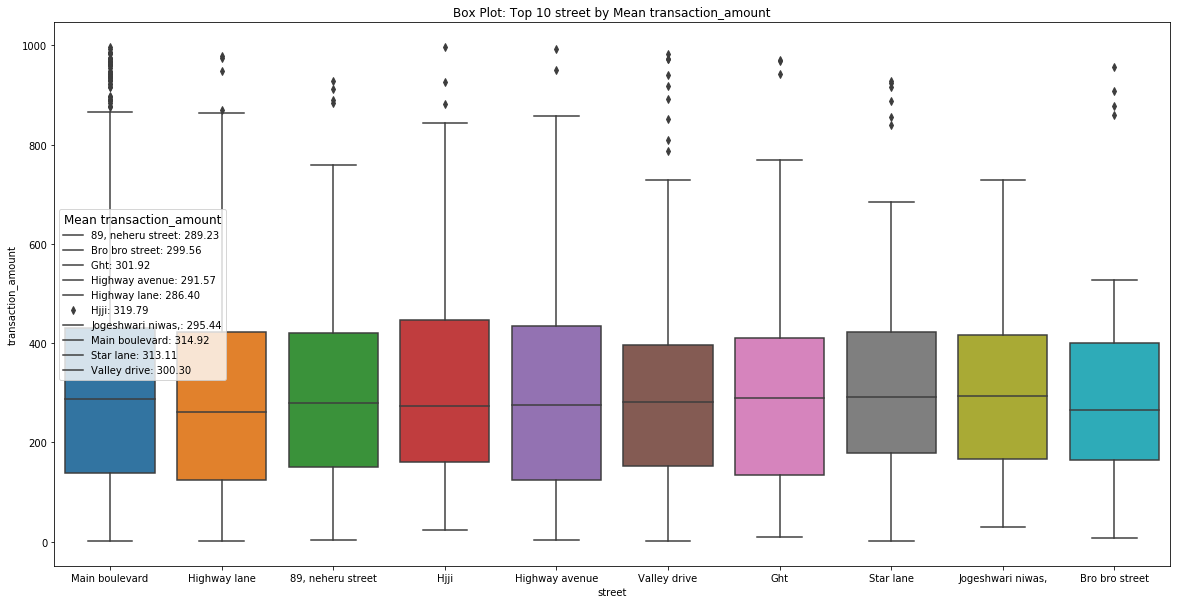

In [213]:
# Get top 10 street by mean transactions
top_10_street = current_accounts.groupby('street')['transaction_amount'].mean().nlargest(10).index

# Filter DataFrame to include only top 10 street
transactions_top_10 = current_accounts[current_accounts['street'].isin(top_10_street)]

# Set the figure size
plt.figure(figsize=(20, 10))

# Box plot
sns.boxplot(data=transactions_top_10, x='street', y='transaction_amount')

# Set labels and title
plt.xlabel('street')
plt.ylabel('transaction_amount')
plt.title('Box Plot: Top 10 street by Mean transaction_amount')

# Add a legend for mean age by city
means = transactions_top_10.groupby('street')['transaction_amount'].mean()
legend_labels = [f'{street}: {mean:.2f}' for street, mean in means.items()]
plt.legend(legend_labels, title='Mean transaction_amount', title_fontsize='large')

# Display the plot
plt.show()

In [214]:
# Drop any rows with missing values
data = current_accounts[['transaction_amount', 'street']].copy()

data.dropna(inplace=True)

# Perform ANOVA
model = ols('transaction_amount ~ C(street)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)

                 sum_sq       df         F    PR(>F)
C(street)  5.293915e+06     84.0  1.880509  0.000002
Residual   3.332904e+09  99449.0       NaN       NaN


Since the p-value is much smaller than the significance level (typically 0.05), we reject the null hypothesis. This suggests that there is a significant relationship between the street variable and transaction amount.

In [215]:
current_accounts.groupby('street')['transaction_amount'].sum().sort_values(ascending=False)

street
Sun road              1920969.29
Sky lane              1818360.94
Mountain boulevard    1500798.16
Star boulevard        1436449.57
Cloud lane            1177452.78
Cloud road            1174010.69
Harbor street         1121917.58
River lane             992871.55
Sun street             969329.26
River boulevard        843666.09
Mountain street        809287.41
Mountain lane          768417.34
Sky street             762516.02
Sun lane               652586.81
Beach road             640284.42
Dfty                   591607.46
Forest avenue          590688.51
123 main st            519267.11
Forest lane            510474.22
Main road              447965.58
Valley road            415491.76
Harbor lane            410795.77
Harbor avenue          399419.96
Star road              394171.77
68 virar street        379402.48
Iouytr                 378423.87
Sun boulevard          363815.95
Market lane            361995.39
Cloud street           339375.36
Main boulevard         328775.73
23,

## Transaction_amount and time_category

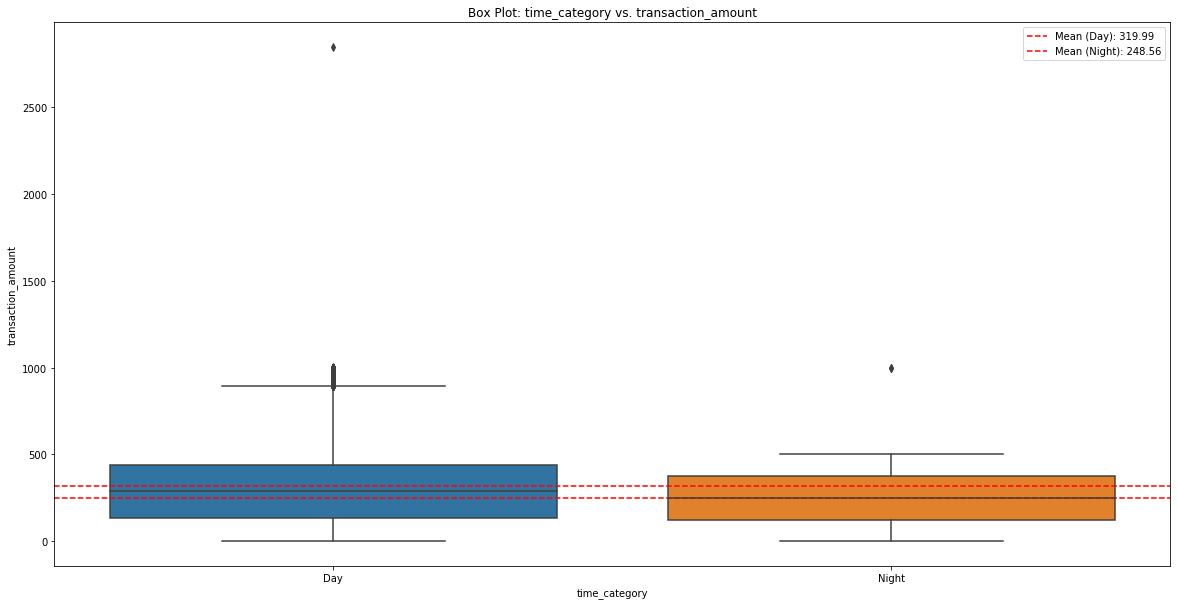

In [216]:
# Set the figure size
plt.figure(figsize=(20, 10))

# Box plot
sns.boxplot(data=current_accounts, x='time_category', y='transaction_amount')

# Add mean lines
means = current_accounts.groupby('time_category')['transaction_amount'].mean()
for time_category, mean in means.items():
    plt.axhline(y=mean, color='red', linestyle='--', label=f'Mean ({time_category}): {mean:.2f}')

# Set labels and title
plt.xlabel('time_category')
plt.ylabel('transaction_amount')
plt.title('Box Plot: time_category vs. transaction_amount')

# Show legend
plt.legend()

# Display the plot
plt.show()


In [217]:
# Drop any rows with missing values
data = current_accounts[['transaction_amount', 'time_category']].copy()

data.dropna(inplace=True)

# Perform ANOVA
model = ols('transaction_amount ~ C(time_category)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)

                        sum_sq        df            F  PR(>F)
C(time_category)  1.145917e+08       1.0  3539.157444     0.0
Residual          3.248542e+09  100331.0          NaN     NaN


Since the p-value is much smaller than the significance level (typically 0.05), we reject the null hypothesis. This suggests that there is a significant relationship between the time_category(day or night) and transaction amount.

In [218]:
current_accounts.groupby('time_category')['transaction_amount'].sum()

time_category
Day      10859987.95
Night    16503391.70
Name: transaction_amount, dtype: float64

## Transaction_type and Transaction_category

the crosstab is:
 transaction_category  bills  entertainment  food  fuel  loan  miscellaneous  \
transaction_type                                                              
Credit                 5444           5694  5722  5648  5474           5550   
Debit                  5444           5511  5705  5624  5506           5592   

transaction_category  recharge  shopping  travel  
transaction_type                                  
Credit                    5566      5579    5581  
Debit                     5504      5561    5622  


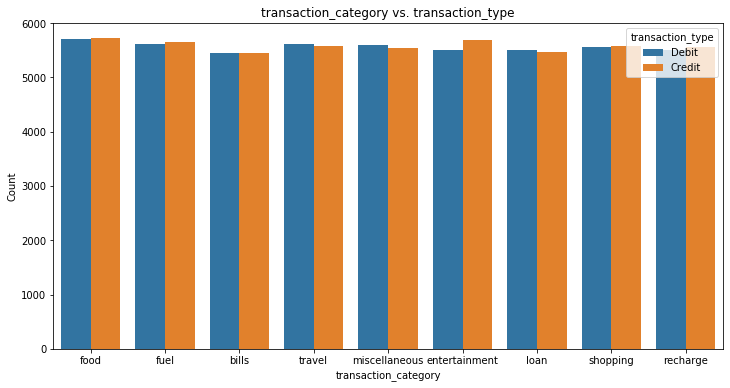

In [219]:
# Tabulation
tab = pd.crosstab(current_accounts['transaction_type'], current_accounts['transaction_category'])
print('the crosstab is:\n',tab)


# Create the countplot
plt.figure(figsize=(12, 6))
sns.countplot(data=current_accounts, x='transaction_category', hue='transaction_type')
plt.title("transaction_category vs. transaction_type")
plt.xlabel("transaction_category")
plt.ylabel("Count")
plt.legend(title='transaction_type', loc='upper right')
plt.show()

In [220]:
# Create a contingency table of 'transaction_type' and 'transaction_category'
current_accounts1 = current_accounts.dropna(subset=['transaction_category', 'transaction_type'])

contingency_table = pd.crosstab(current_accounts['transaction_category'], current_accounts['transaction_type'])

# Perform chi-square test of independence
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-Square Test of Independence Results:")
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p_value}")

Chi-Square Test of Independence Results:
Chi-Square Statistic: 3.4870713379347977
P-Value: 0.9001907234672124


The p value is greater than the optimal value of 0.05 which indicates there is no relationship between transaction category and transaction type

## Transaction_type and Gender

the crosstab is:
 gender            Female   Male  Other
transaction_type                      
Credit             20730  29411     78
Debit              20657  29294     64


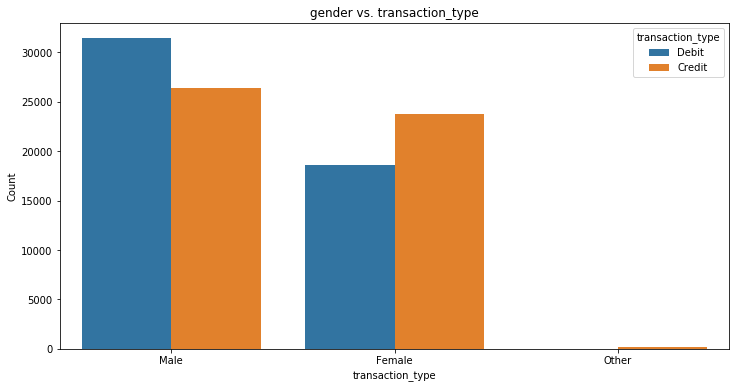

In [221]:
# Tabulation
tab = pd.crosstab(current_accounts['transaction_type'], savings_accounts['gender'])
print('the crosstab is:\n',tab)


# Create the countplot
plt.figure(figsize=(12, 6))
sns.countplot(data=current_accounts, x='gender', hue='transaction_type')
plt.title("gender vs. transaction_type")
plt.xlabel("transaction_type")
plt.ylabel("Count")
plt.legend(title='transaction_type', loc='upper right')
plt.show()

In [222]:
# Drop null values from 'gender' column
current_accounts1 = current_accounts.dropna(subset=['gender'])

# Create a contingency table of 'transaction_type' and 'gender'
contingency_table = pd.crosstab(current_accounts1['gender'], current_accounts['transaction_type'])

# Perform chi-square test of independence
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-Square Test of Independence Results:")
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p_value}")

Chi-Square Test of Independence Results:
Chi-Square Statistic: 1186.947164037896
P-Value: 1.8100816839538612e-258


Based on the Chi-Square Test of Independence results, we can conclude that there is a statistically significant relationship between transaction type and gender.

Female tends to do more credit transactions and male does more debit transactions.

## Transaction_type and State

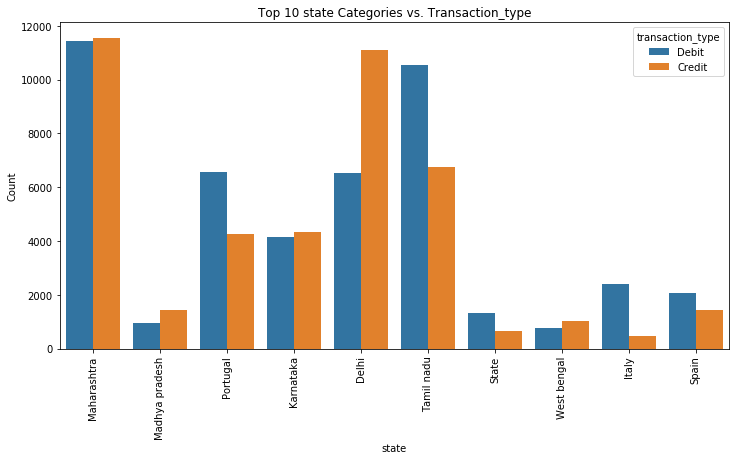

In [223]:
# Grouped Bar Plot
# Get the top 10 most frequent 'state' categories
a = current_accounts['state'].value_counts().iloc[0:10].index

# Filter the DataFrame to include only the top 10 'state' categories
df_top_10 = current_accounts[current_accounts['state'].isin(a)]

# Create the countplot
plt.figure(figsize=(12, 6))
sns.countplot(data=df_top_10, x='state', hue='transaction_type')
plt.title("Top 10 state Categories vs. Transaction_type")
plt.xlabel("state")
plt.ylabel("Count")
plt.xticks(rotation=90
          )
plt.legend(title='transaction_type', loc='upper right')
plt.show()

In [224]:
# Create a contingency table of 'transaction_type' and 'state'
current_accounts1 = current_accounts.dropna(subset=['state', 'transaction_type'])

contingency_table = pd.crosstab(current_accounts1['transaction_type'], current_accounts1['state'])

# Perform chi-square test of independence
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-Square Test of Independence Results:")
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p_value}")

Chi-Square Test of Independence Results:
Chi-Square Statistic: 13030.833048470278
P-Value: 0.0


Based on the Chi-Square Test of Independence results, we can conclude that there is a statistically significant relationship between transaction type and state.

## Transaction_type and City

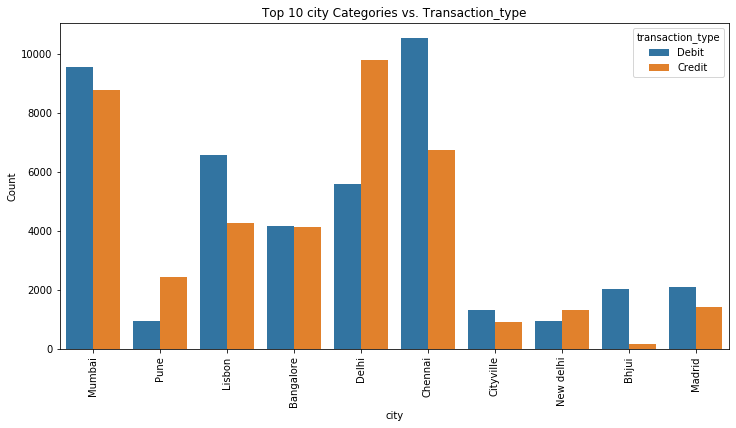

In [225]:
# Grouped Bar Plot
# Get the top 10 most frequent 'city' categories
a = current_accounts['city'].value_counts().iloc[0:10].index

# Filter the DataFrame to include only the top 10 'state' categories
df_top_10 = current_accounts[current_accounts['city'].isin(a)]

# Create the countplot
plt.figure(figsize=(12, 6))
sns.countplot(data=df_top_10, x='city', hue='transaction_type')
plt.title("Top 10 city Categories vs. Transaction_type")
plt.xlabel("city")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.legend(title='transaction_type', loc='upper right')
plt.show()

In [226]:
# Create a contingency table of 'transaction_type' and 'city'
current_accounts1 = current_accounts.dropna(subset=['city', 'transaction_type'])

contingency_table = pd.crosstab(current_accounts1['transaction_type'], current_accounts1['city'])

# Perform chi-square test of independence
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-Square Test of Independence Results:")
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p_value}")

Chi-Square Test of Independence Results:
Chi-Square Statistic: 16356.184681156028
P-Value: 0.0


Based on the Chi-Square Test of Independence results, we can conclude that there is a statistically significant relationship between transaction type and city.

## Transaction_type and Street

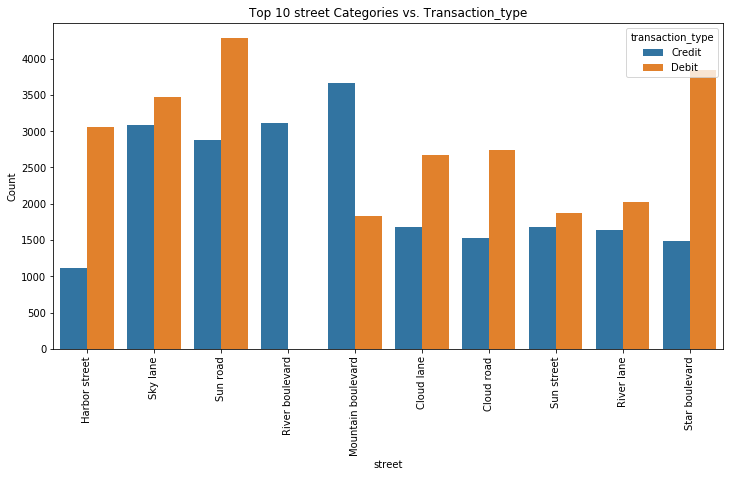

In [227]:
# Grouped Bar Plot
# Get the top 10 most frequent 'street' categories
a = current_accounts['street'].value_counts().iloc[0:10].index

# Filter the DataFrame to include only the top 10 'state' categories
df_top_10 = current_accounts[current_accounts['street'].isin(a)]

# Create the countplot
plt.figure(figsize=(12, 6))
sns.countplot(data=df_top_10, x='street', hue='transaction_type')
plt.title("Top 10 street Categories vs. Transaction_type")
plt.xlabel("street")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.legend(title='transaction_type', loc='upper right')
plt.show()

In [228]:
# Create a contingency table of 'transaction_type' and 'street'
current_accounts1 = current_accounts.dropna(subset=['street', 'transaction_type'])

contingency_table = pd.crosstab(current_accounts1['transaction_type'], current_accounts1['street'])

# Perform chi-square test of independence
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-Square Test of Independence Results:")
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p_value}")

Chi-Square Test of Independence Results:
Chi-Square Statistic: 30118.016034461347
P-Value: 0.0


Based on the Chi-Square Test of Independence results, we can conclude that there is a statistically significant relationship between transaction type and street.

## Transaction_type and time_category

the crosstab is:
 time_category       Day  Night
transaction_type              
Credit            16781  33483
Debit             17157  32912


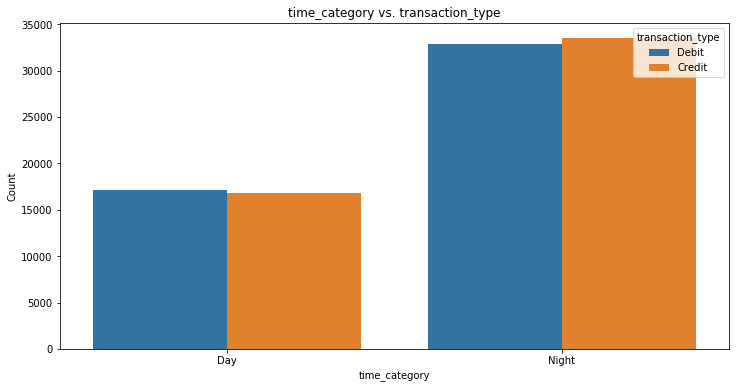

In [229]:
# Tabulation
tab = pd.crosstab(current_accounts['transaction_type'], current_accounts['time_category'])
print('the crosstab is:\n',tab)


# Create the countplot
plt.figure(figsize=(12, 6))
sns.countplot(data=current_accounts, x='time_category', hue='transaction_type')
plt.title("time_category vs. transaction_type")
plt.xlabel("time_category")
plt.ylabel("Count")
plt.legend(title='transaction_type', loc='upper right')
plt.show()

In [230]:
# Create a contingency table of 'transaction_type' and 'street'
current_accounts1 = current_accounts.dropna(subset=['time_category', 'transaction_type'])

contingency_table = pd.crosstab(current_accounts1['transaction_type'], current_accounts1['time_category'])

# Perform chi-square test of independence
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-Square Test of Independence Results:")
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p_value}")

Chi-Square Test of Independence Results:
Chi-Square Statistic: 8.658070866766662
P-Value: 0.0032561584597542922


Based on the Chi-Square Test of Independence results, we can conclude that there is a statistically significant relationship between transaction type and time.

Debit transactions are happening more in day and credit transactions are happening more in the night time

## Transaction_amount and Age

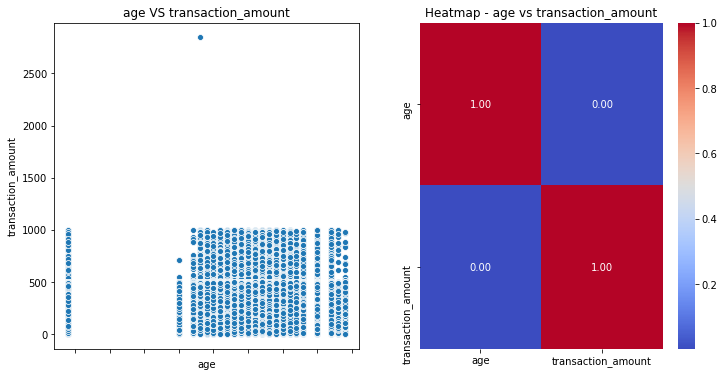

In [231]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Countplot using seaborn
sns.scatterplot(x=current_accounts['age'],y=current_accounts['transaction_amount'],ax=axes[0])
axes[0].set_xlabel('age')
axes[0].set_ylabel('transaction_amount')
axes[0].set_title('age VS transaction_amount')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90, ha='right')

# heatmap
sns.heatmap(current_accounts[['age', 'transaction_amount']].corr(), annot=True, fmt=".2f", cmap='coolwarm',ax=axes[1])

# Set plot title
plt.title("Heatmap - age vs transaction_amount")


# Display the plot
plt.show()

In [232]:
from scipy.stats import pearsonr

# Drop null values
relationship = current_accounts.dropna(subset=['age', 'transaction_amount'])

# Calculate Pearson's correlation coefficient and p-value
correlation, p_value = pearsonr(relationship['age'], relationship['transaction_amount'])

print("Pearson's correlation coefficient:", correlation)
print("p-value:", p_value)


Pearson's correlation coefficient: 0.0024060170183430284
p-value: 0.4459962907752833


The p value is more than the optimal value of 0.05 which indicates there is no relationship between age and transaction ammount

# Current Account Analysis Summary Report

### Distribution of Accounts and Customers:

Total Customers: 650

Gender Distribution:

Male: 337

Female: 311

Other: 2

Majority of customers have 1 current account, with 12 customers having more than one current account.

Number of Accounts by Gender:

Female: 1

Male: 11

### Transactions:

On an average each account is making 150 transactions and some accounts are making more than 800 transactions.

More credit transactions (50,264) than debit transactions (50,069).

March has the highest transaction count (100,307).

Night transactions (66,395) outnumber day transactions (33,938).

Top Transaction Categories: Food, Fuel, Entertainment

States with Highest Transaction Counts: Maharashtra, Delhi, Tamil Nadu

Top Cities: Mumbai, Chennai, Delhi, Bangalore

Streets like "Sun Road," "Sky Lane," have high transaction volumes.

### Total Transaction Amount:

Credit: $13,693,867.80

Debit: $13,669,511.85

Transaction Amount by Category: Entertainment, loan, and miscellaneous have highest amounts.

Transaction Amount by Street: "Sun Road," "Sky Lane" have highest transaction amounts.

Transaction Amount by Time of Day: Night transactions have higher total amounts.

### Relationship Analysis:

Age and Transaction Type: Higher age correlates with more credit transactions. Younger individuals tend to do more debit transactions.

Gender and Transaction Type: Transaction counts (credit, debit) are similar across genders.

State, City, Street, and Transaction Type: Transaction counts (credit, debit) vary across different locations.

Time of Day and Transaction Type: Transaction counts (credit, debit) are similar across day and night.

### Insights:

Transaction Patterns: Certain transaction categories and streets indicate high economic activity.

Demographic Patterns: Age, gender, and location influence transaction behavior.

Transactional Habits: Majority of customers prefer single current accounts. Nighttime sees more transactions, possibly 

indicating consumer behavior or business activity.

Business Opportunities: Insights into popular transaction categories and locations can guide marketing strategies and investment decisions.

# CHECKING WHETHER ALL SAVINGS ACCOUNT MADE TRANSACTIONS

In [233]:
test=pd.read_csv("Accounts 2.csv")

In [234]:
current= test[test['account_type'].str.upper() == 'CURRENT']

In [235]:
current['account_number'].nunique()

668

#### Total current accounts in the bank are 668

In [236]:
test_trans=pd.read_csv('Current_transactions 2.csv')

In [237]:
test_trans['account_number'].nunique()

668

#### Total current accounts which made transactions are 668

In [240]:
test = pd.merge(current,test_trans, on='account_number', how='left')

In [241]:
test['account_number'].nunique()

668

In [242]:
filtered_test = test[test['transaction_id'].isnull()]


In [243]:
filtered_test

,customer_id_x,account_number,account_type,account_status,currency,overdraft,creation_date,total_balance,block_reason,id,customer_id_y,transaction_id,transaction_amount,transaction_type,remaining_balance,transaction_time,recipient,narratives,transaction_category


### All Current account users made transactions